## Library Imports

In [6]:
from scipy.signal import lfilter
from scipy.signal import butter
import matplotlib.pyplot as plt
from scipy import signal
import librosa.display
import numpy as np
import os

## BandPass Filter

In [7]:
# Creating Butterworth Bandpass Filter
def butter_bandpass(lowcut : int, highcut : int, fs : int, order=5):
    """ Create a Butterworth Bandpass Filter

        \tlowcut: low cut frequency (in Hz)
        \thighcut: high cut frequency (in Hz)
        \tfs: sampling frequency (in Hz)
        \torder: order of the filter (default = 5)

        return: b, a: numerator (b) and denominator (a) polynomials of the IIR filter   """

    nyq = 0.5 * fs                                      # Nyquist frequency (half of the sampling frequency)
    low = lowcut / nyq                                  # Normalized low cut frequency
    high = highcut / nyq                                # Normalized high cut frequency
    b, a = butter(order, [low, high], btype='band')     # Create Butterworth bandpass filter
    return b, a                                         # Return numerator (b) and denominator (a) polynomials of the IIR filter


def butter_bandpass_filter(data, lowcut : int, highcut : int, fs : int, order=5):
    """ Apply a Butterworth Bandpass Filter   
            
        \tdata: signal to be filtered
        \tlowcut: low cut frequency (in Hz)
        \thighcut: high cut frequency (in Hz)
        \tfs: sampling frequency (in Hz)
        \torder: order of the filter (default = 5)

        return: y: filtered signal   """


    b, a = butter_bandpass(lowcut, highcut, fs, order=order)    # Create Butterworth bandpass filter
    y = lfilter(b, a, data)                                     # Apply filter
    return y                                                    # Return filtered signal

## Envelope Detection

In [8]:
# Creating Envelope of the filtered signal
def create_envelope(x_filt,sr : int,fL_hz=10, ripple_db=10.0):
    """ Create an envelope of the filtered signal

        \tx_filt: filtered signal
        \tsr: sampling rate (in Hz)
        \tfL_hz: low cut frequency (in Hz)
        \tripple_db: ripple in the passband (in dB)

        return: envelope_hat_filt: filtered envelope of the filtered signal   """
    
    nyq_rate = sr /0.5      # Nyquist rate is twice the sampling rate.
    width = 1.0/nyq_rate    # 5 Hz filter transition width.     
    
    # Hilbert Transform
    x_filt_hilbert = signal.hilbert(x_filt)
    envelope_hat = np.abs(x_filt_hilbert)
    
    # filter the Hilbert envelope
    N, beta = signal.kaiserord(ripple_db, width)
    taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
    envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)

    return envelope_hat_filt

# Visualizing the entire dataset after Bandpass Filter and Envelope.

### BandPass Filter with low_cut = 3000, high_cut = 5000 and order = 5.

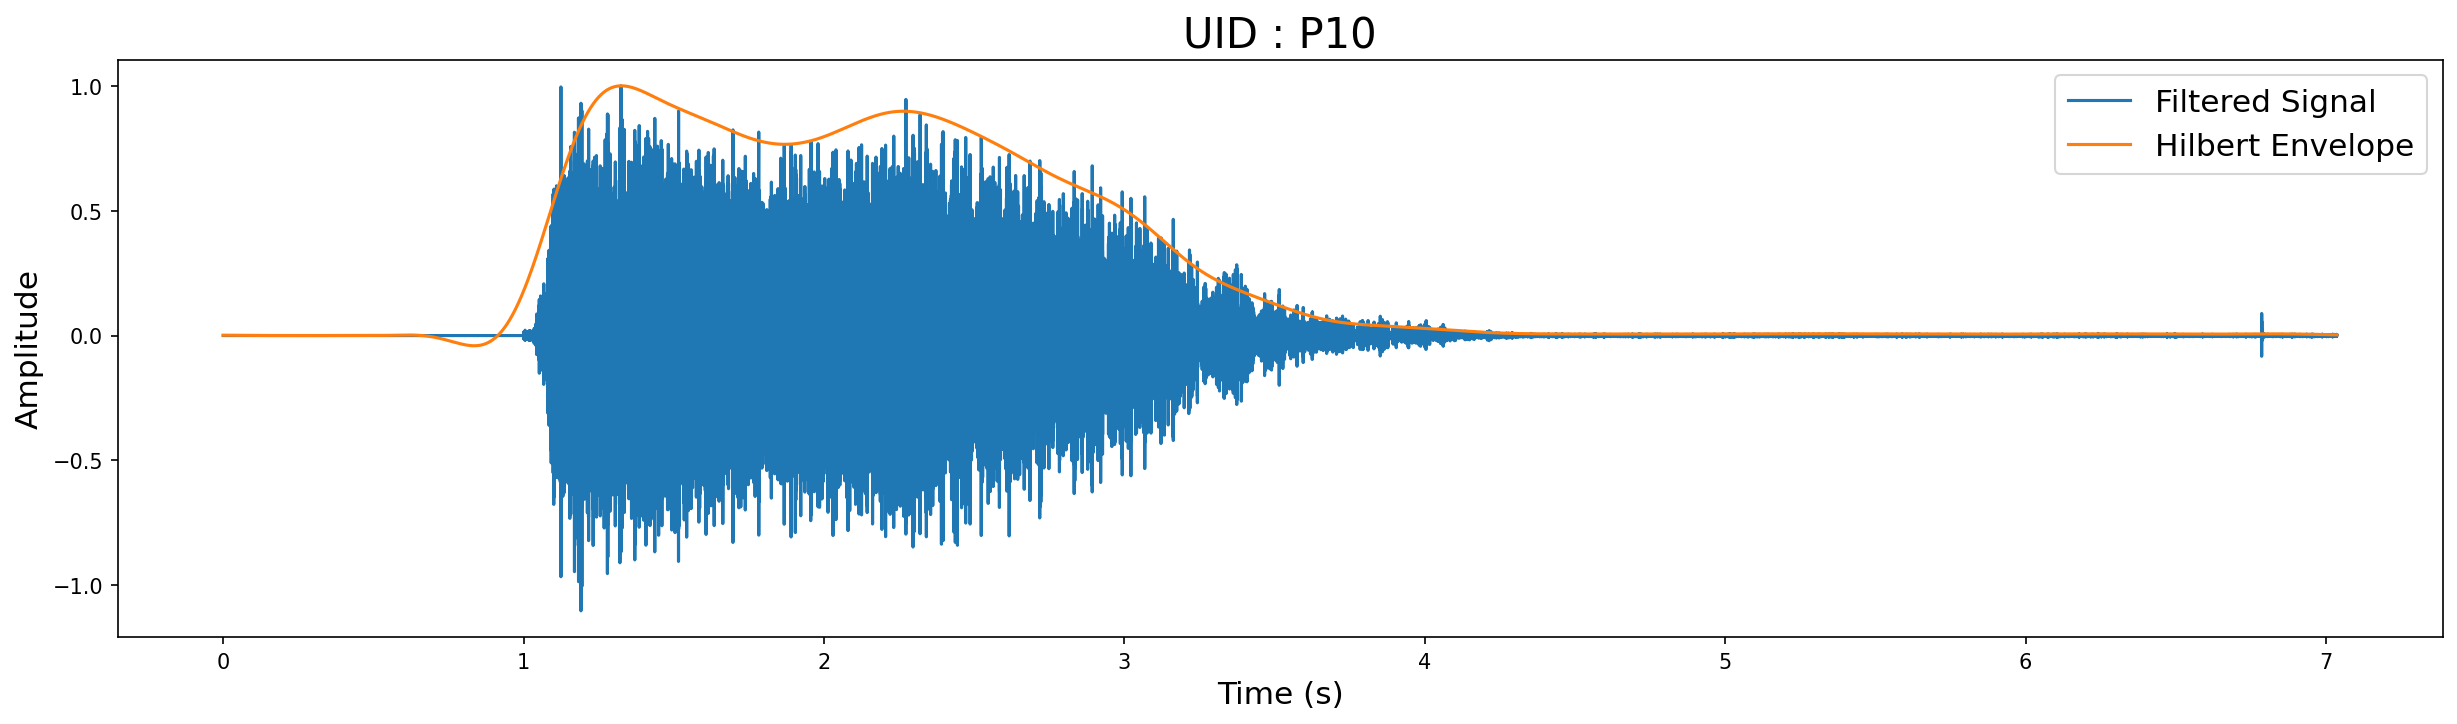

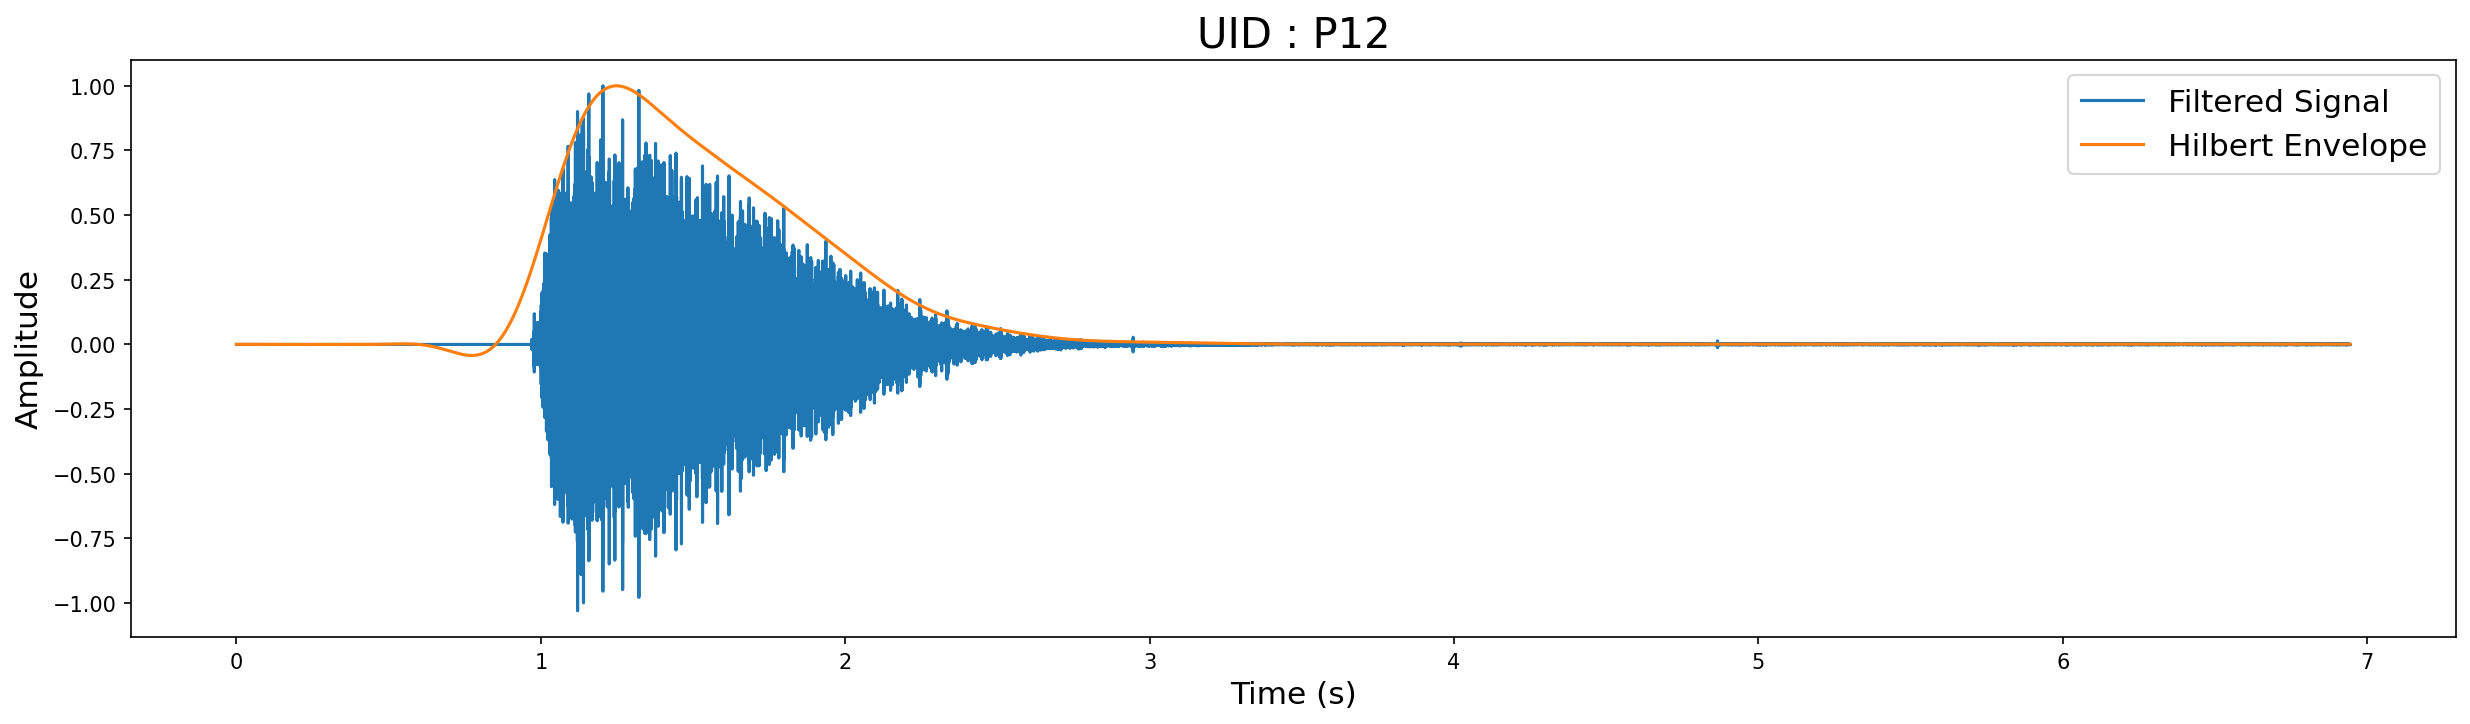

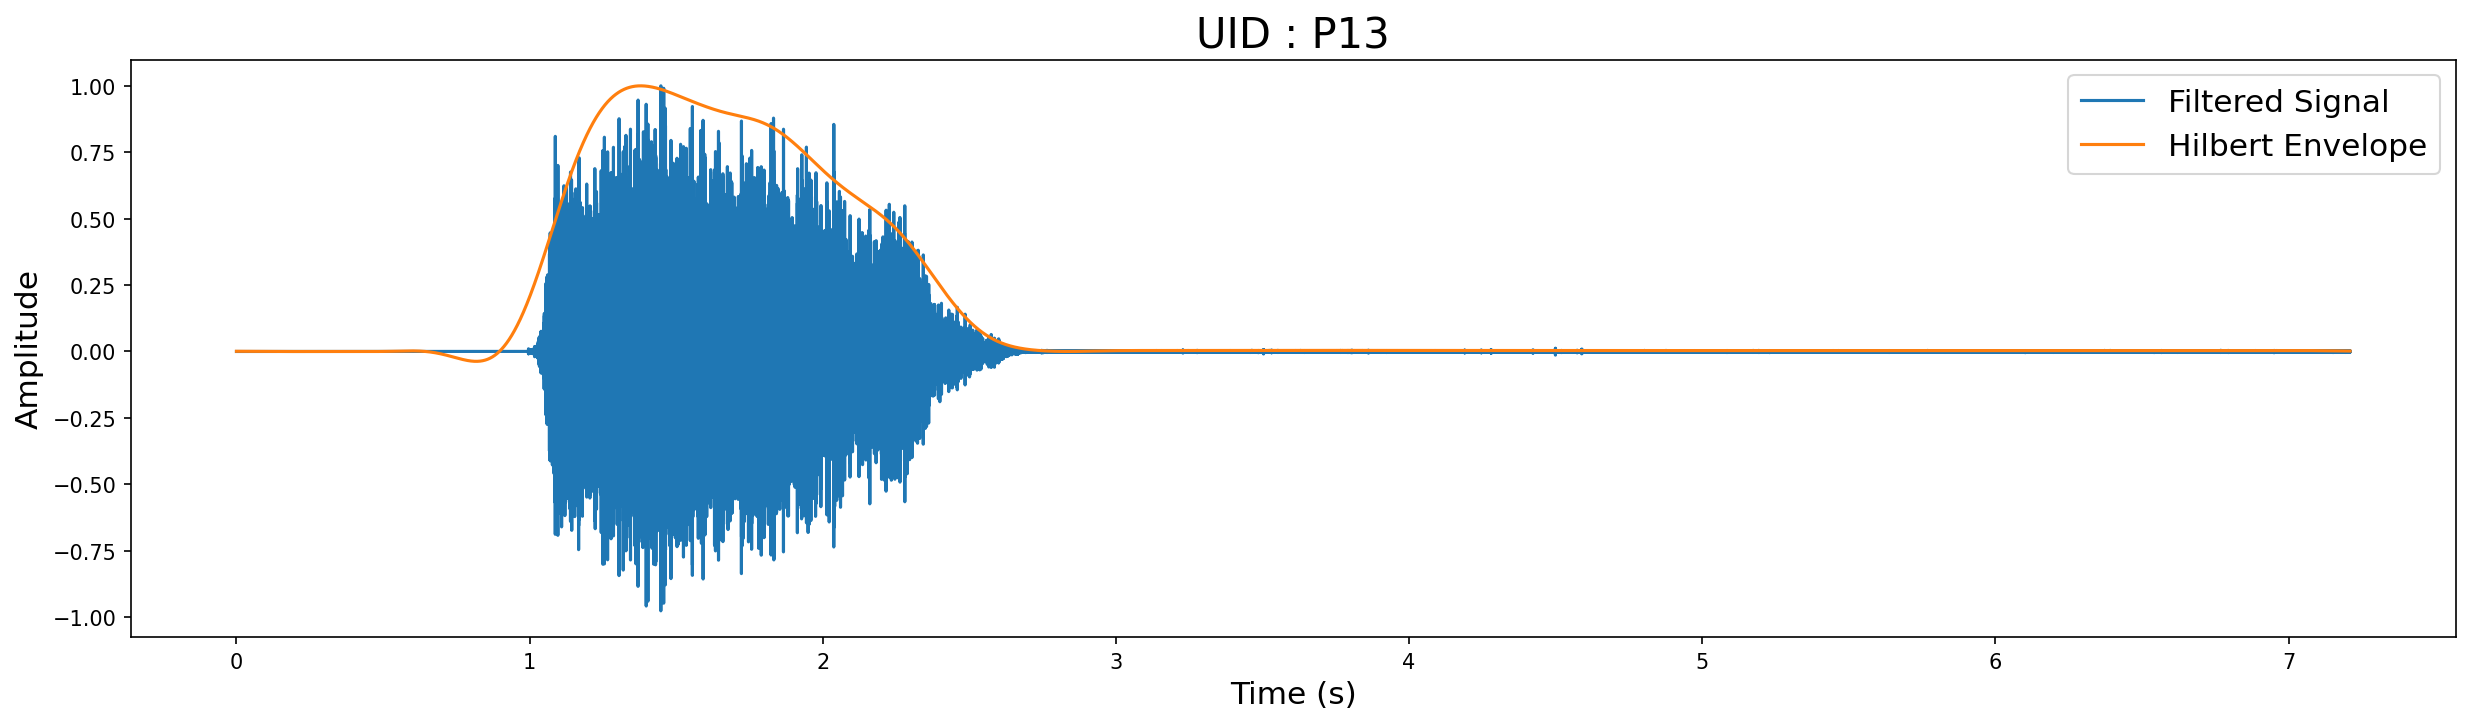

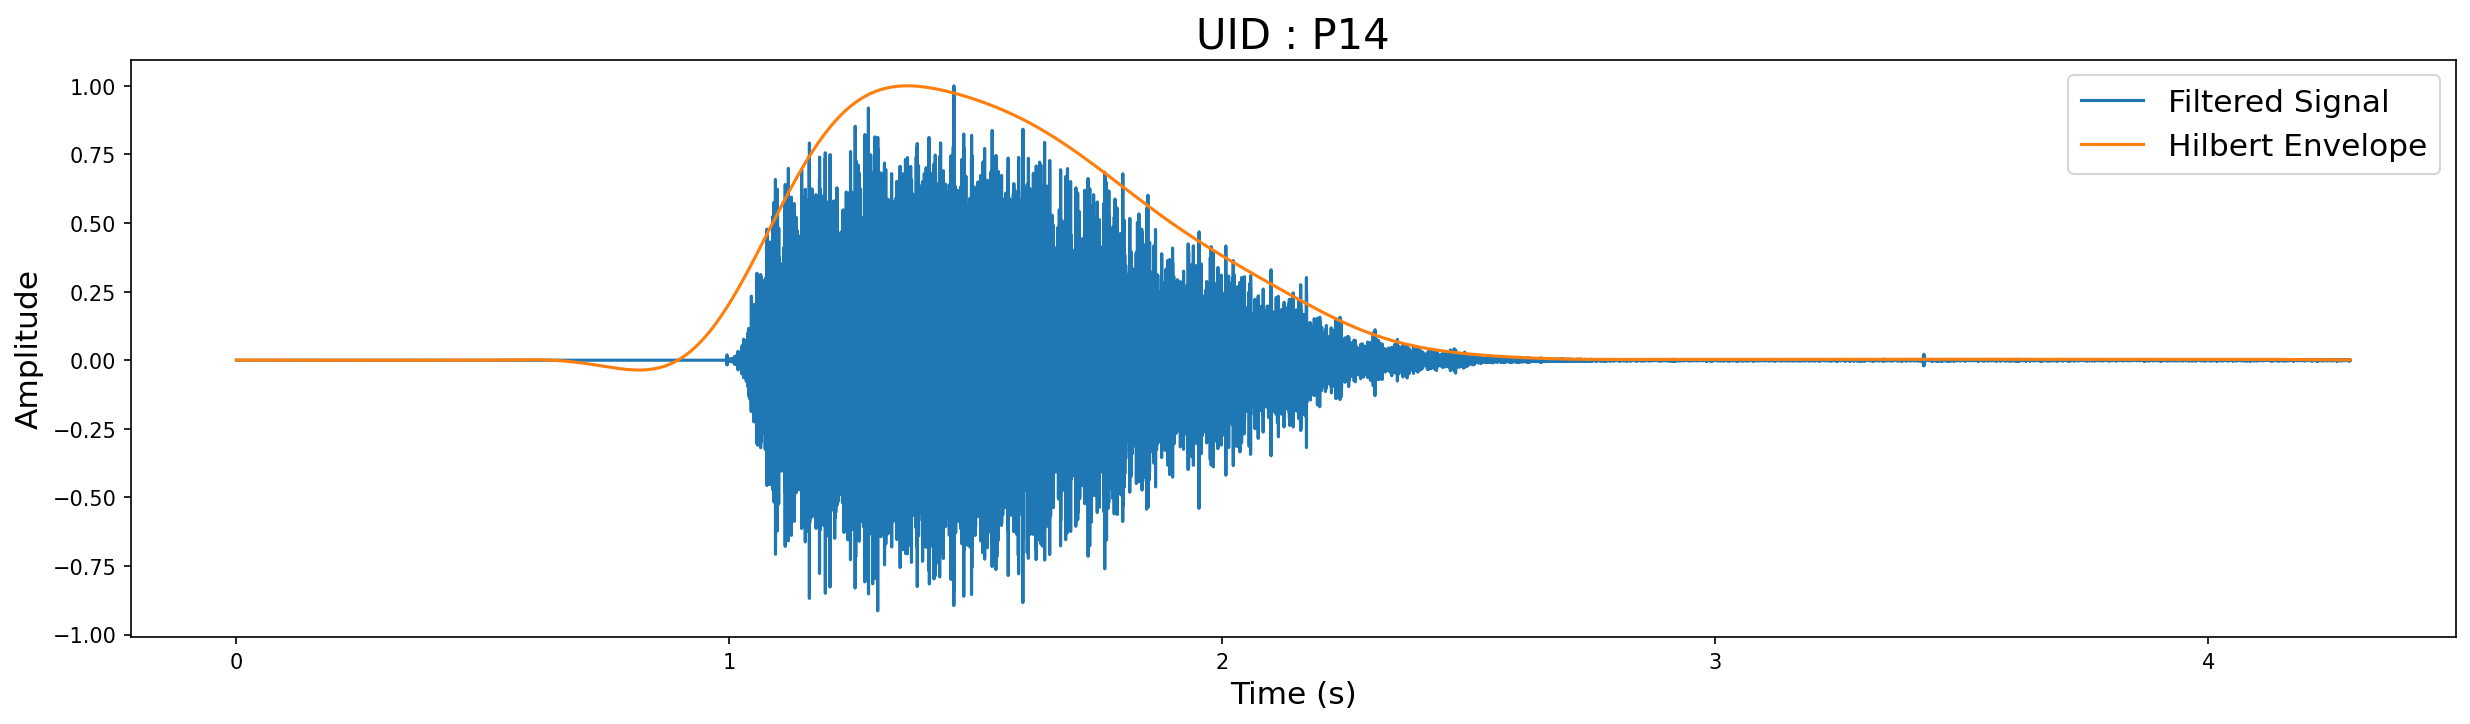

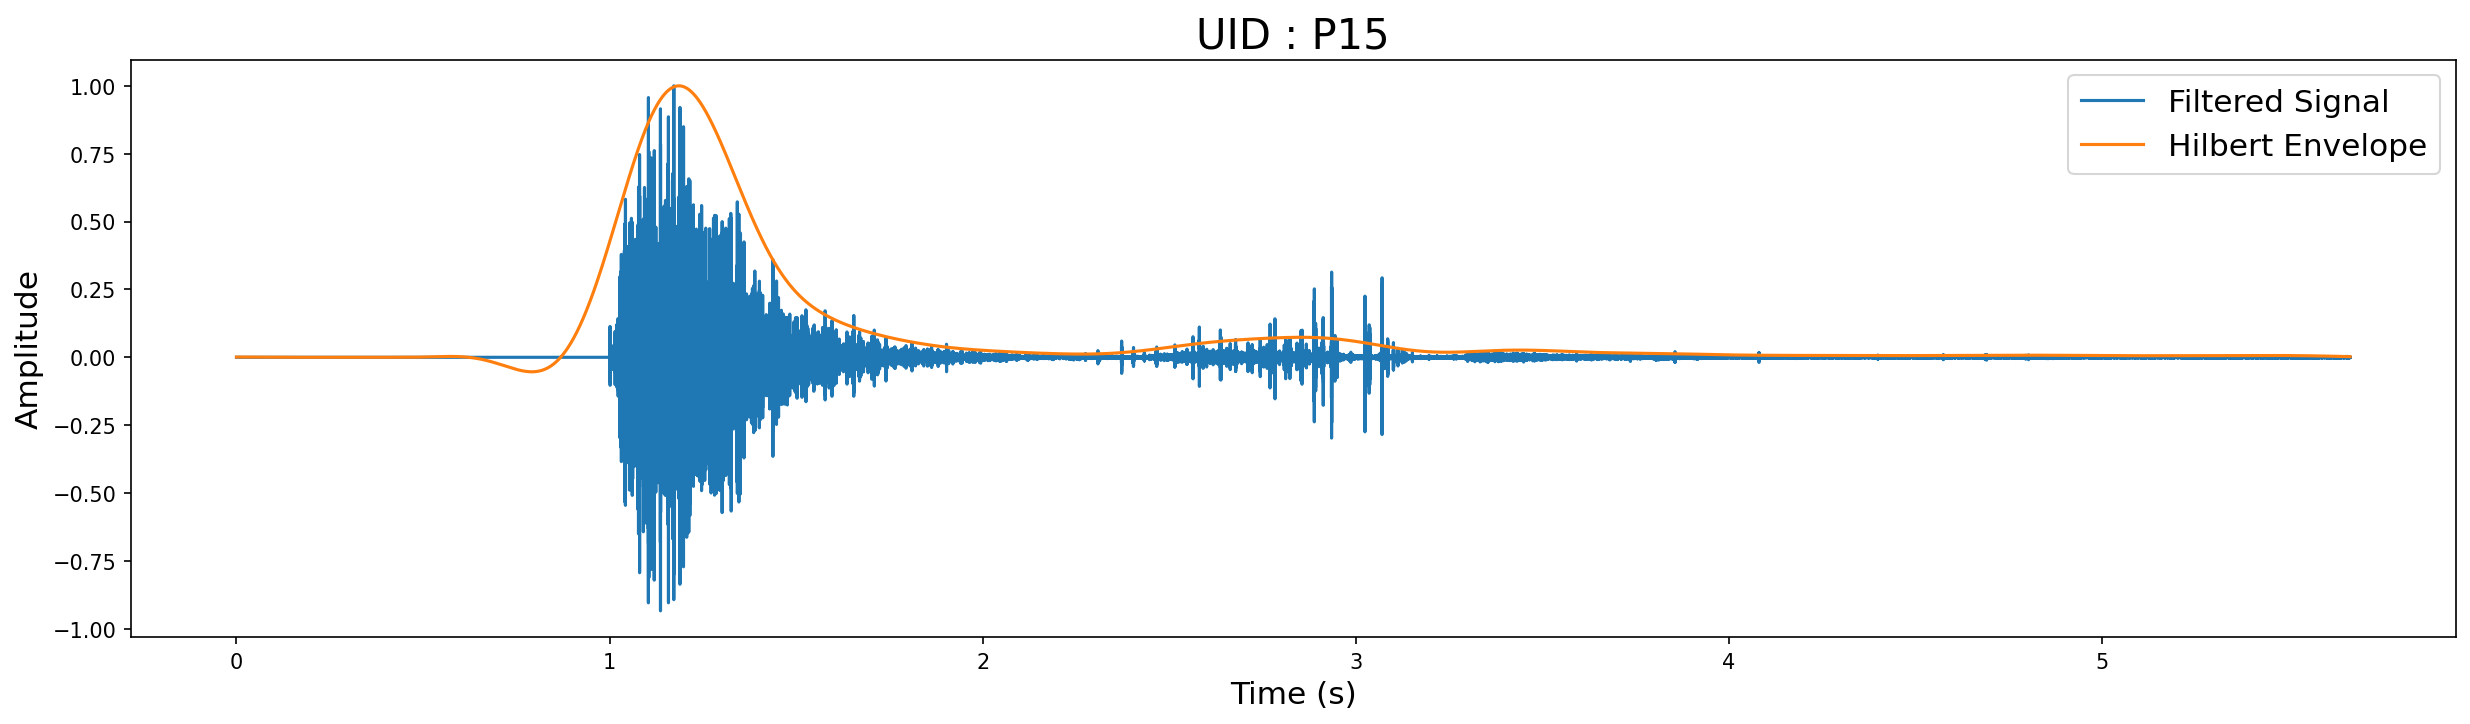

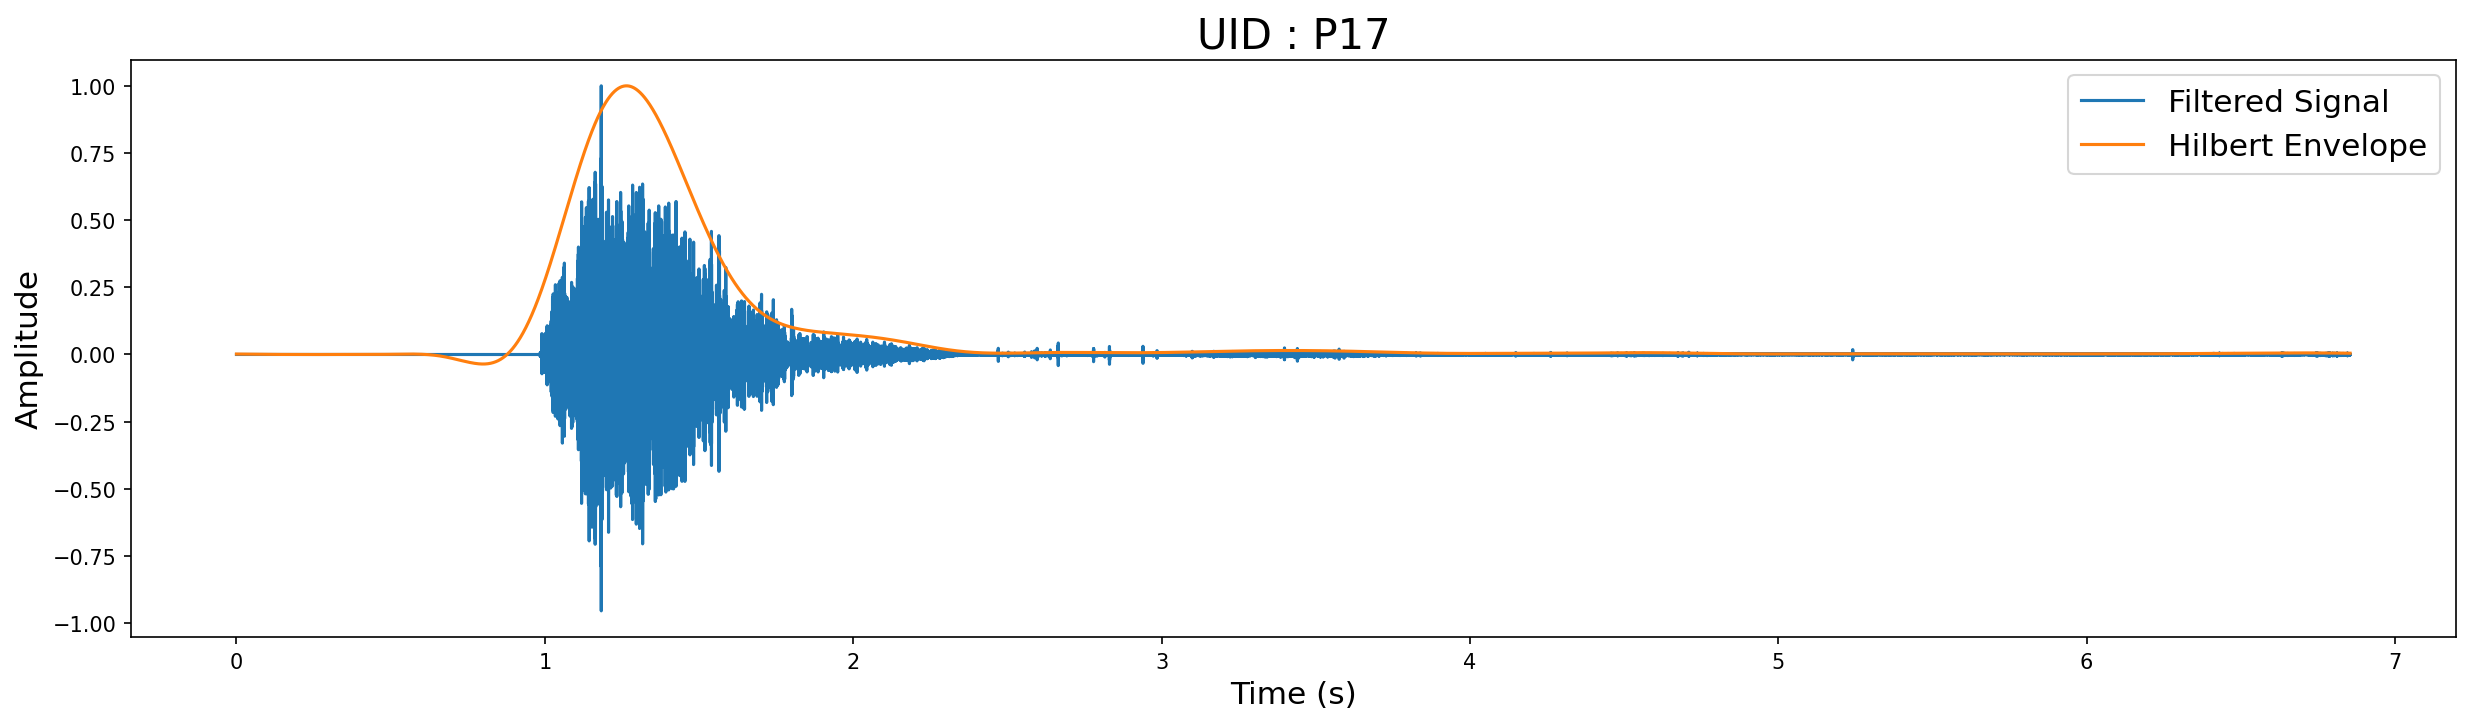

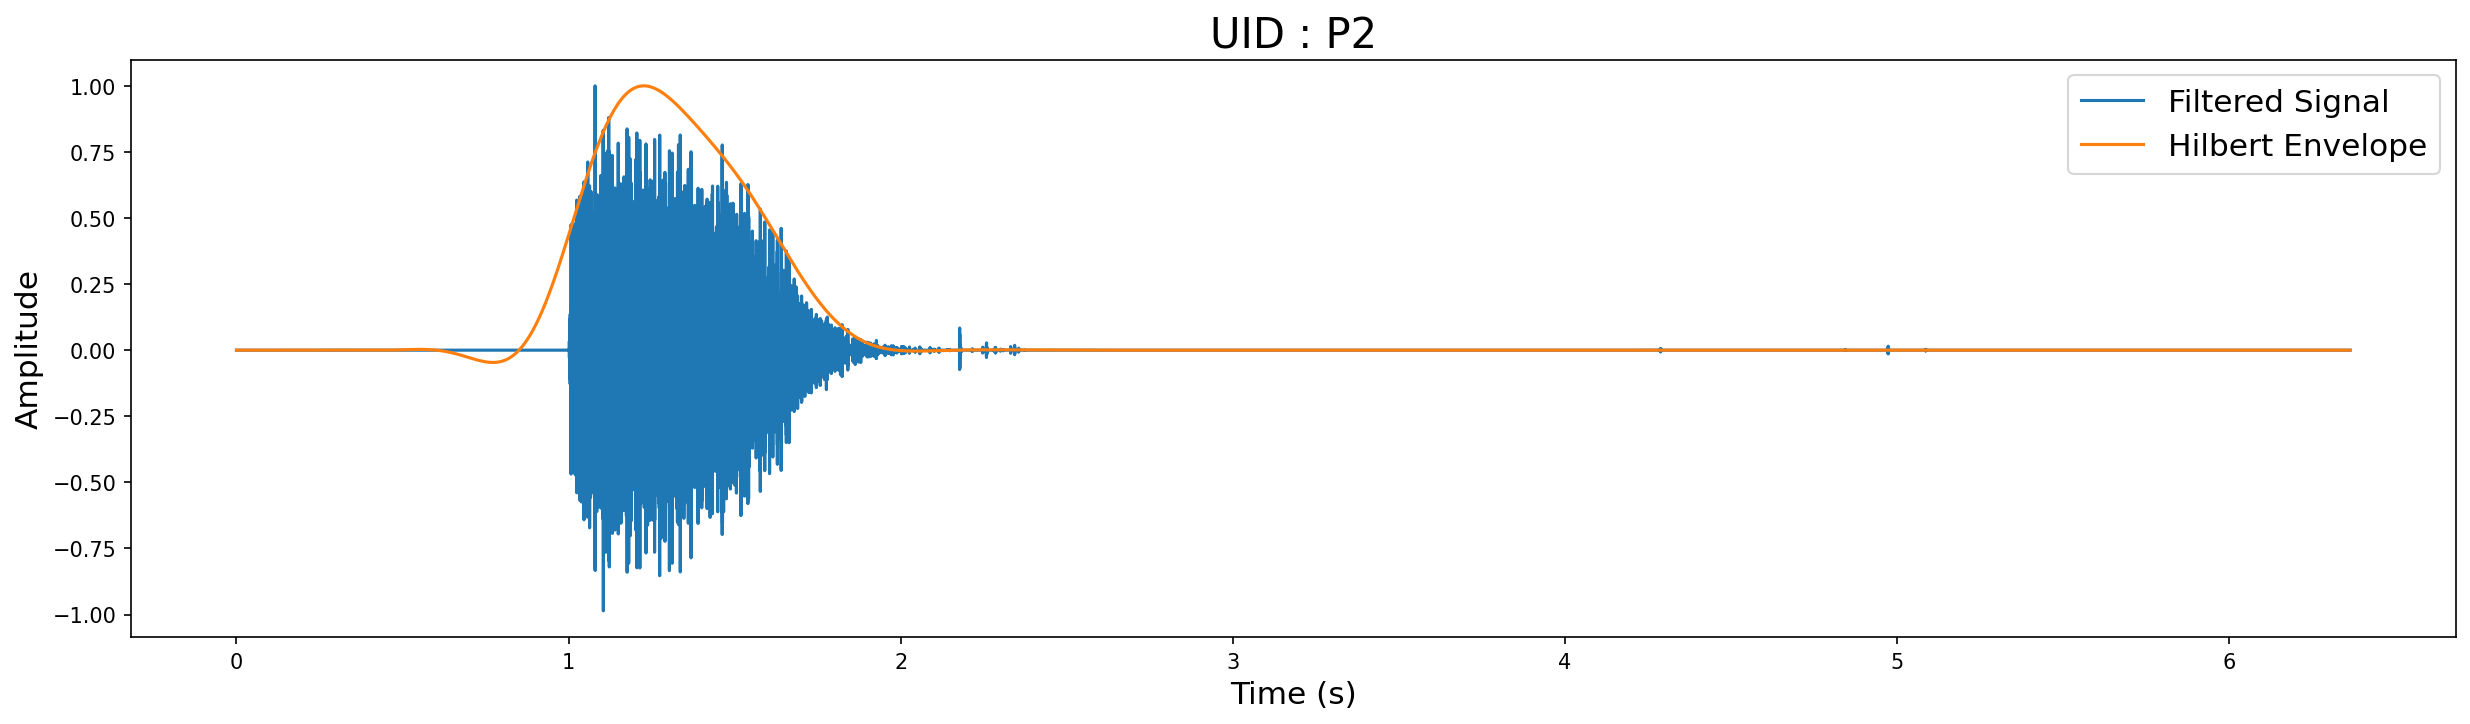

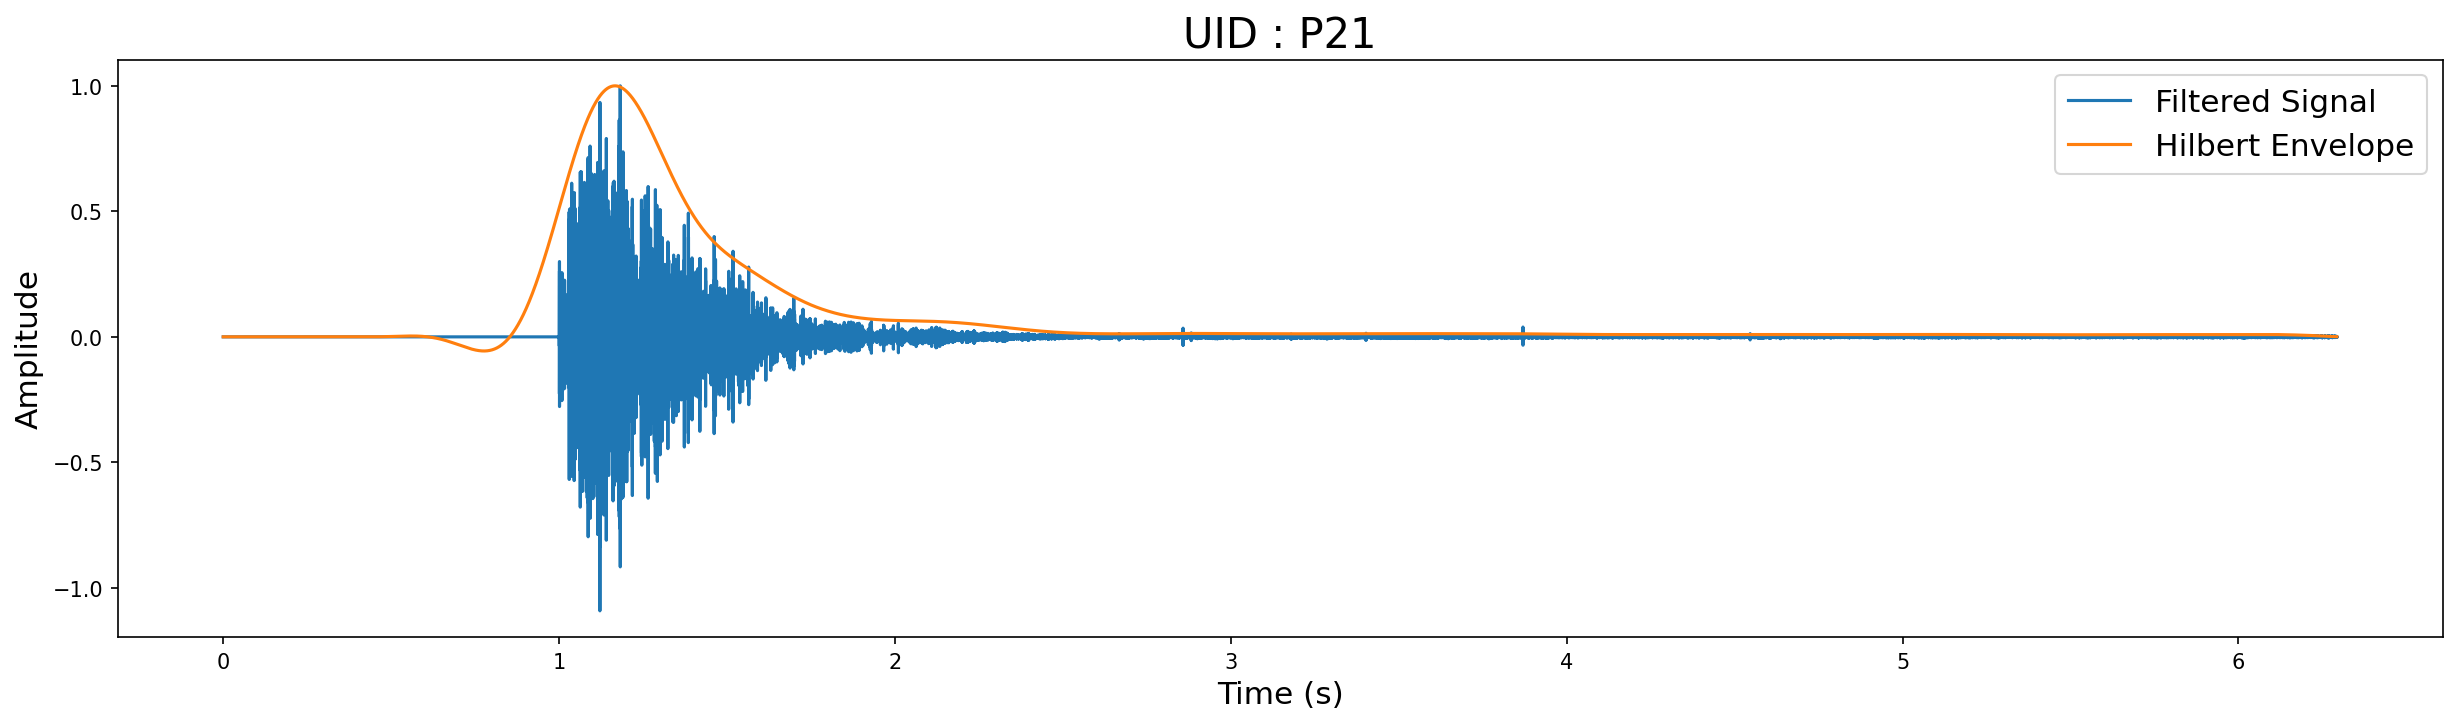

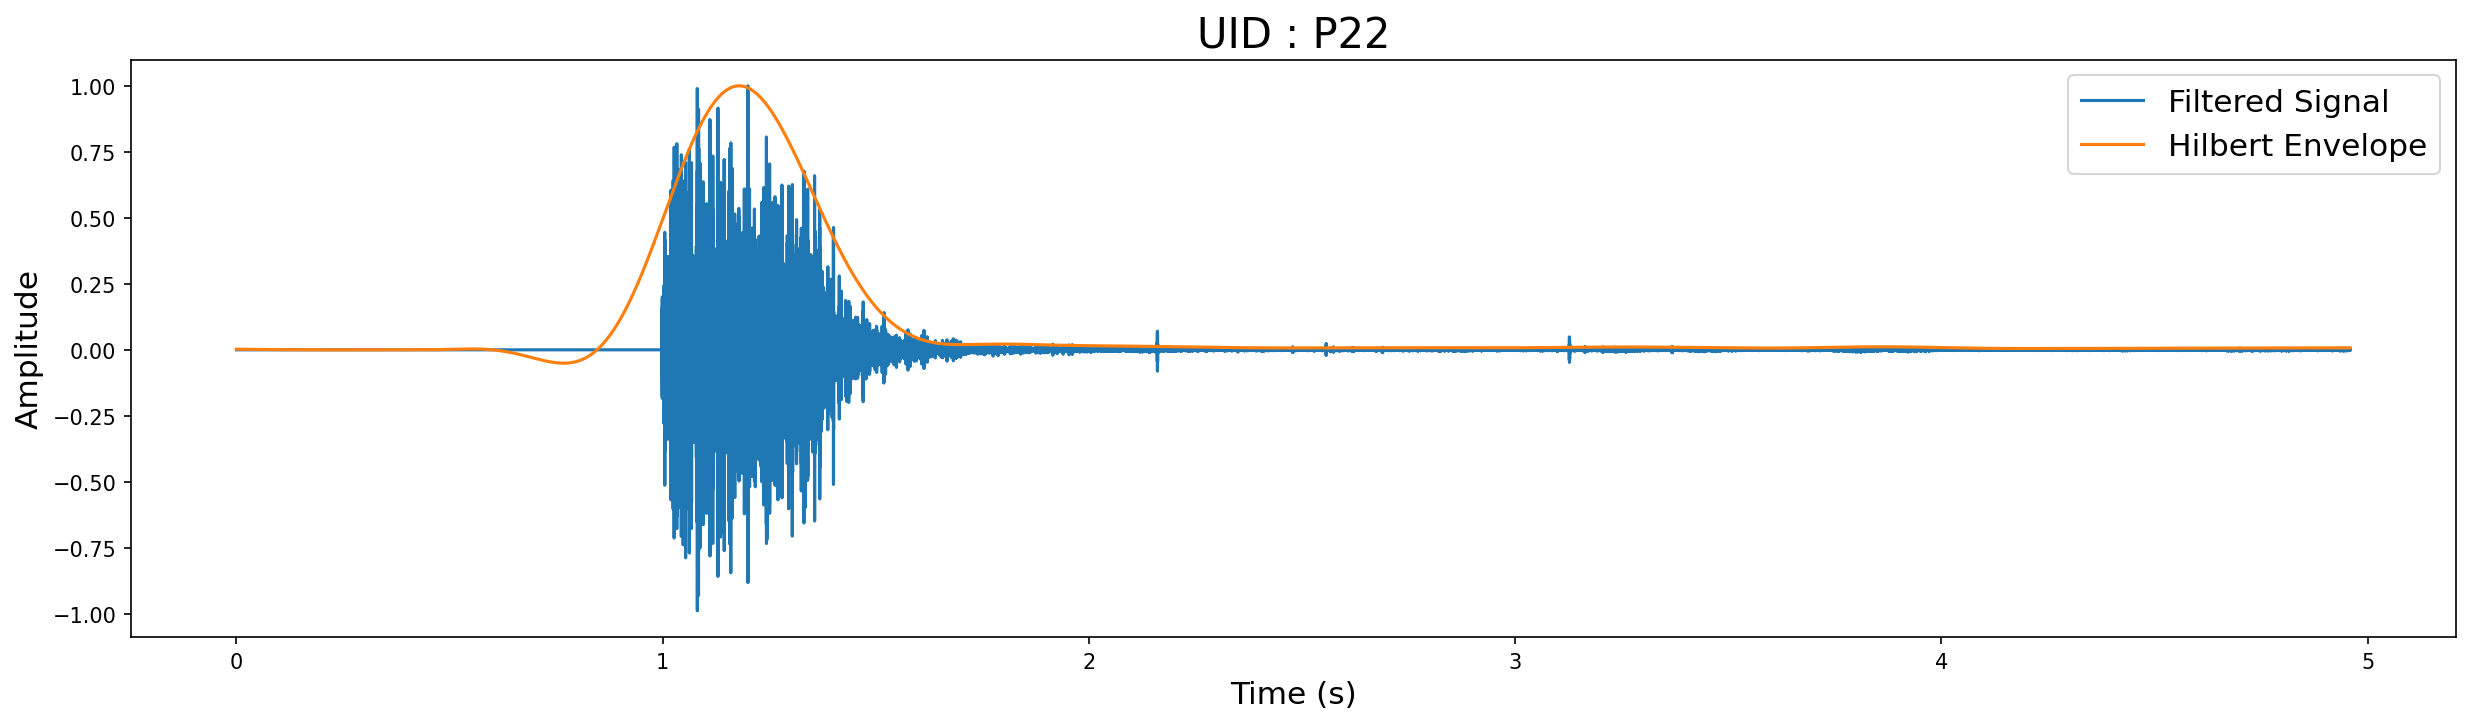

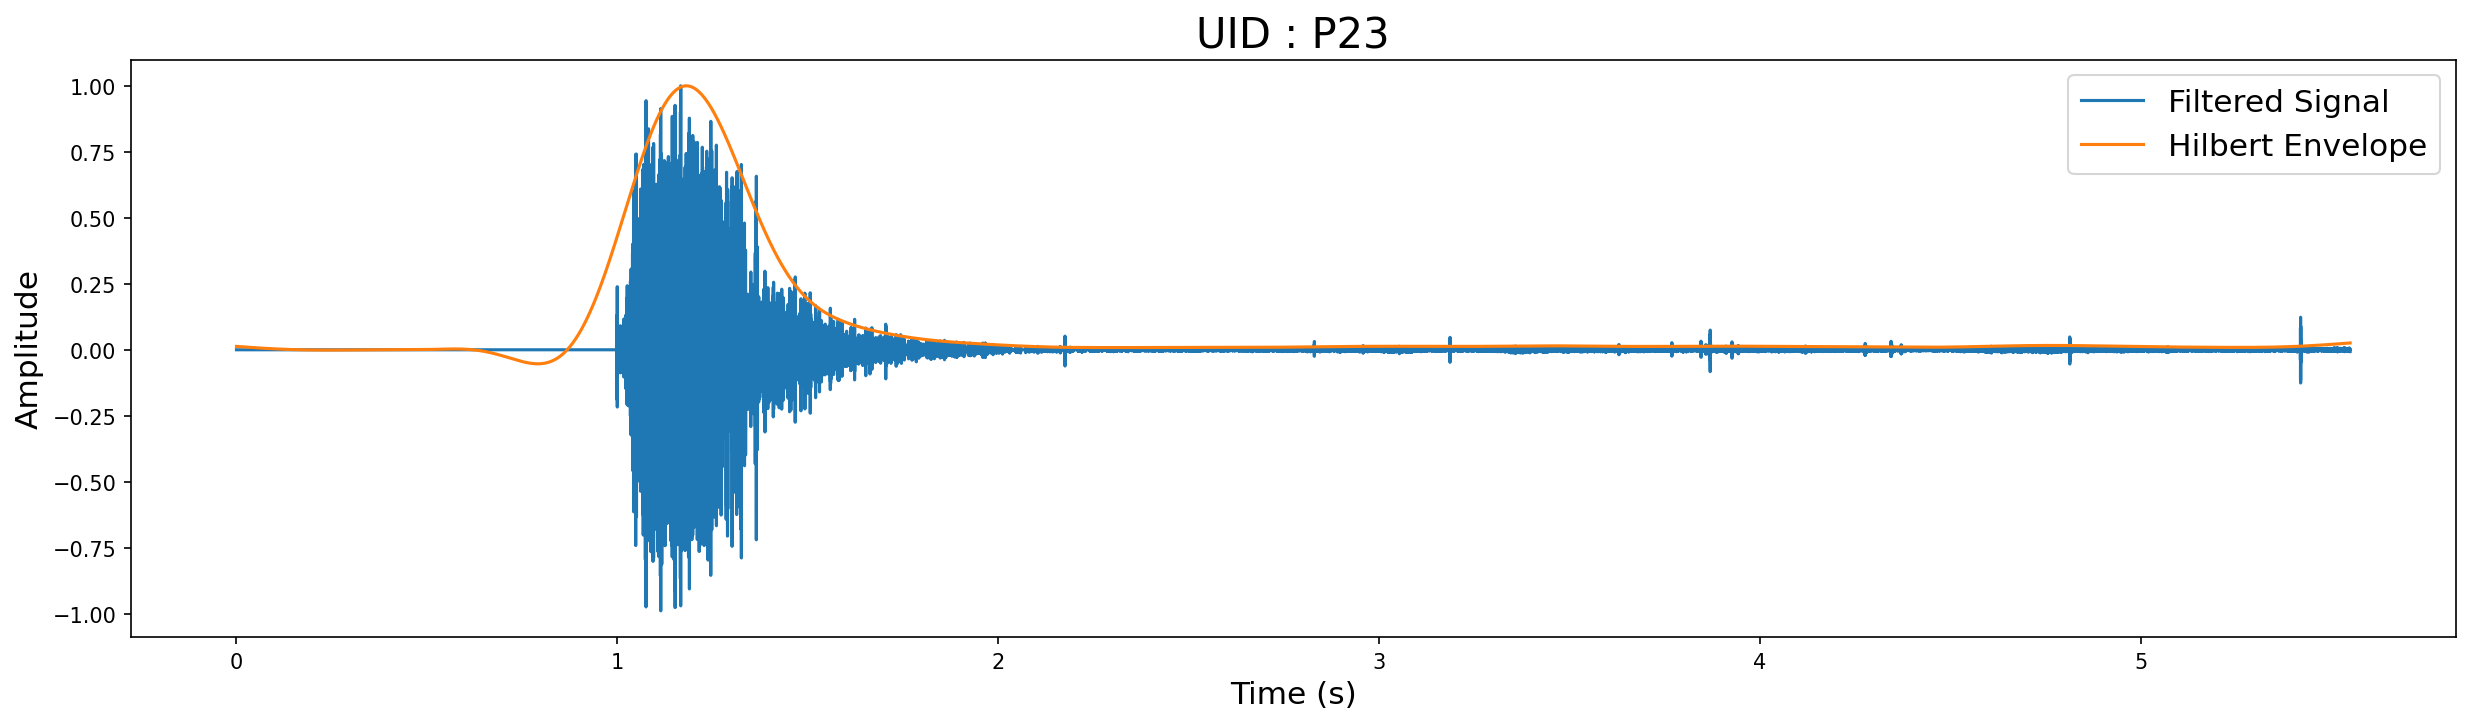

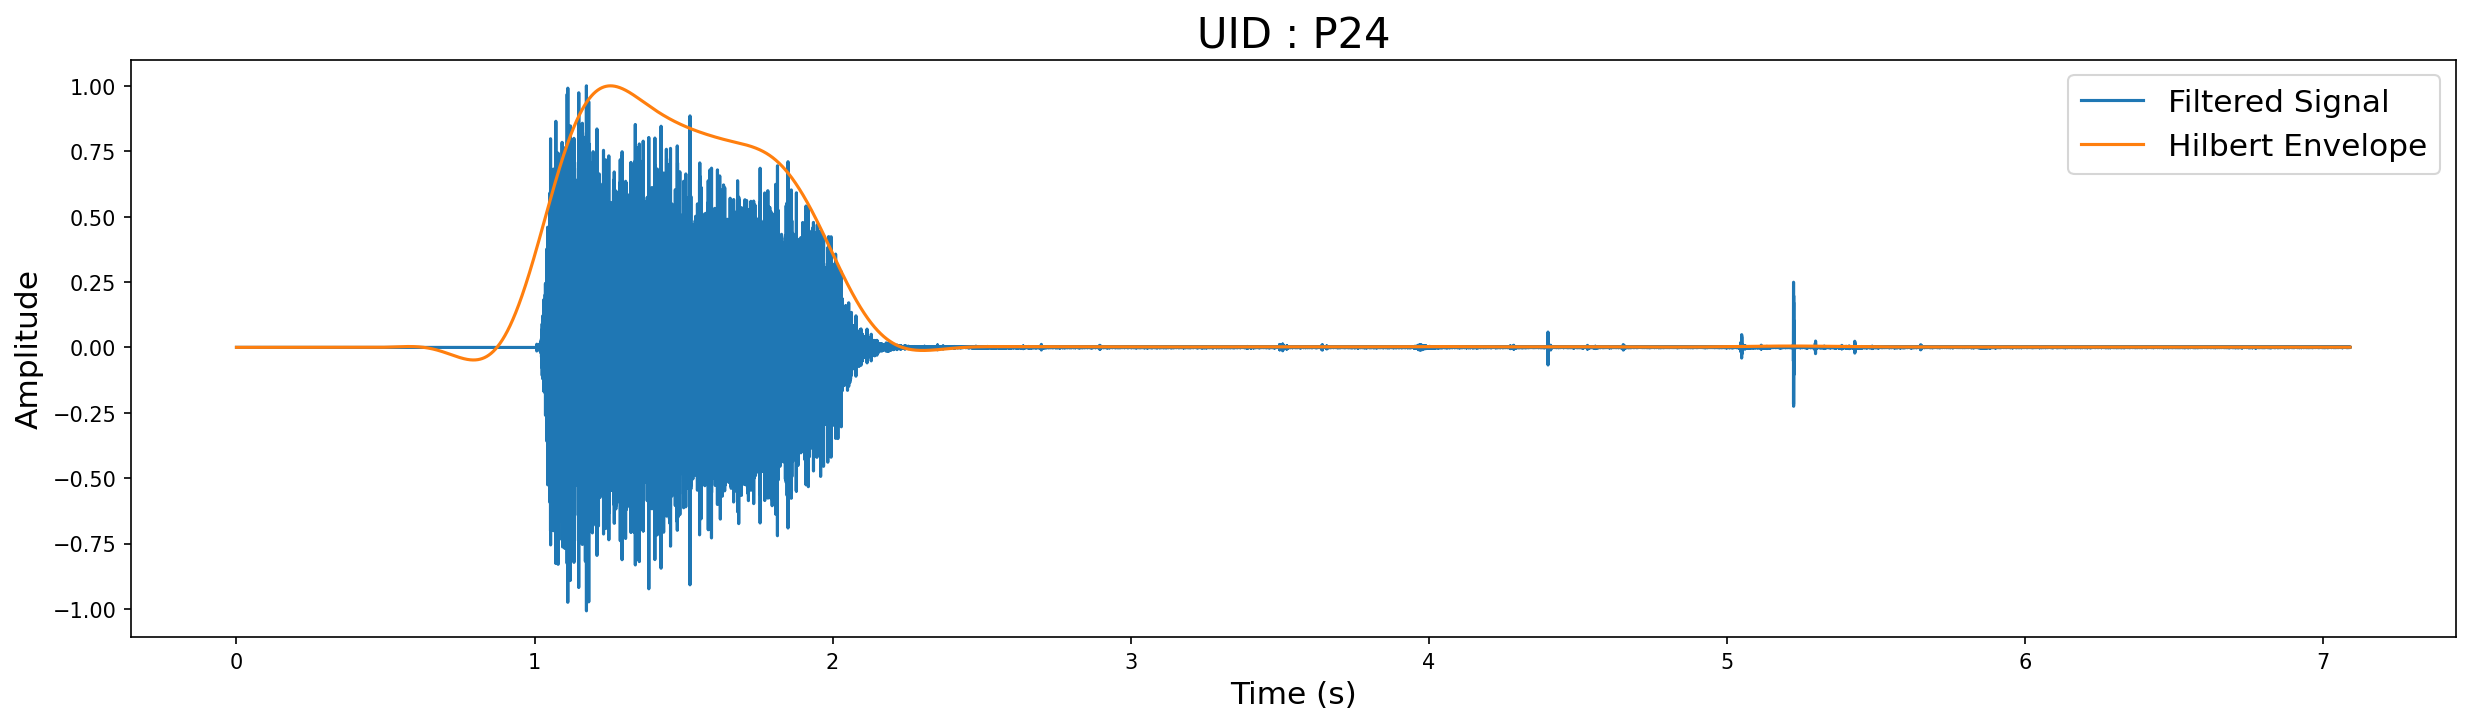

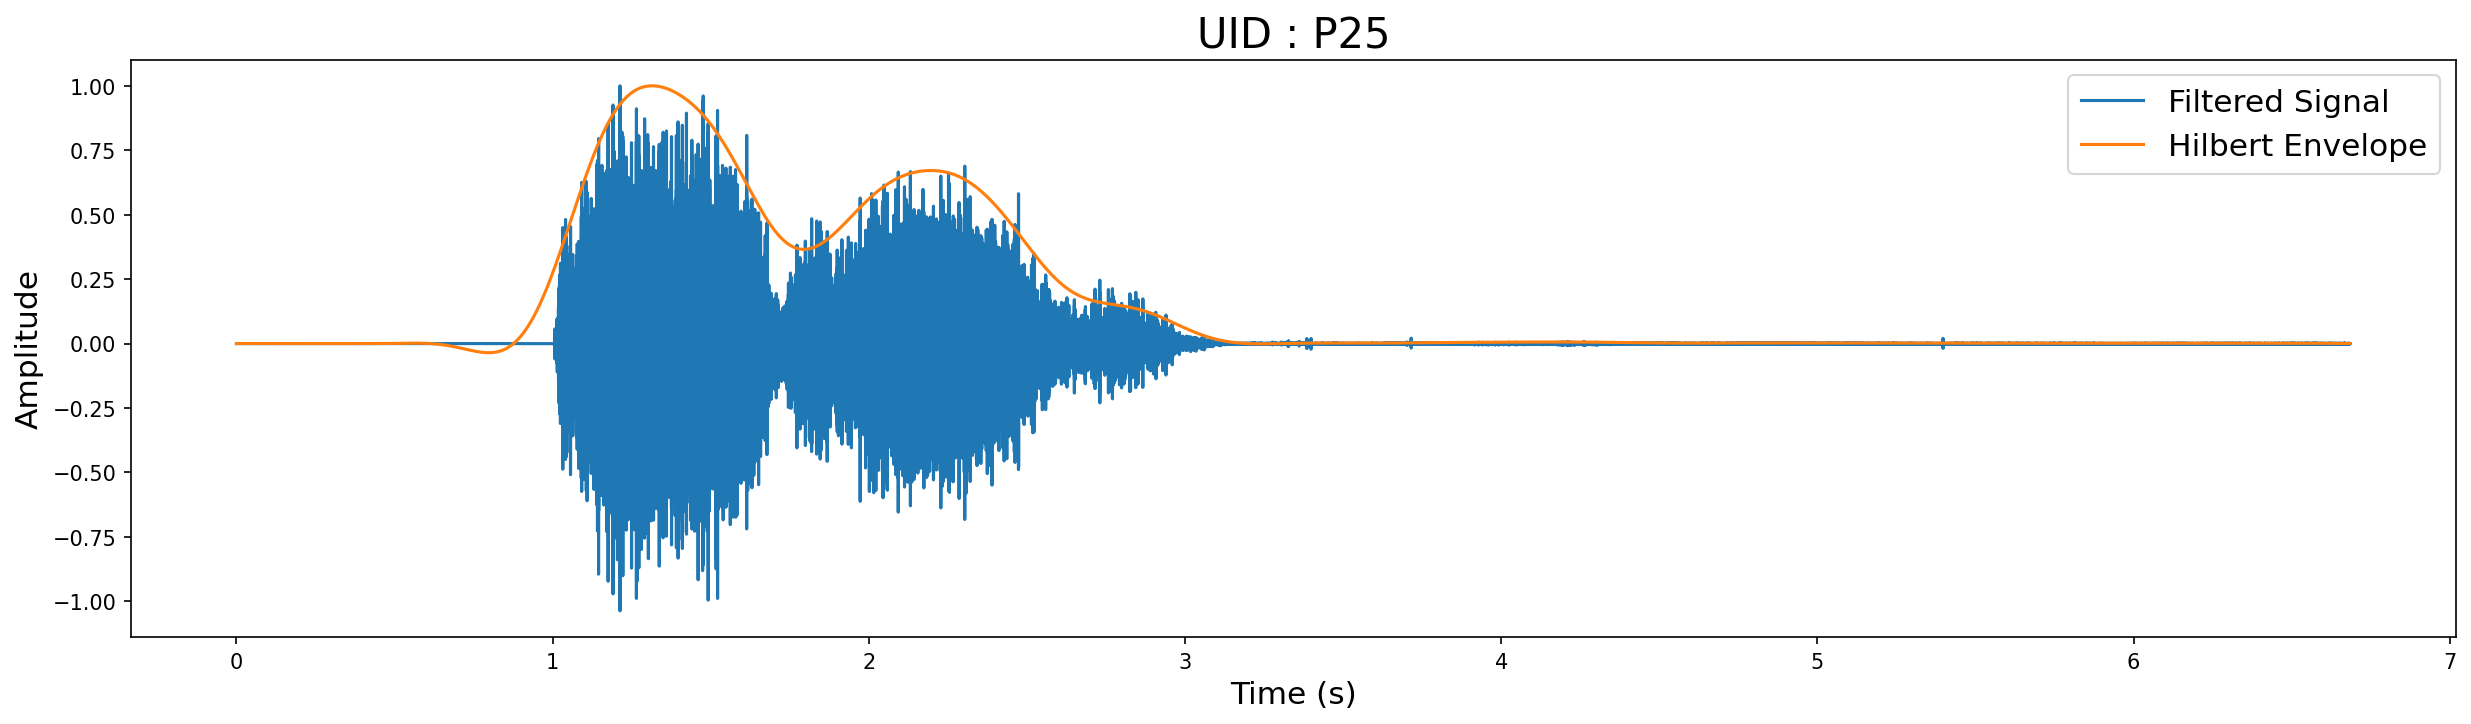

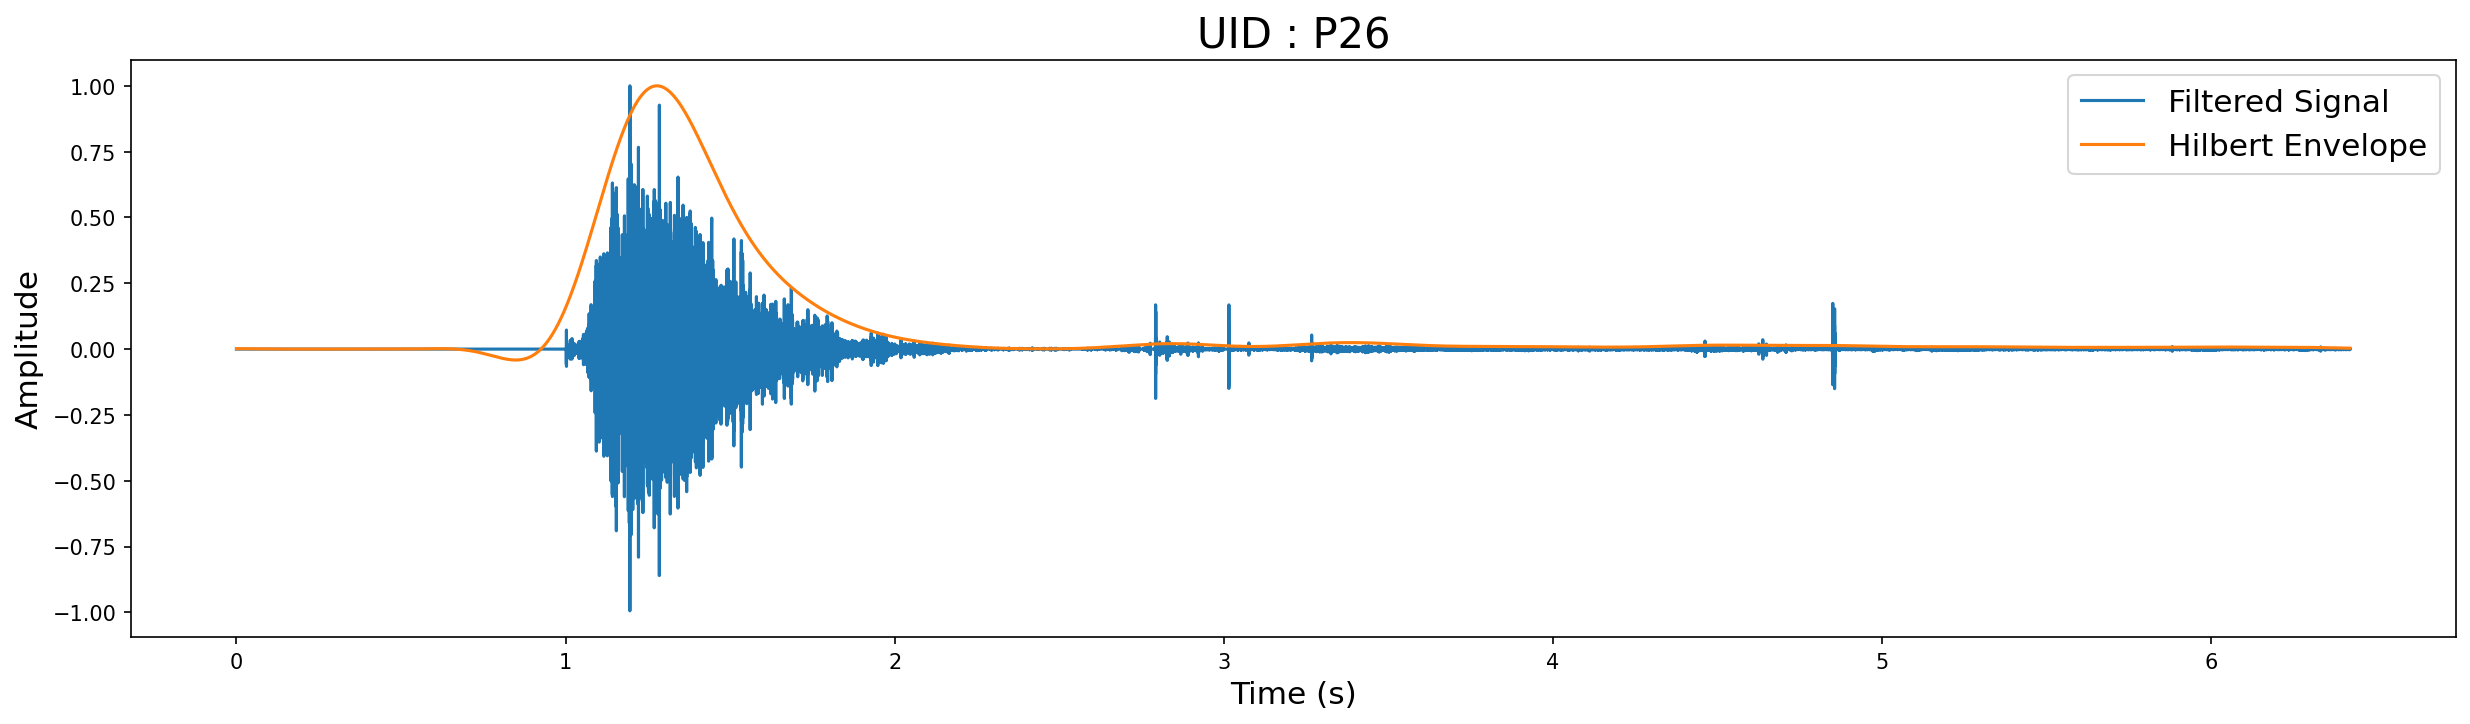

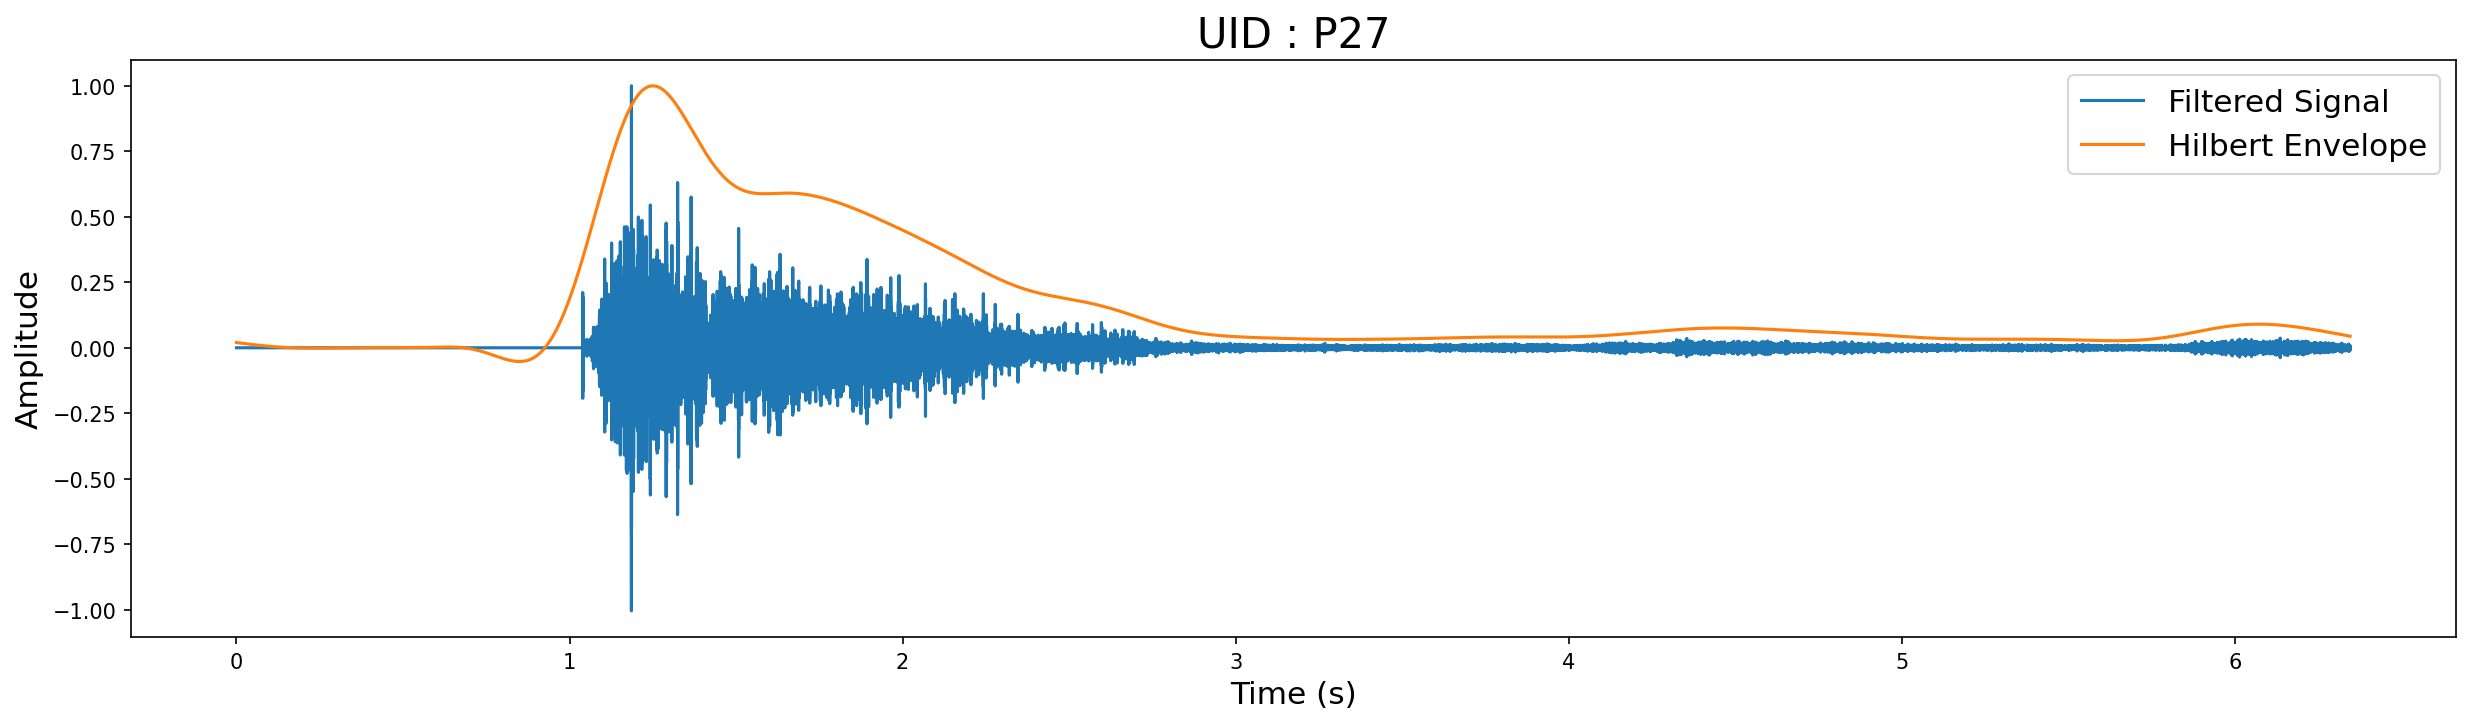

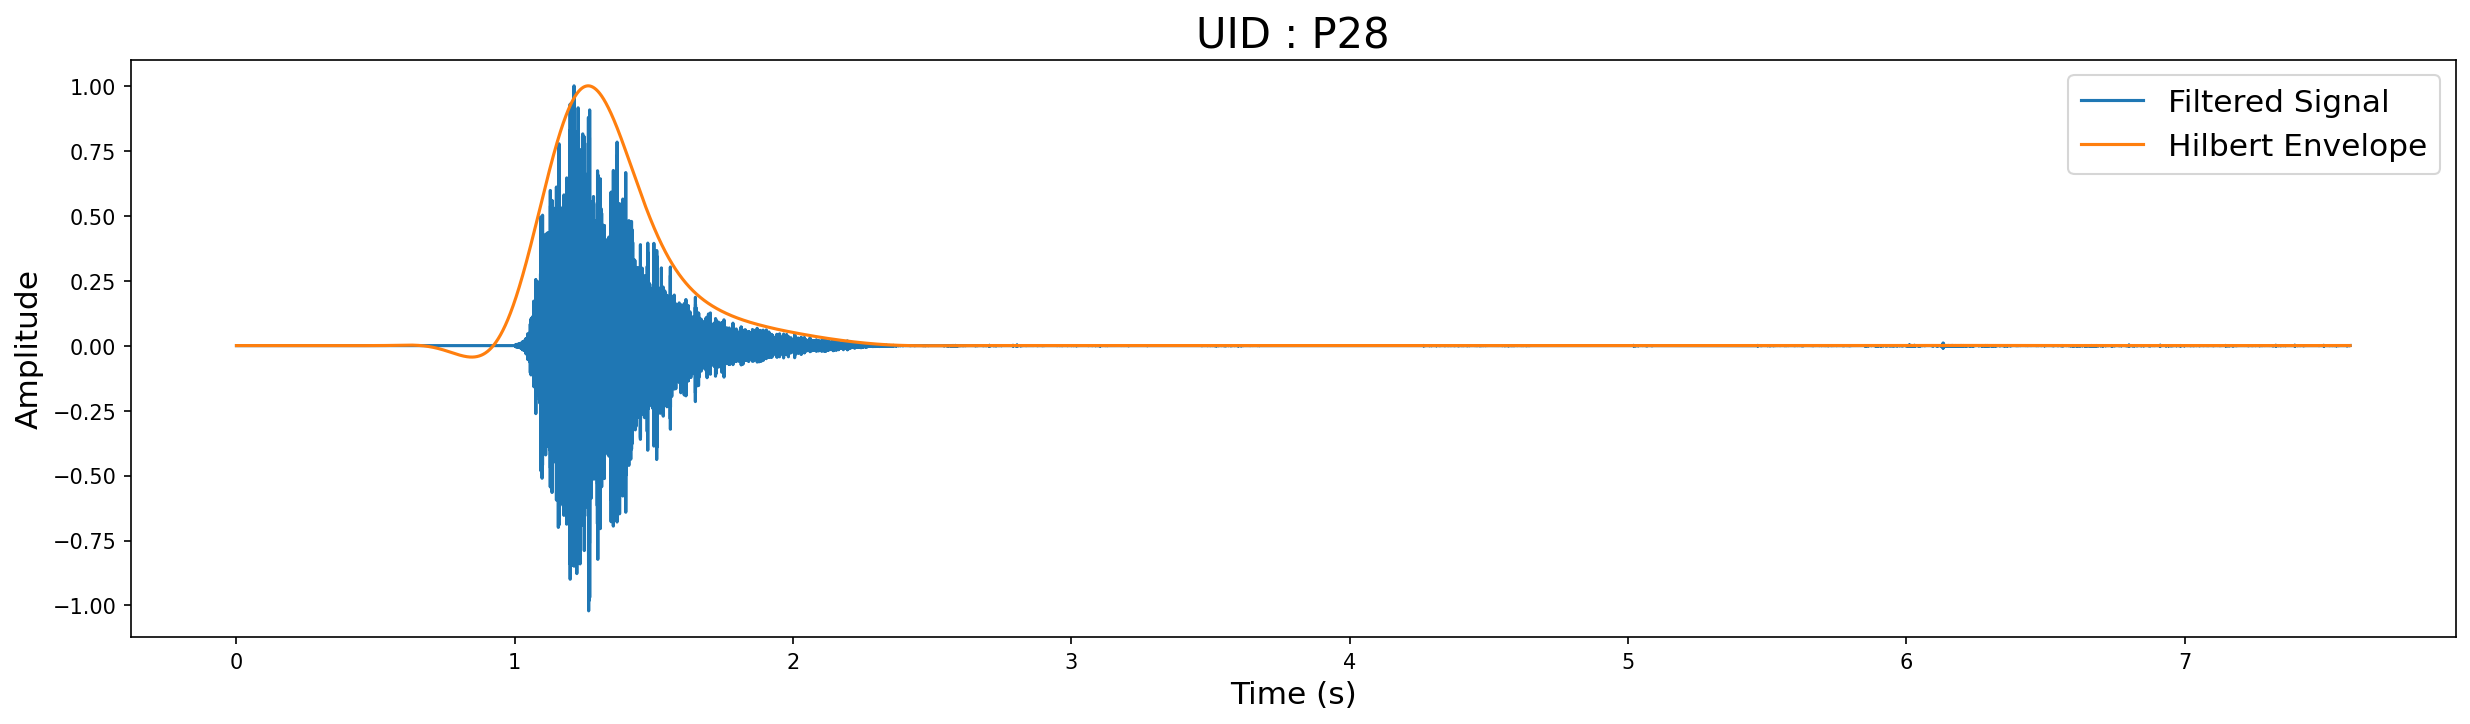

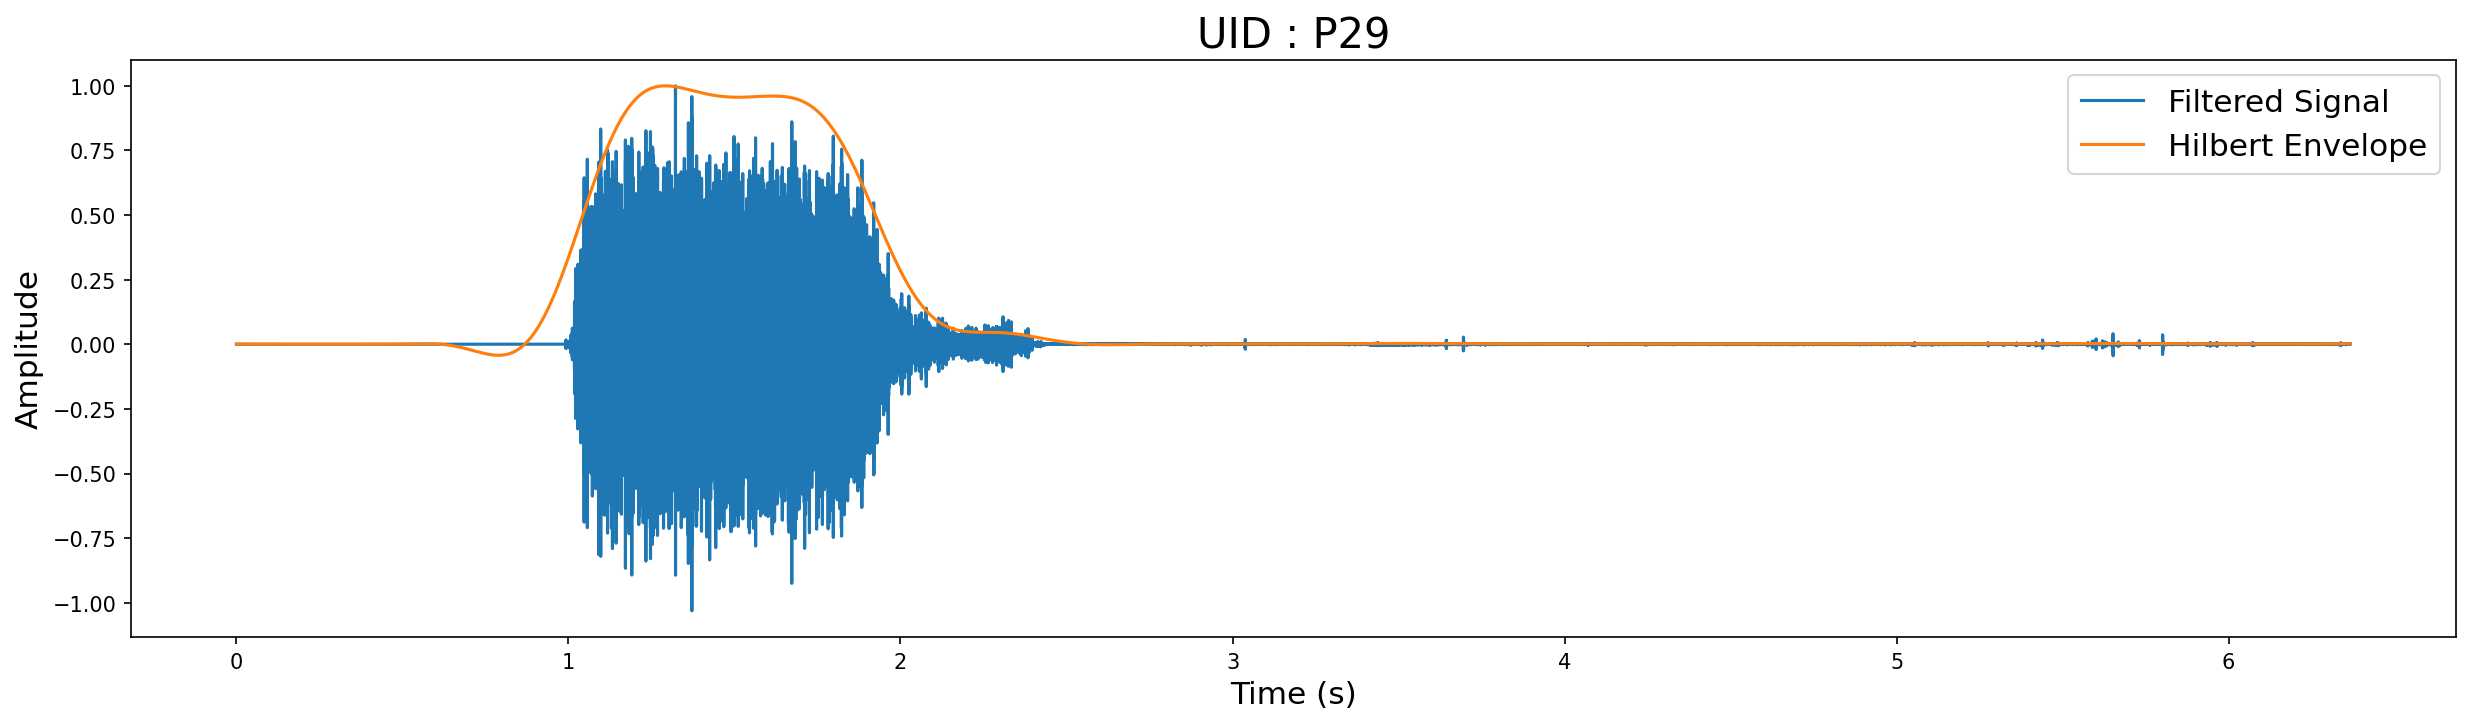

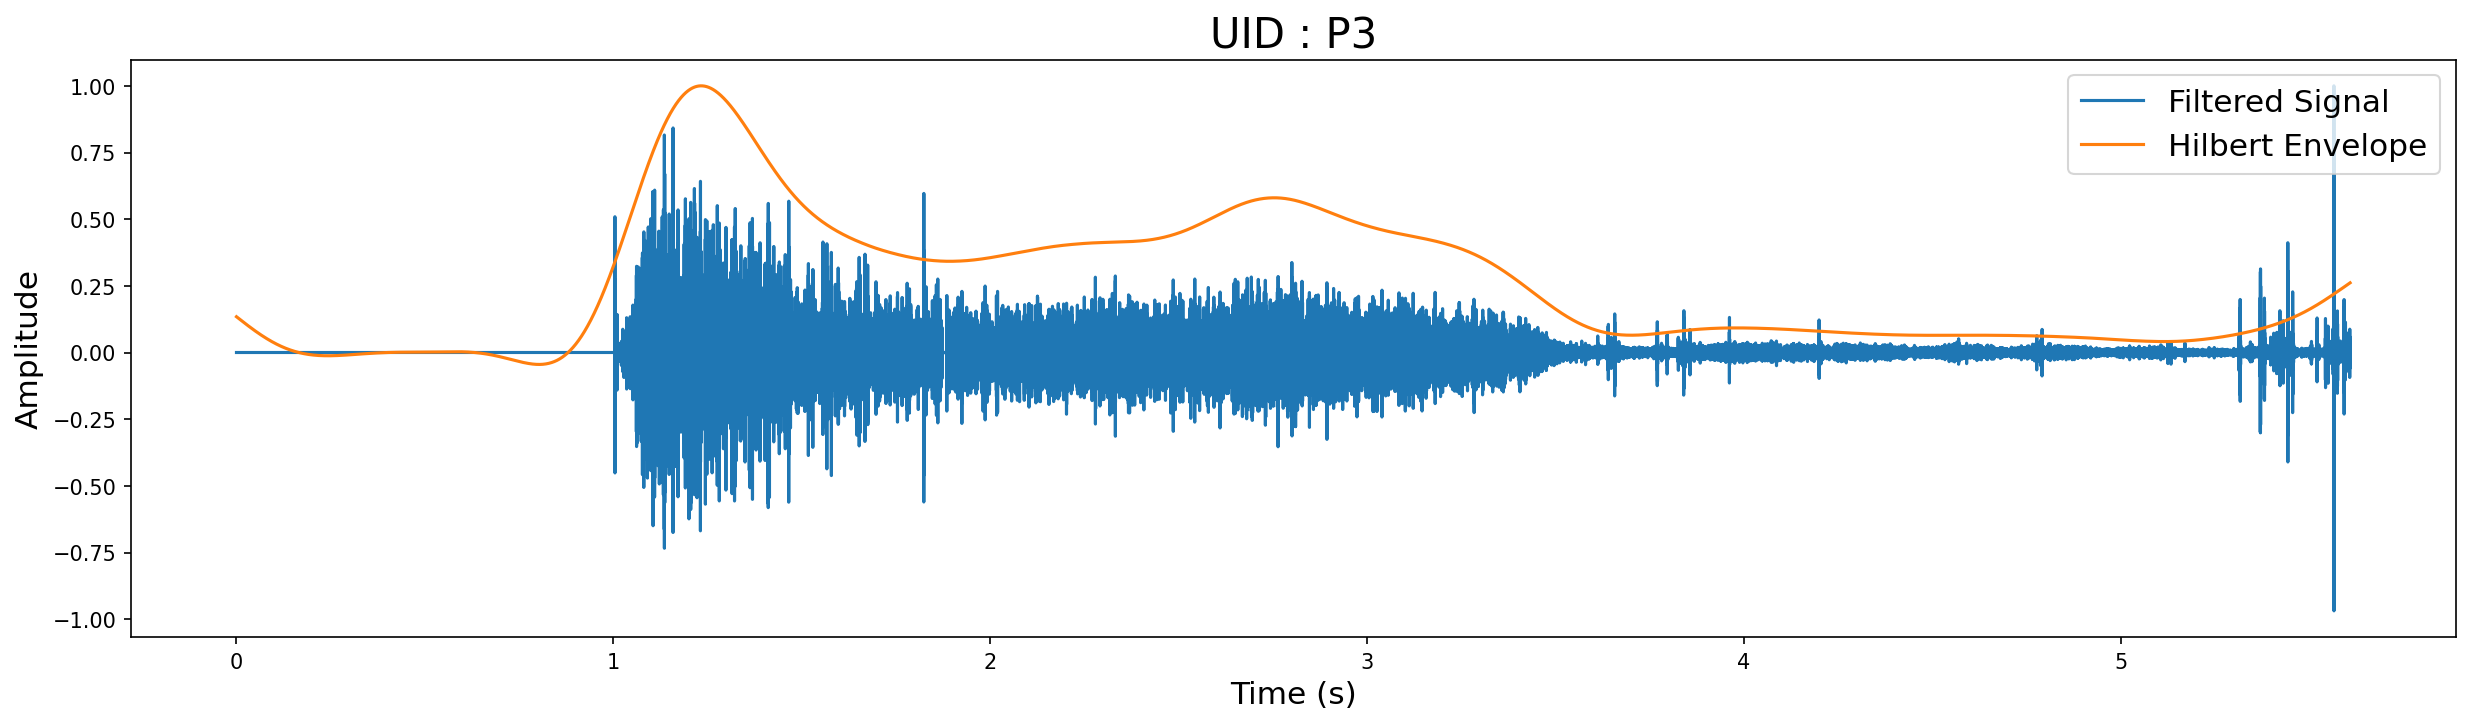

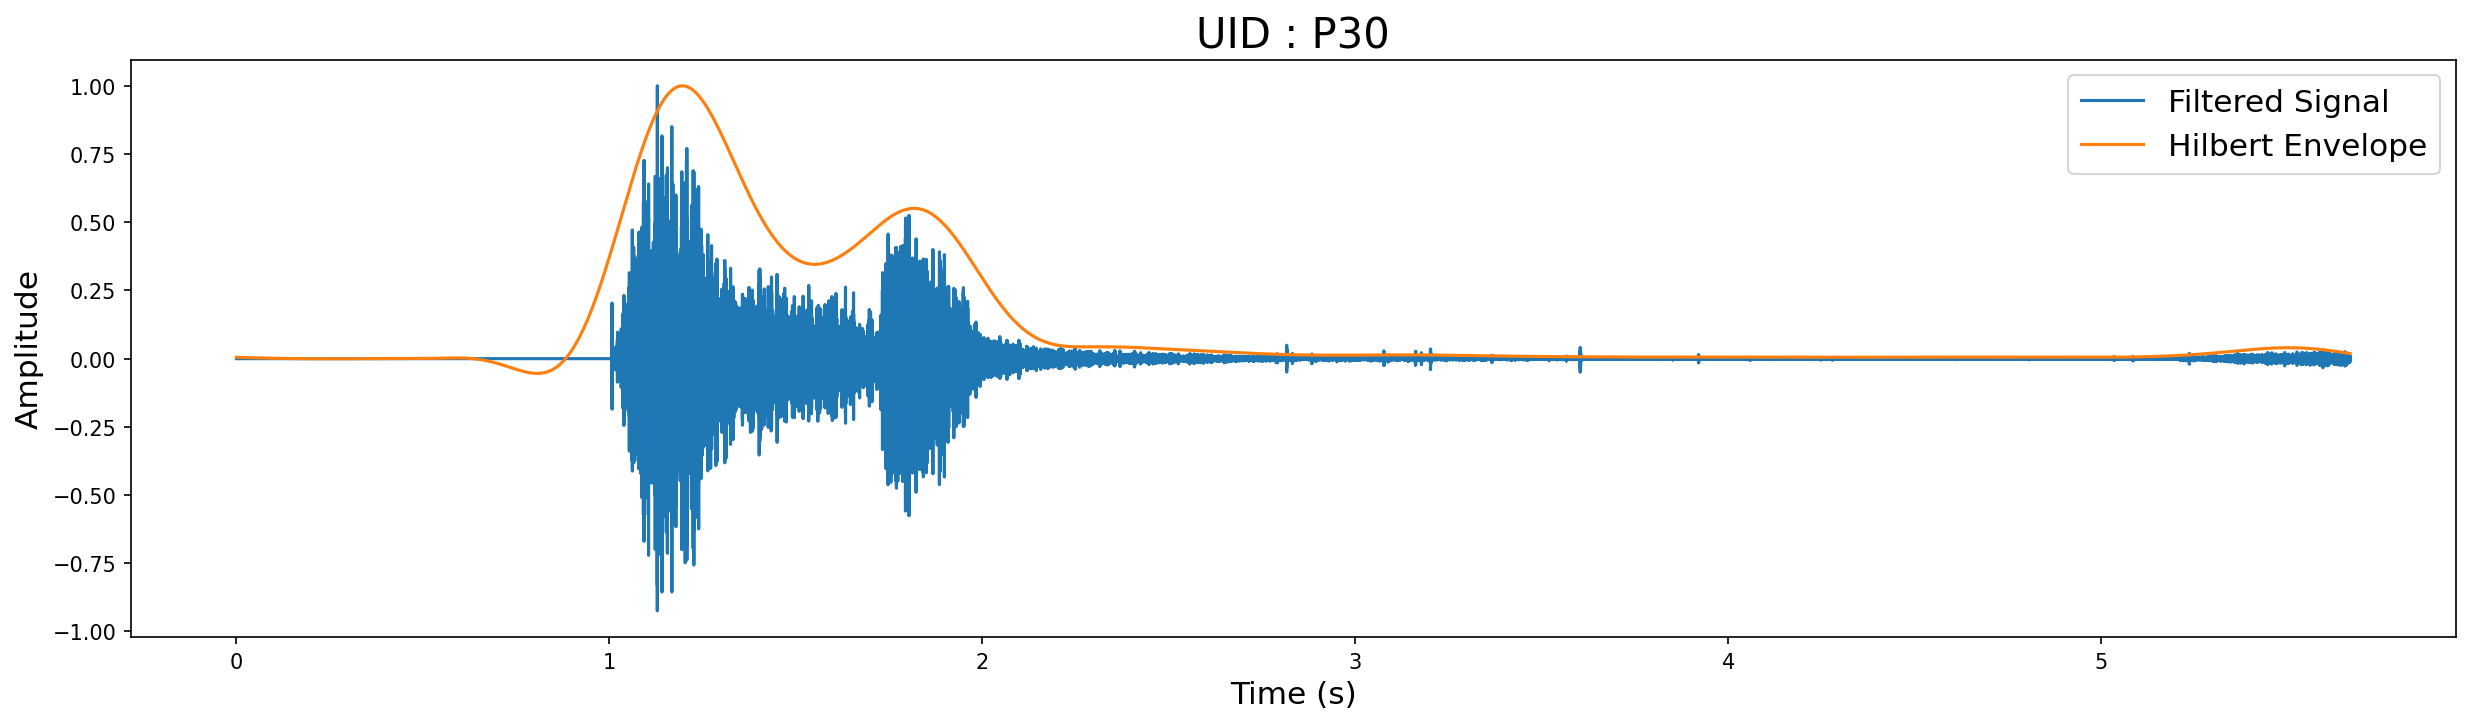

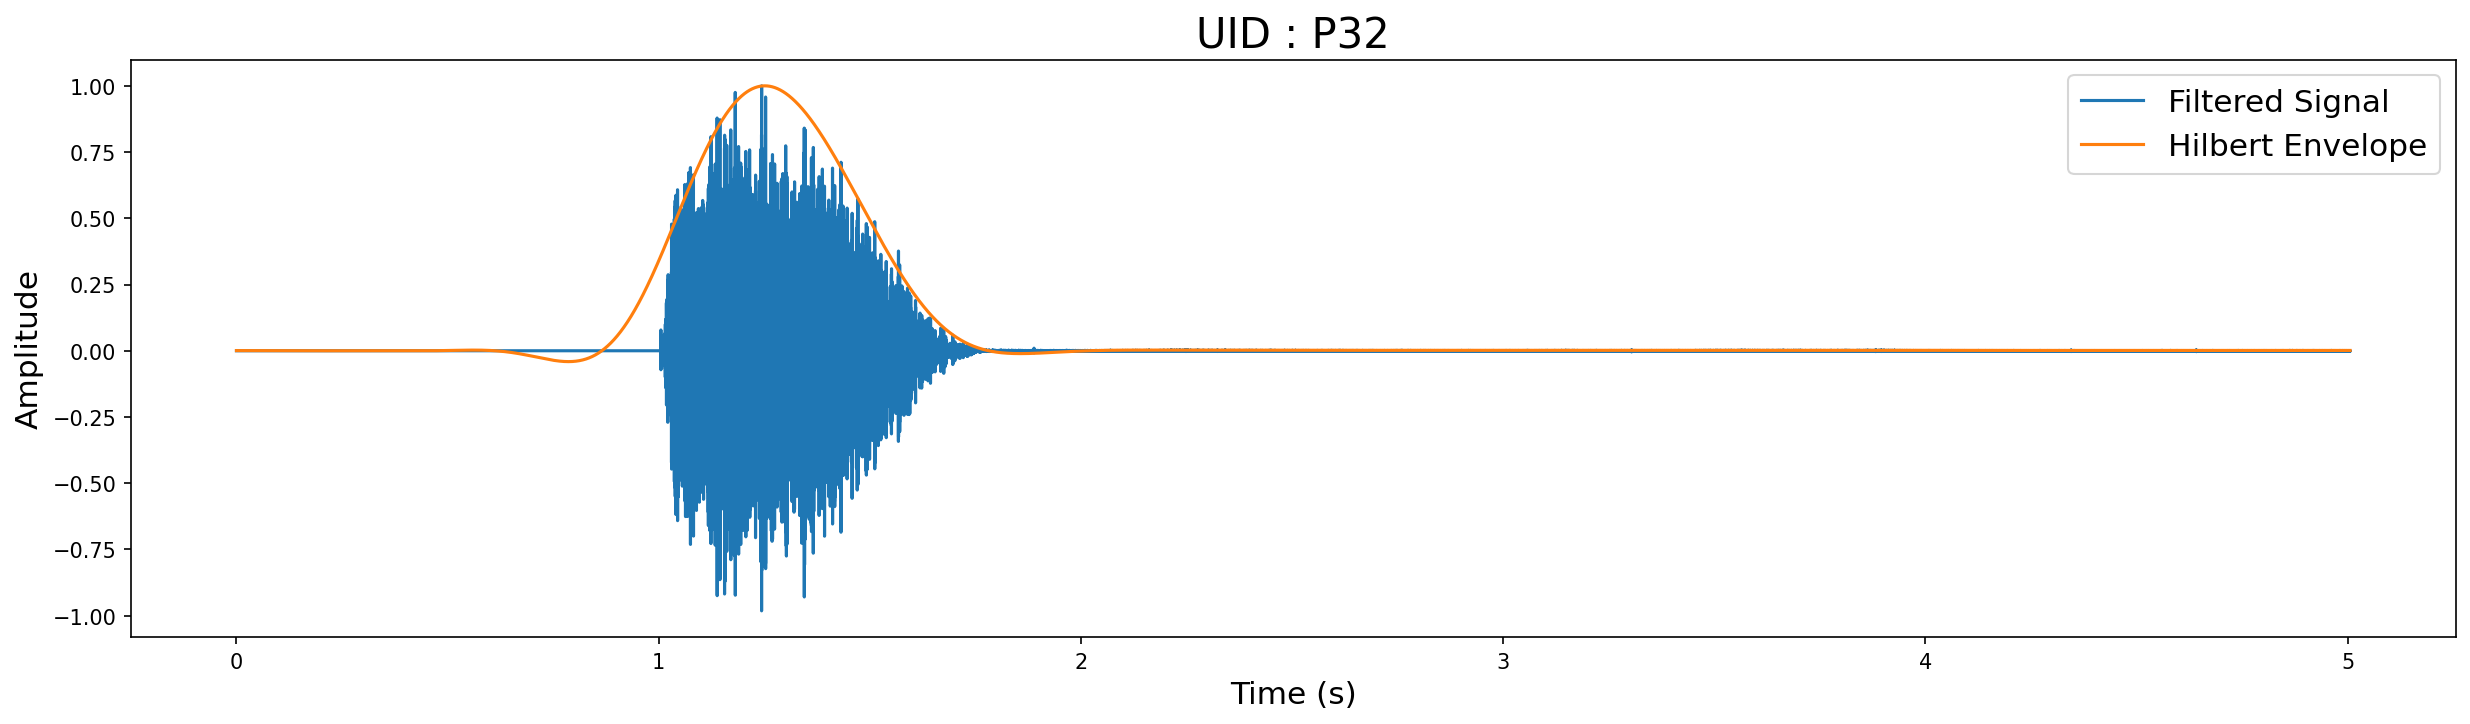

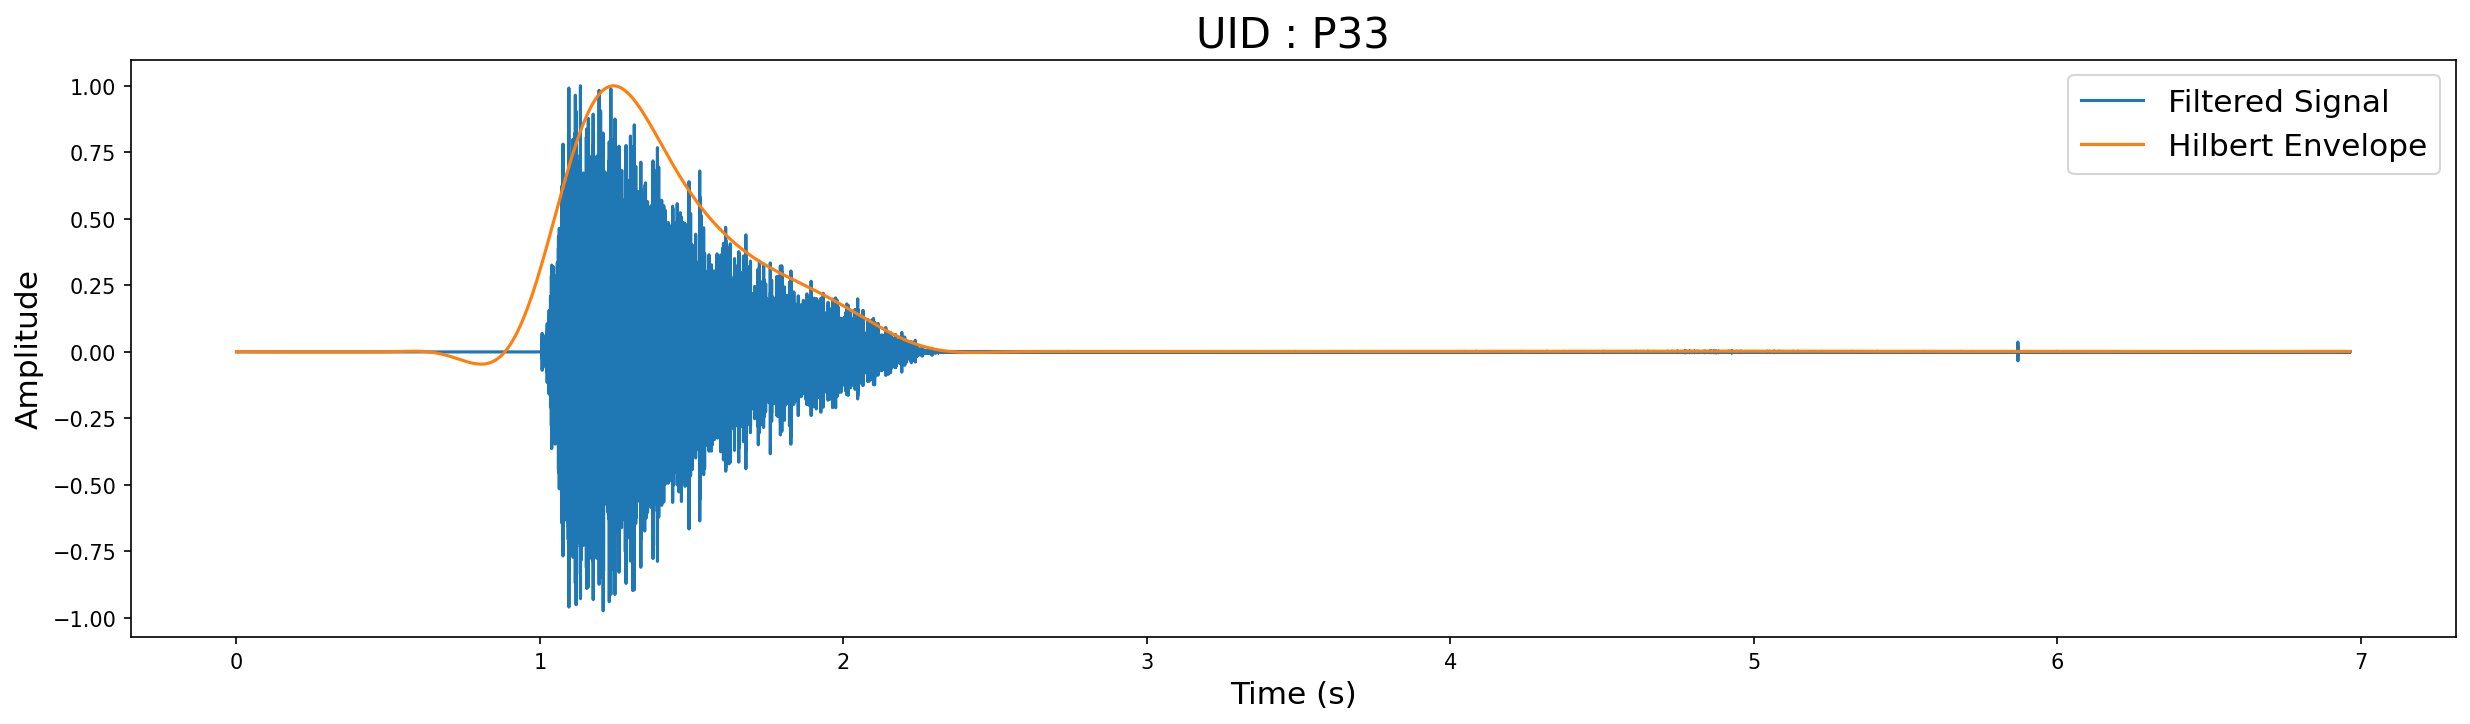

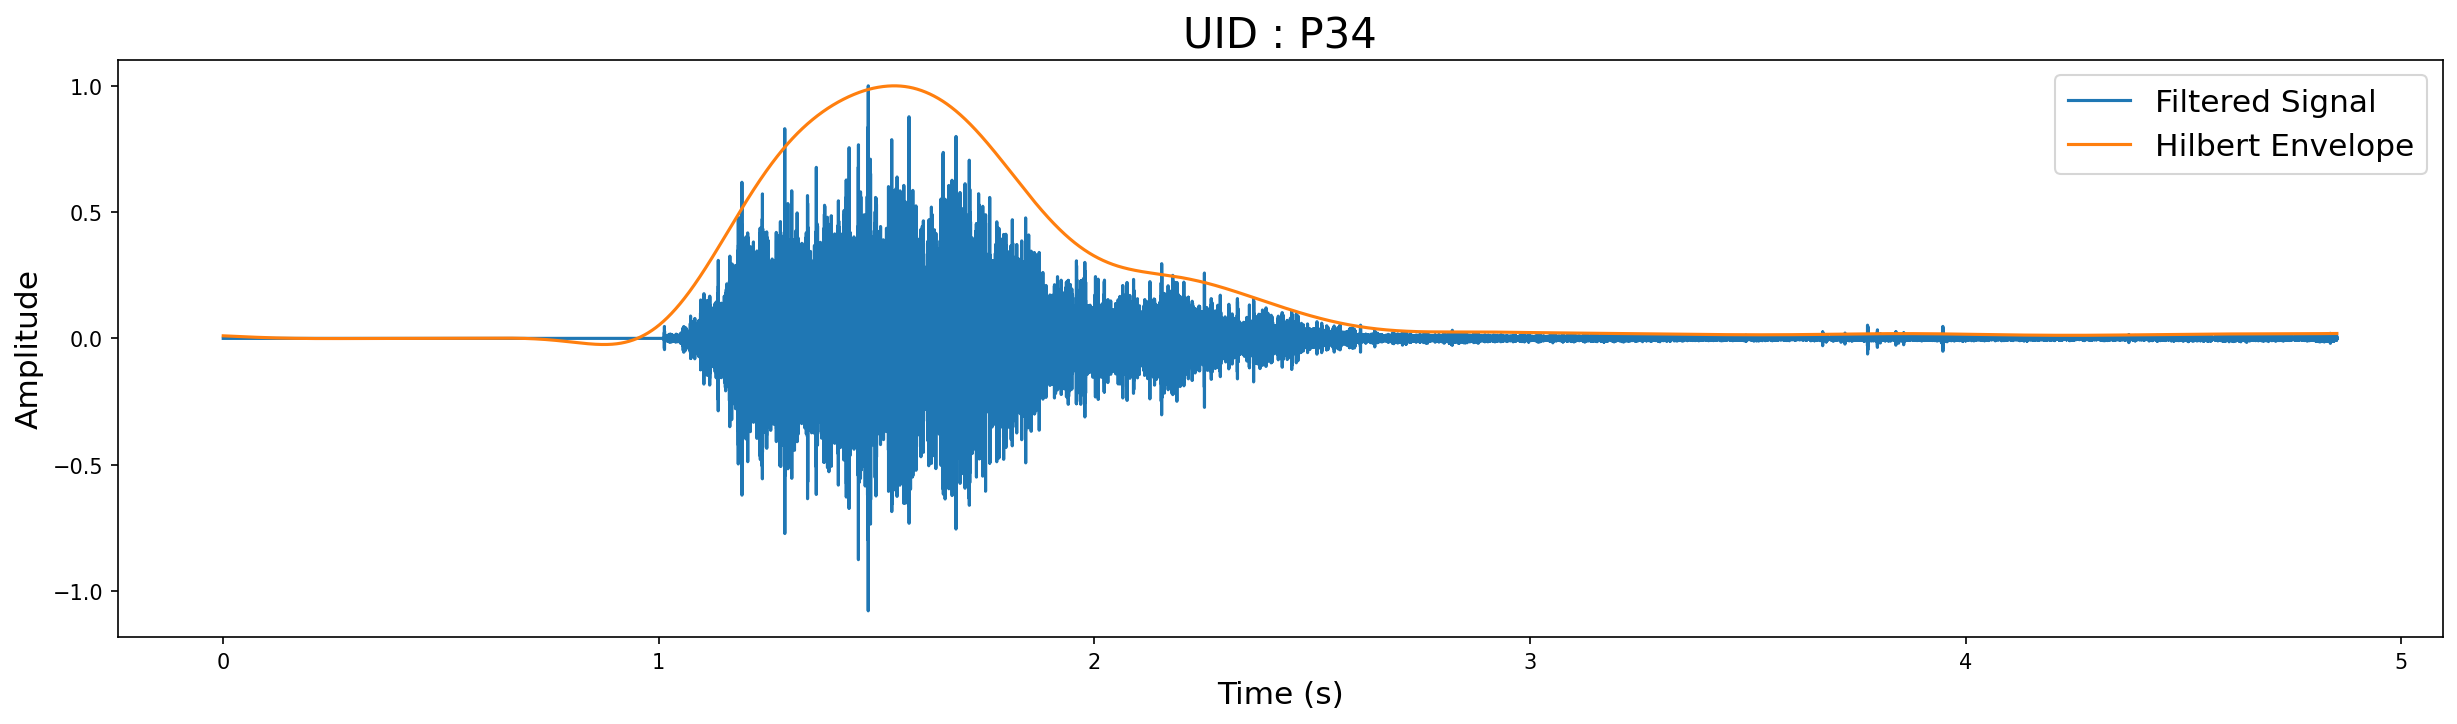

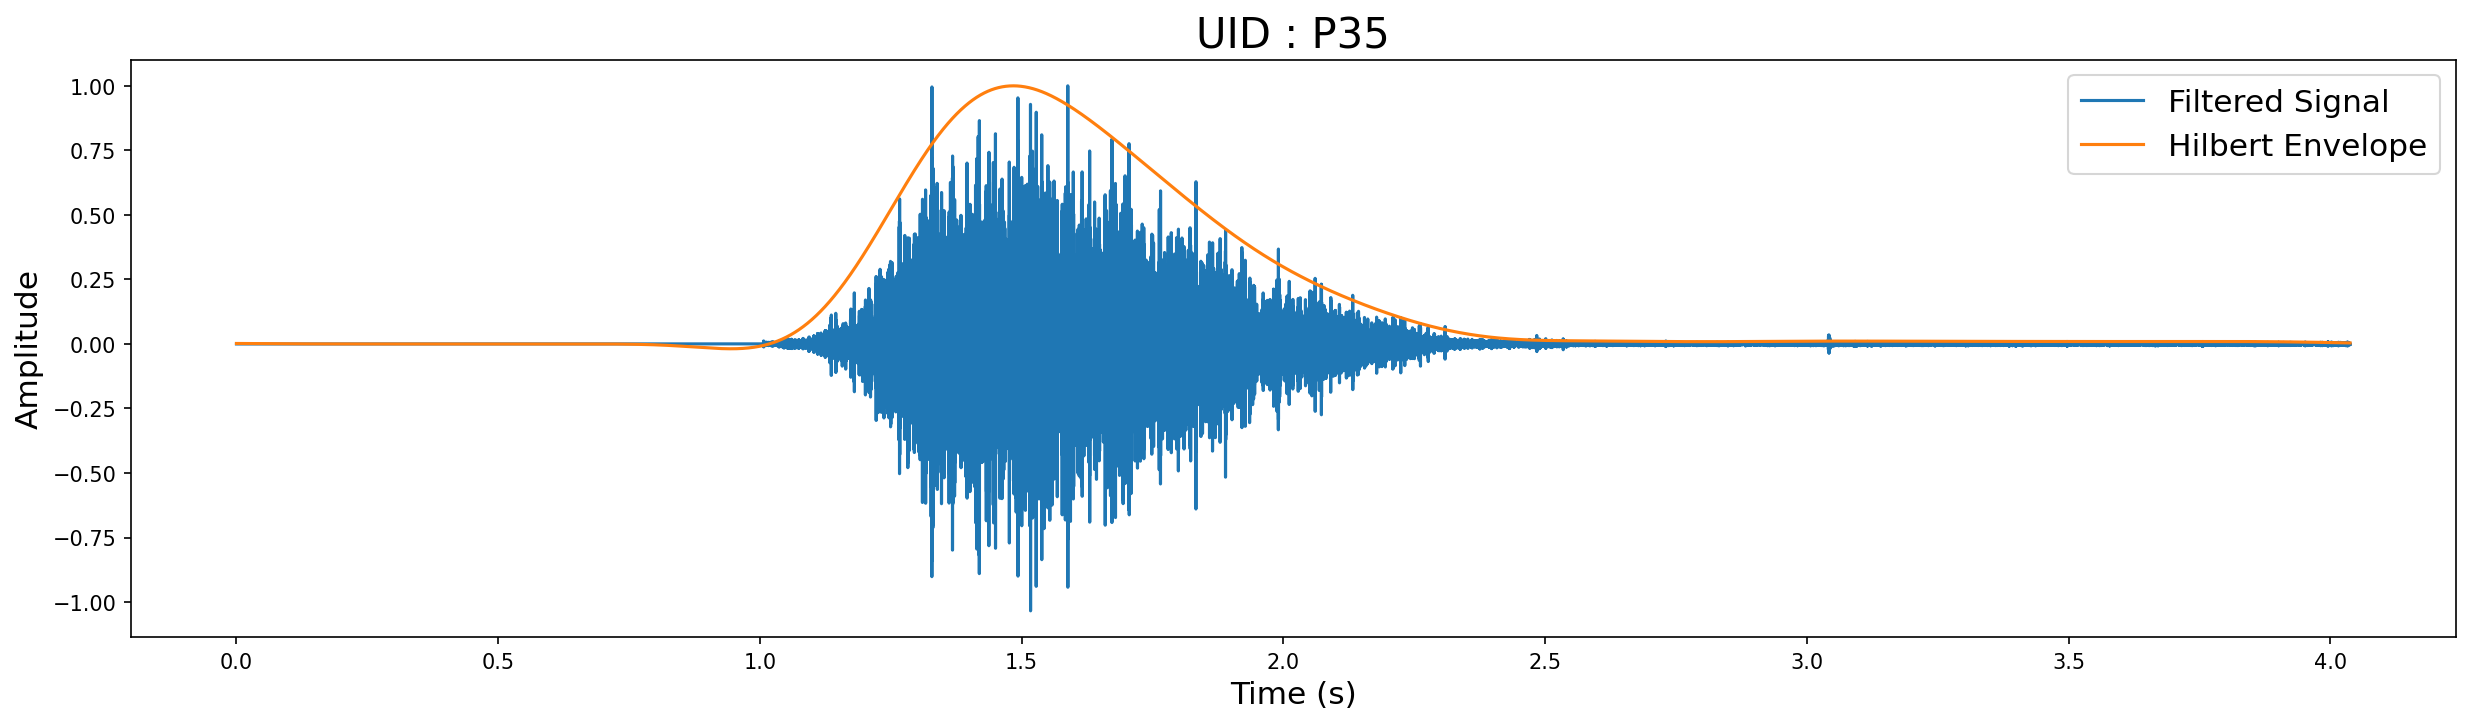

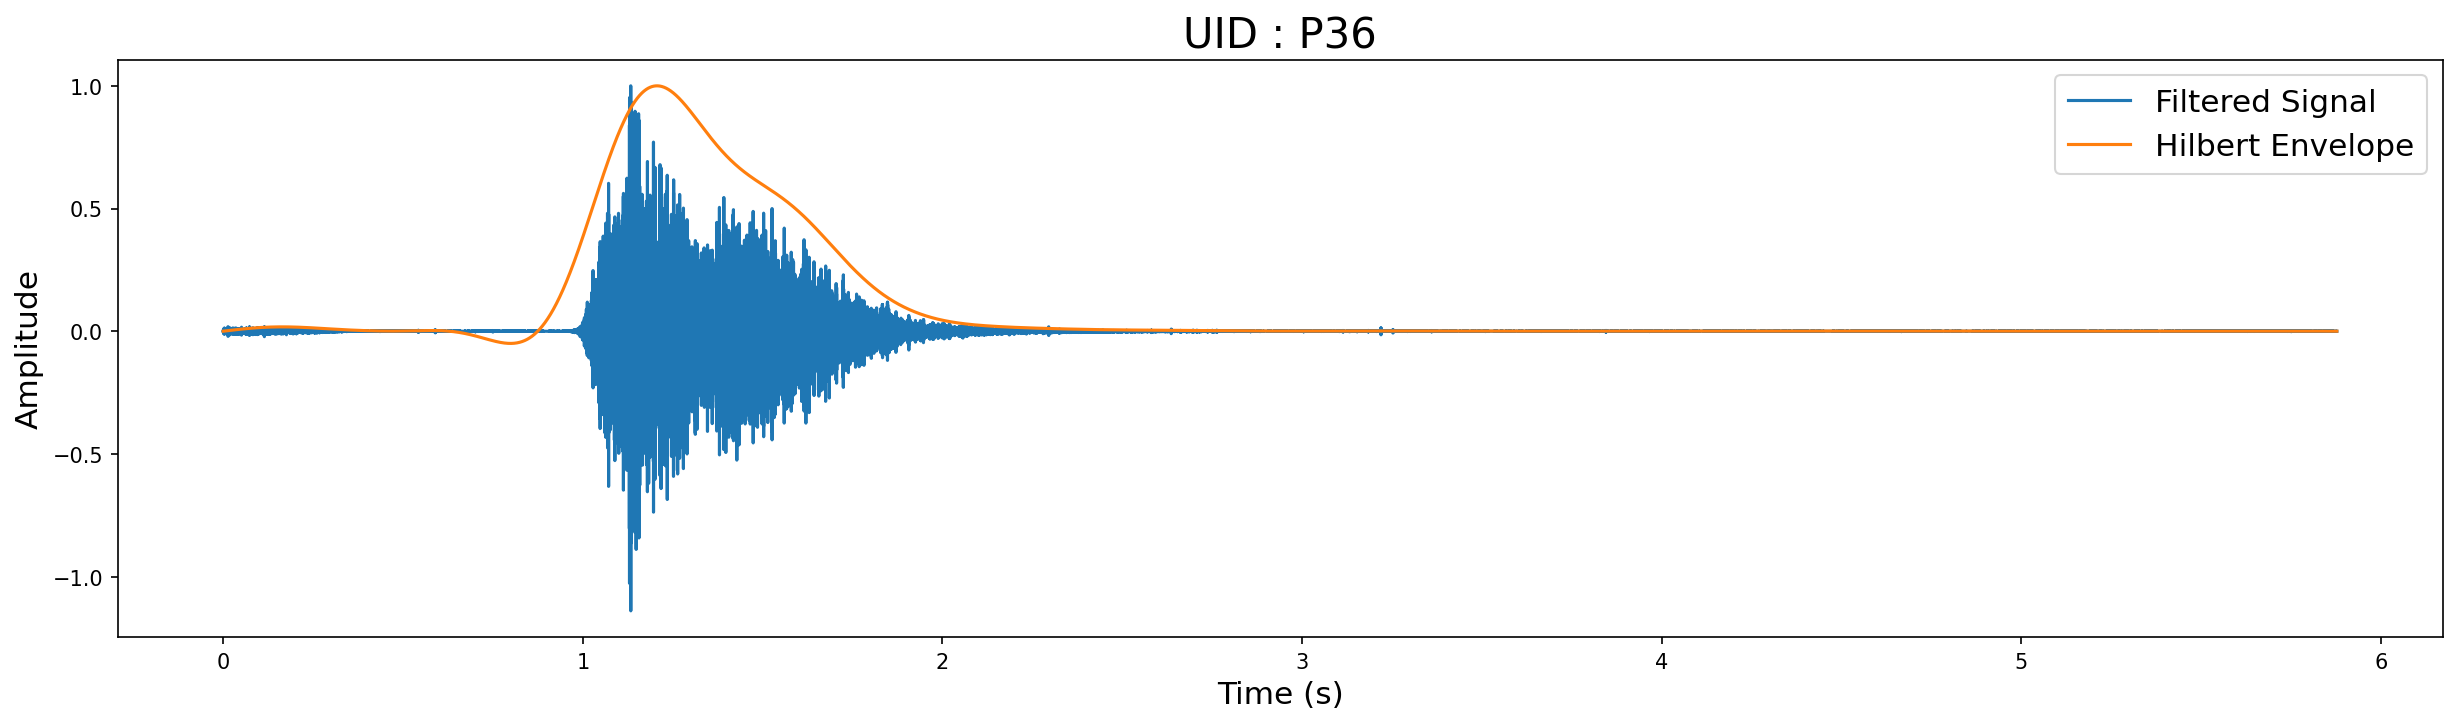

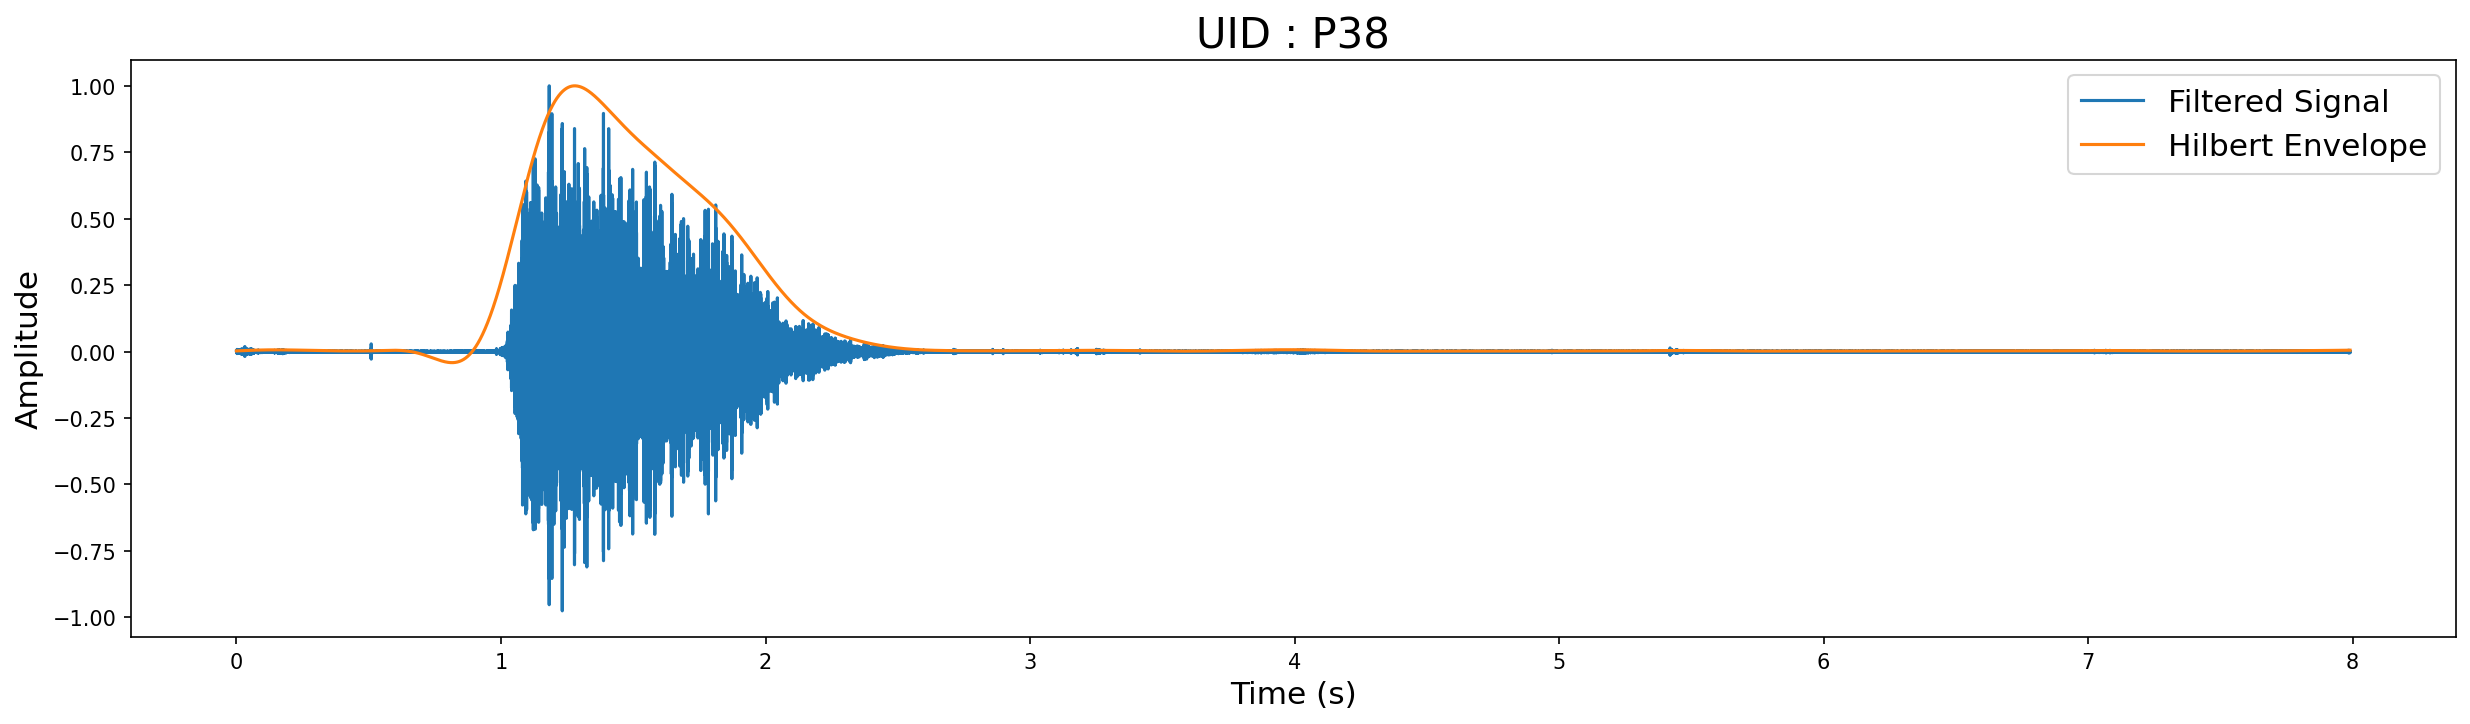

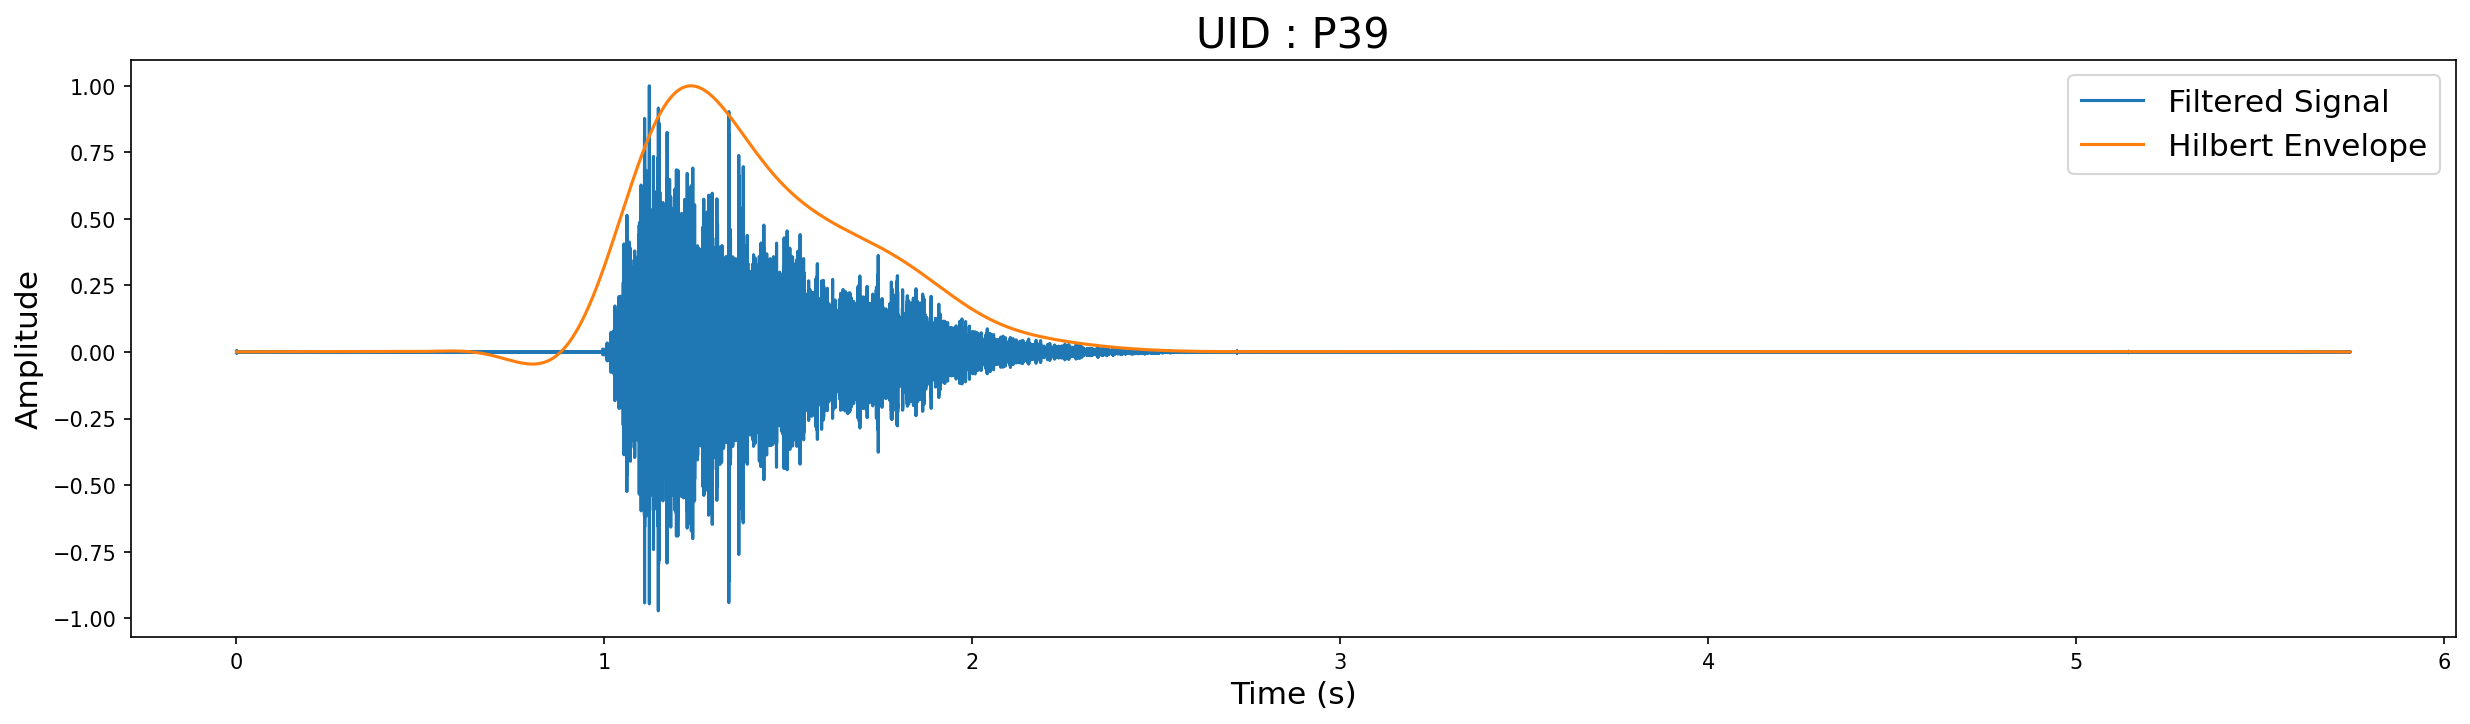

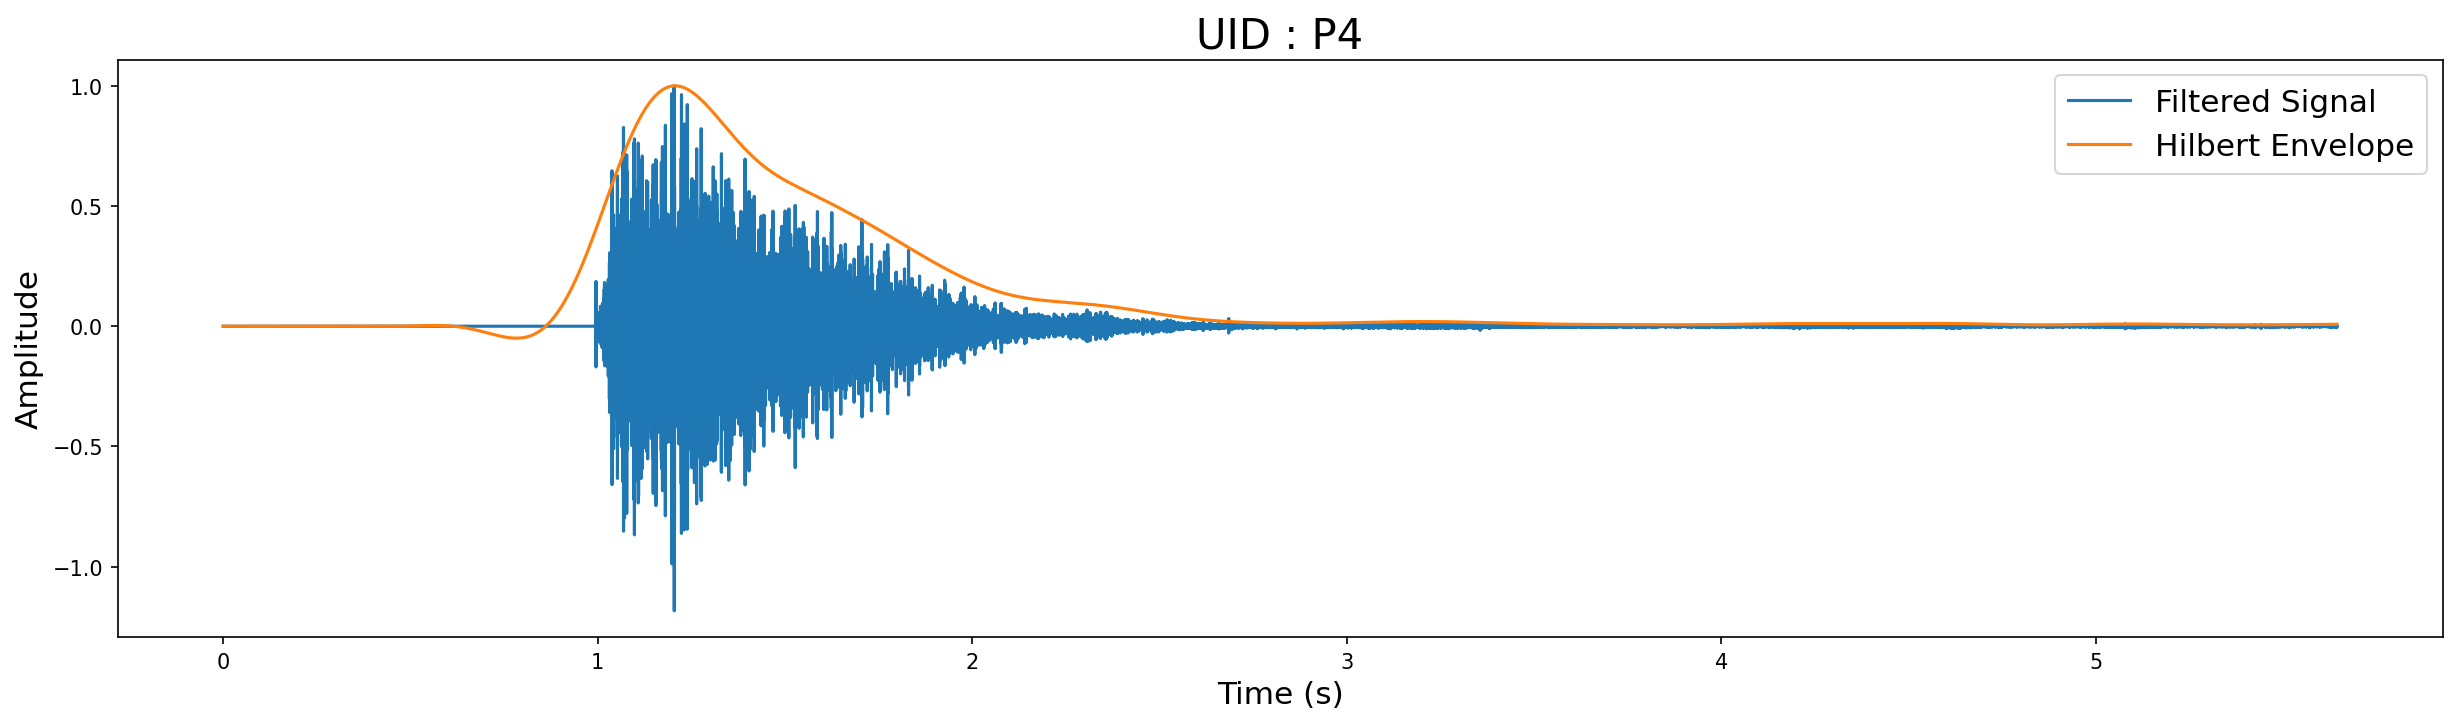

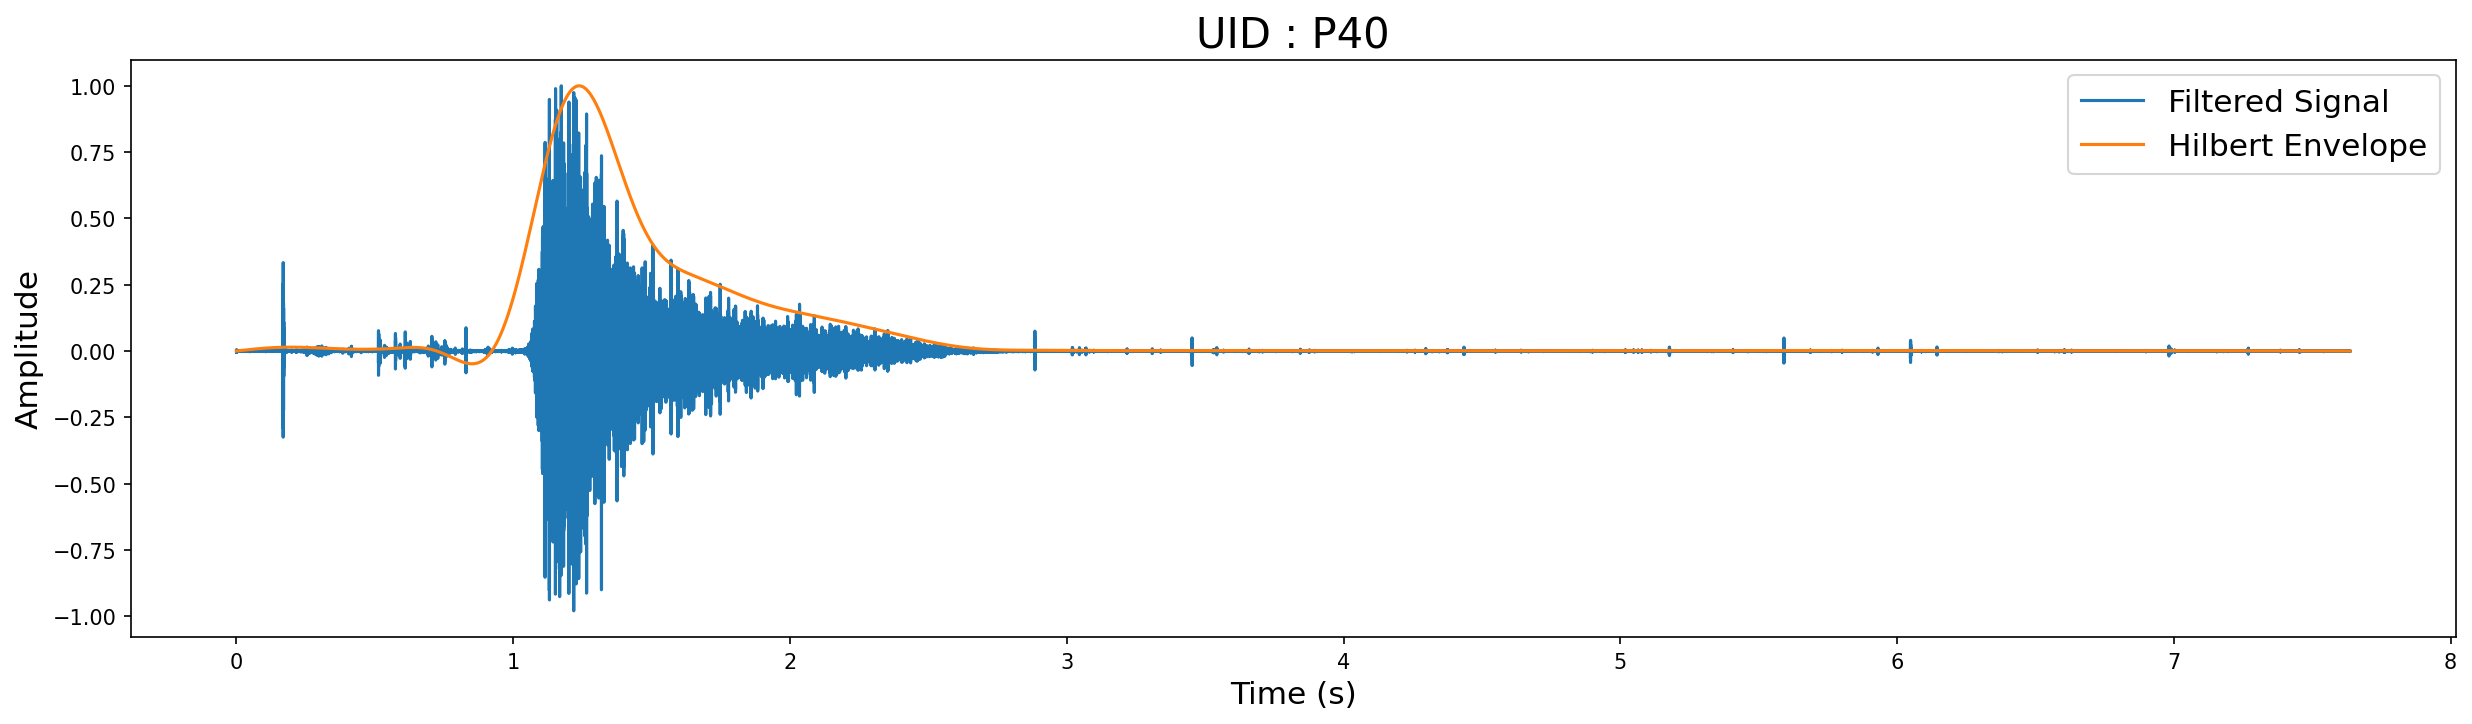

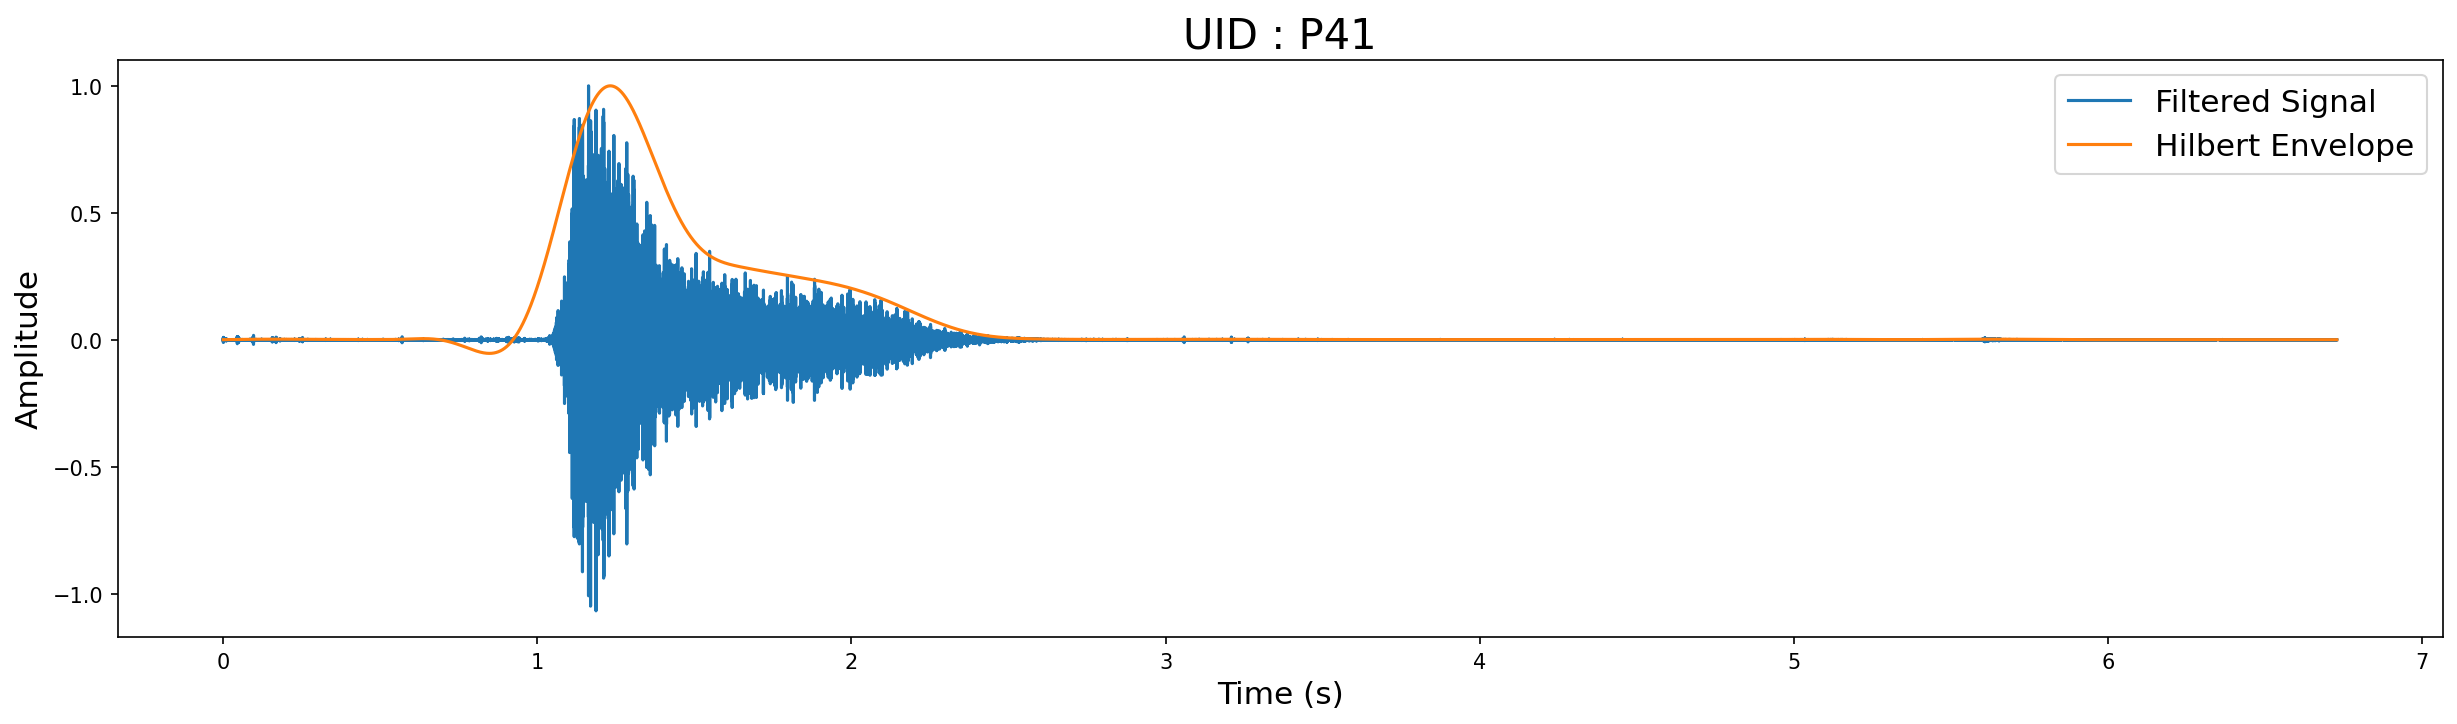

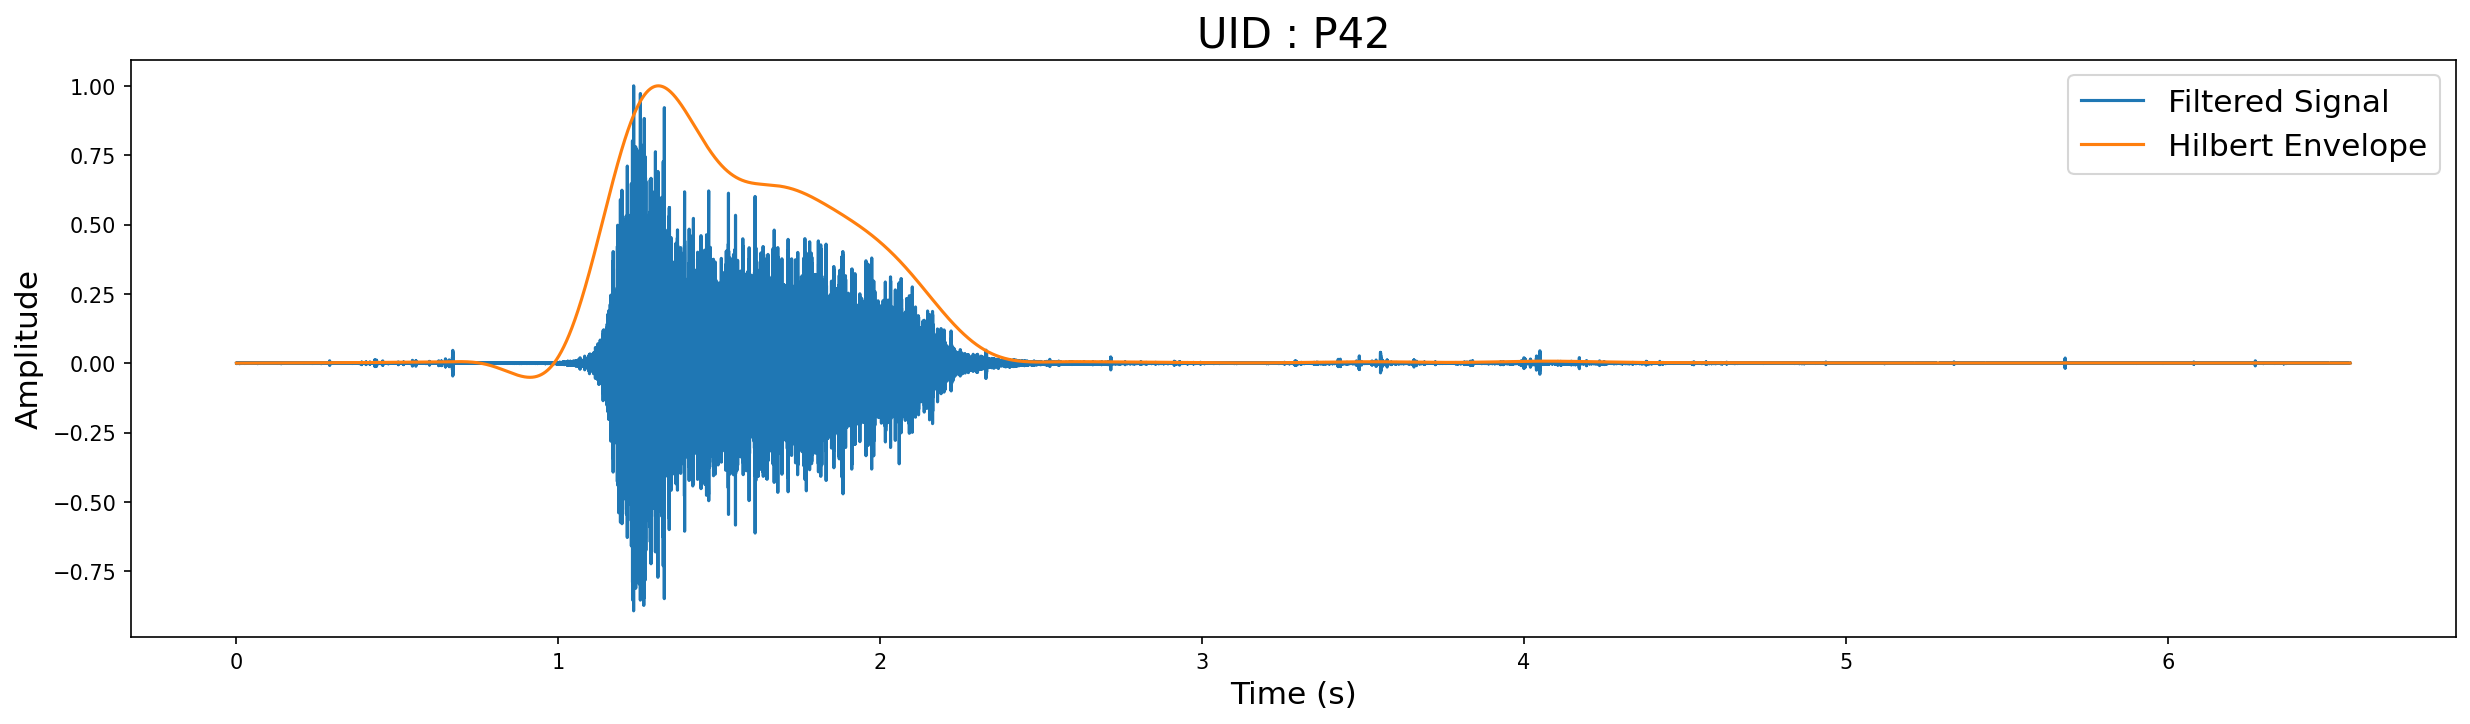

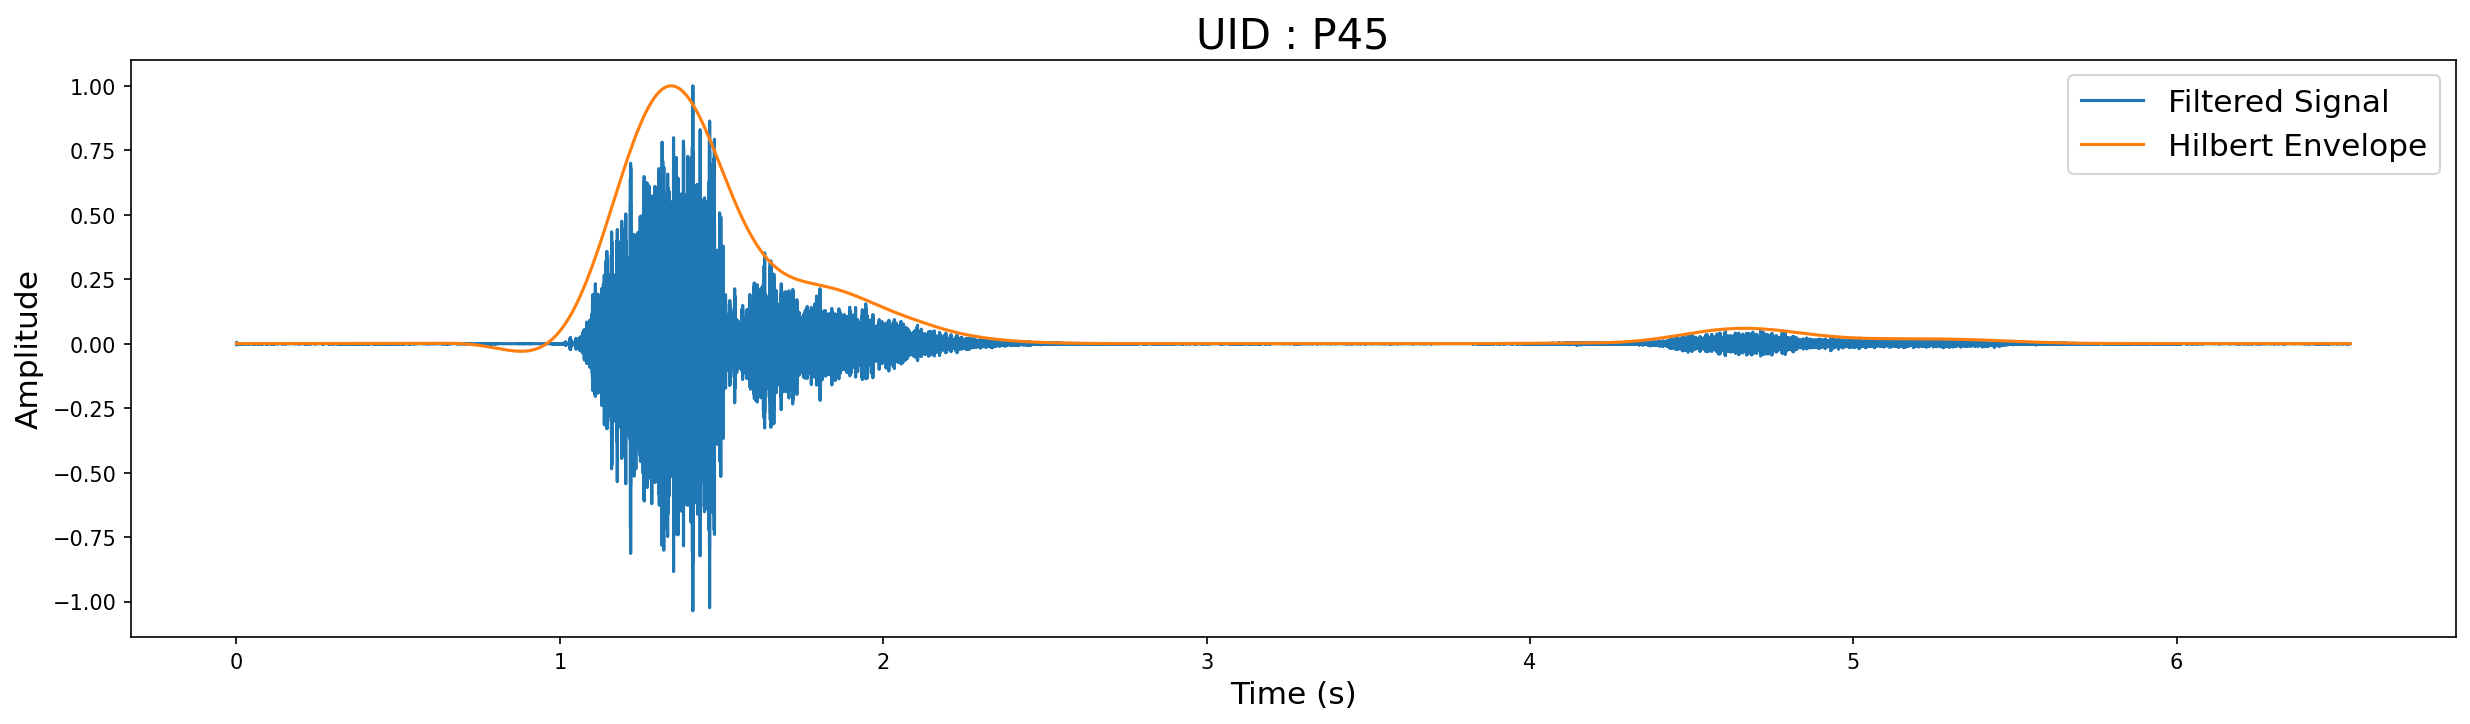

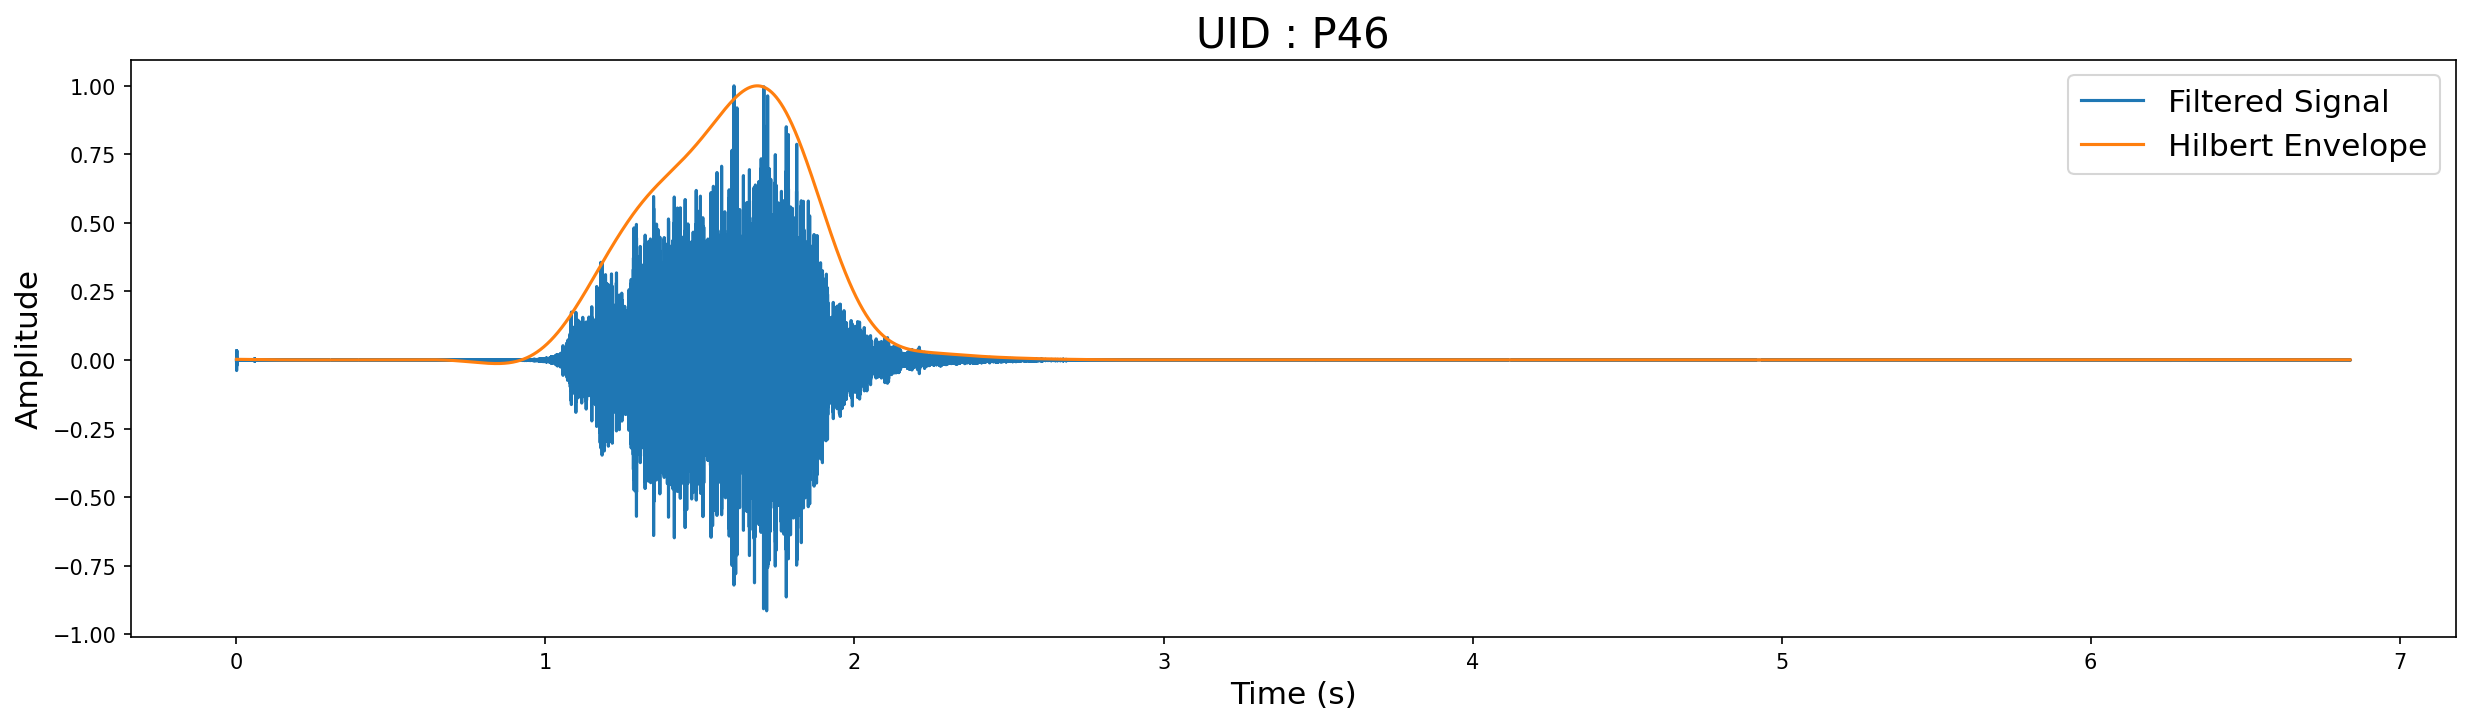

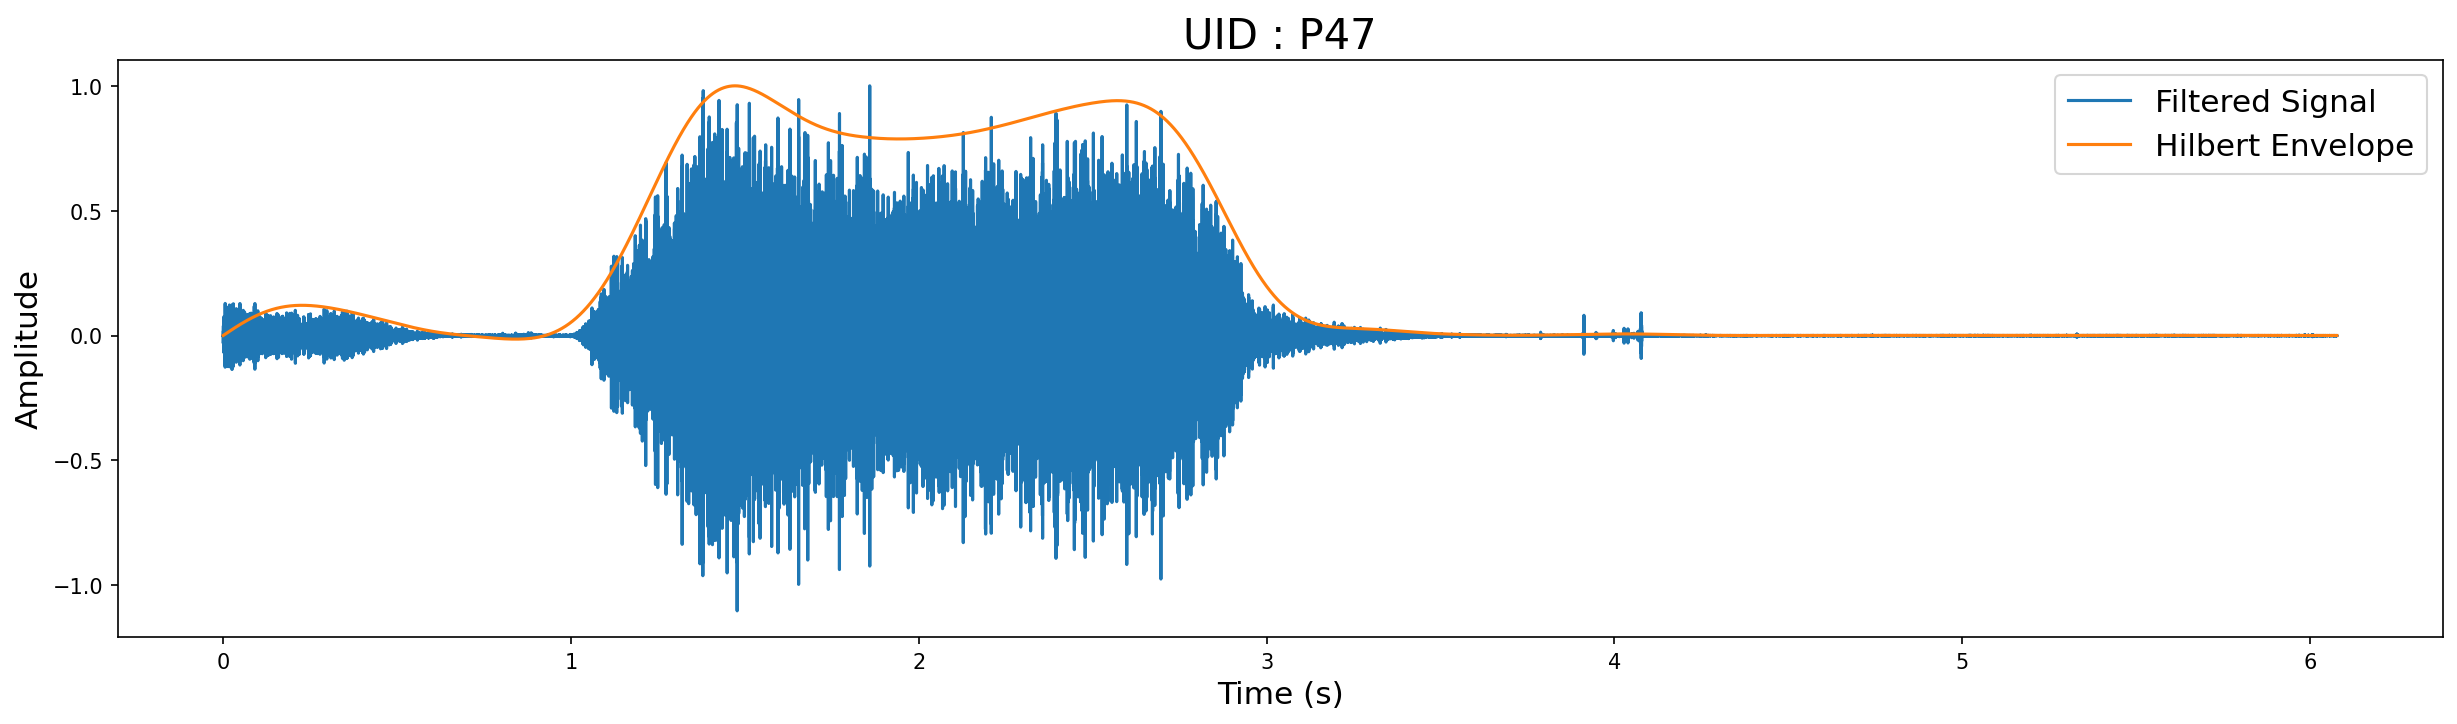

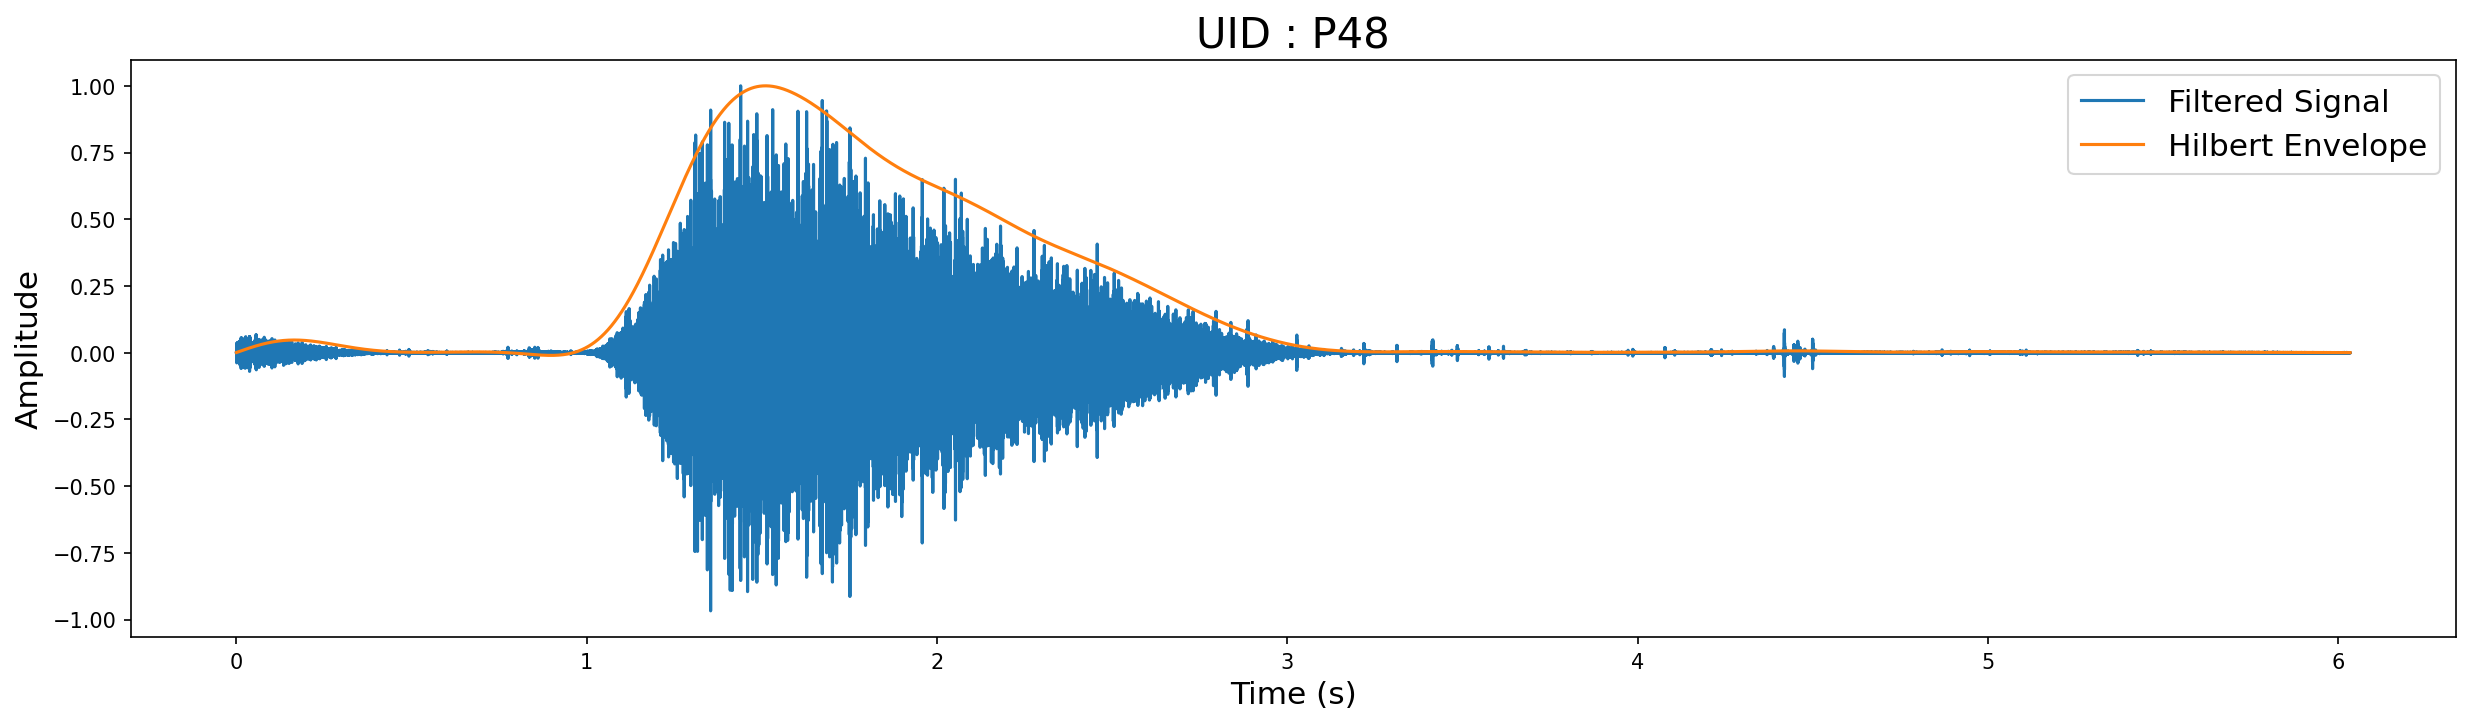

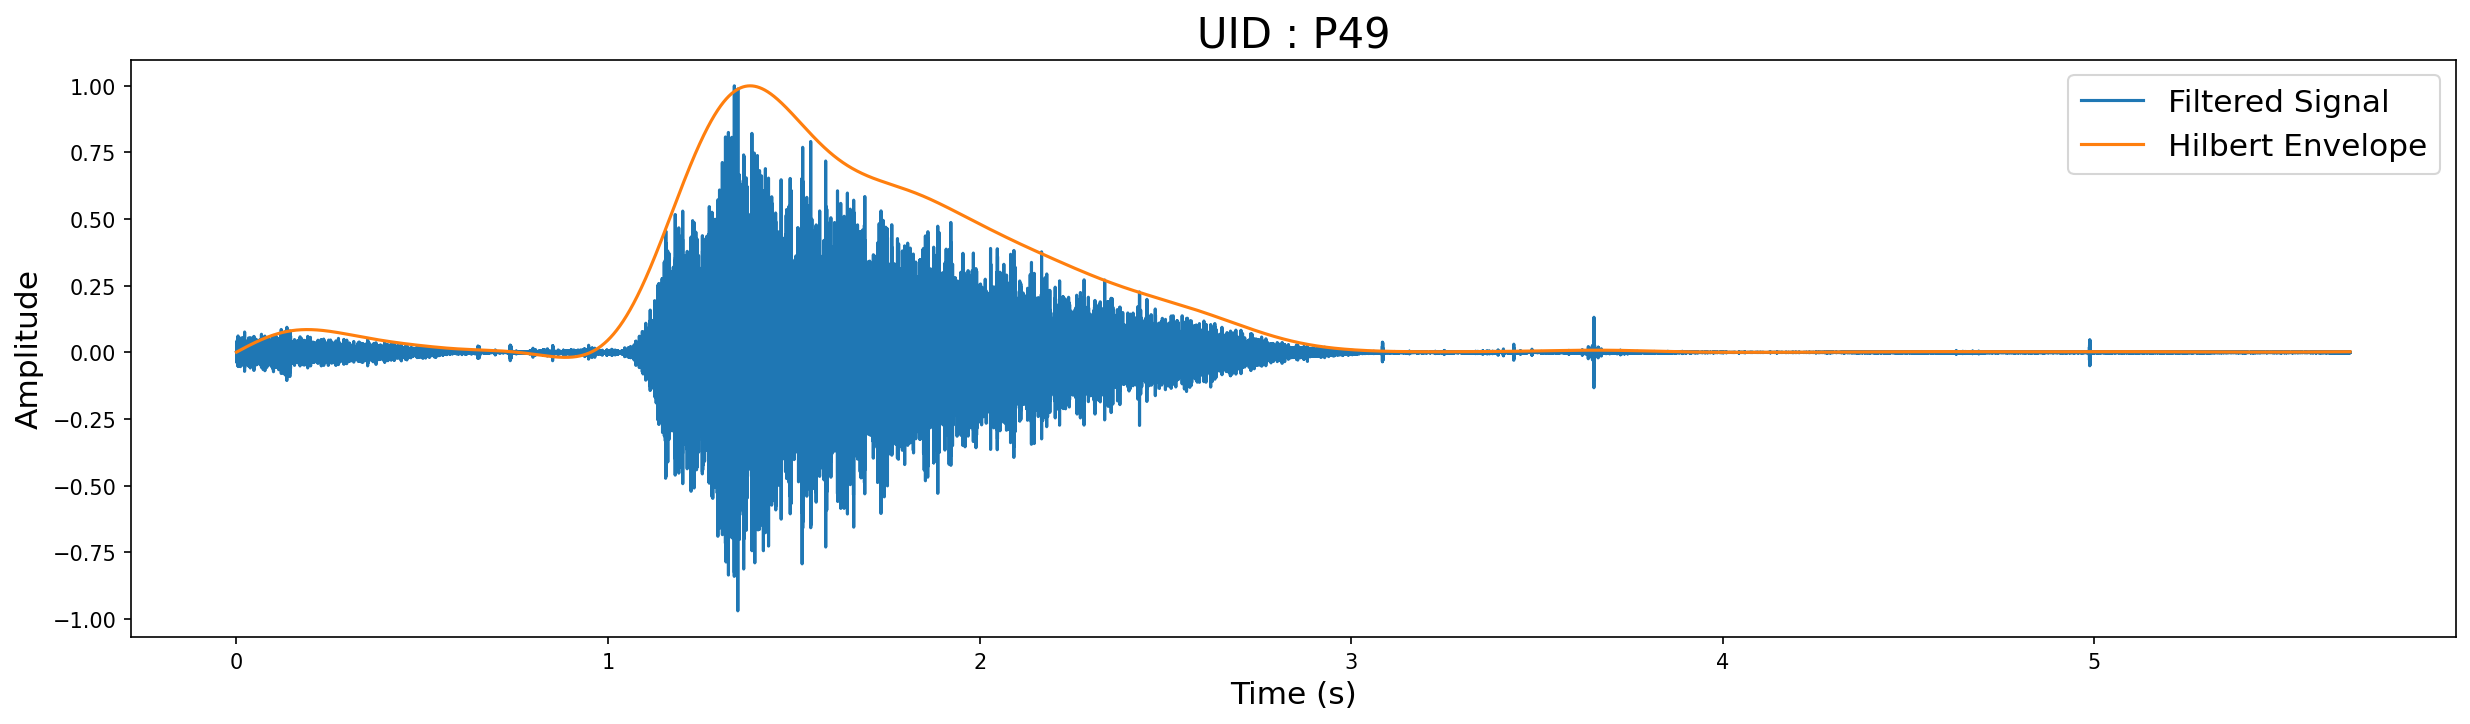

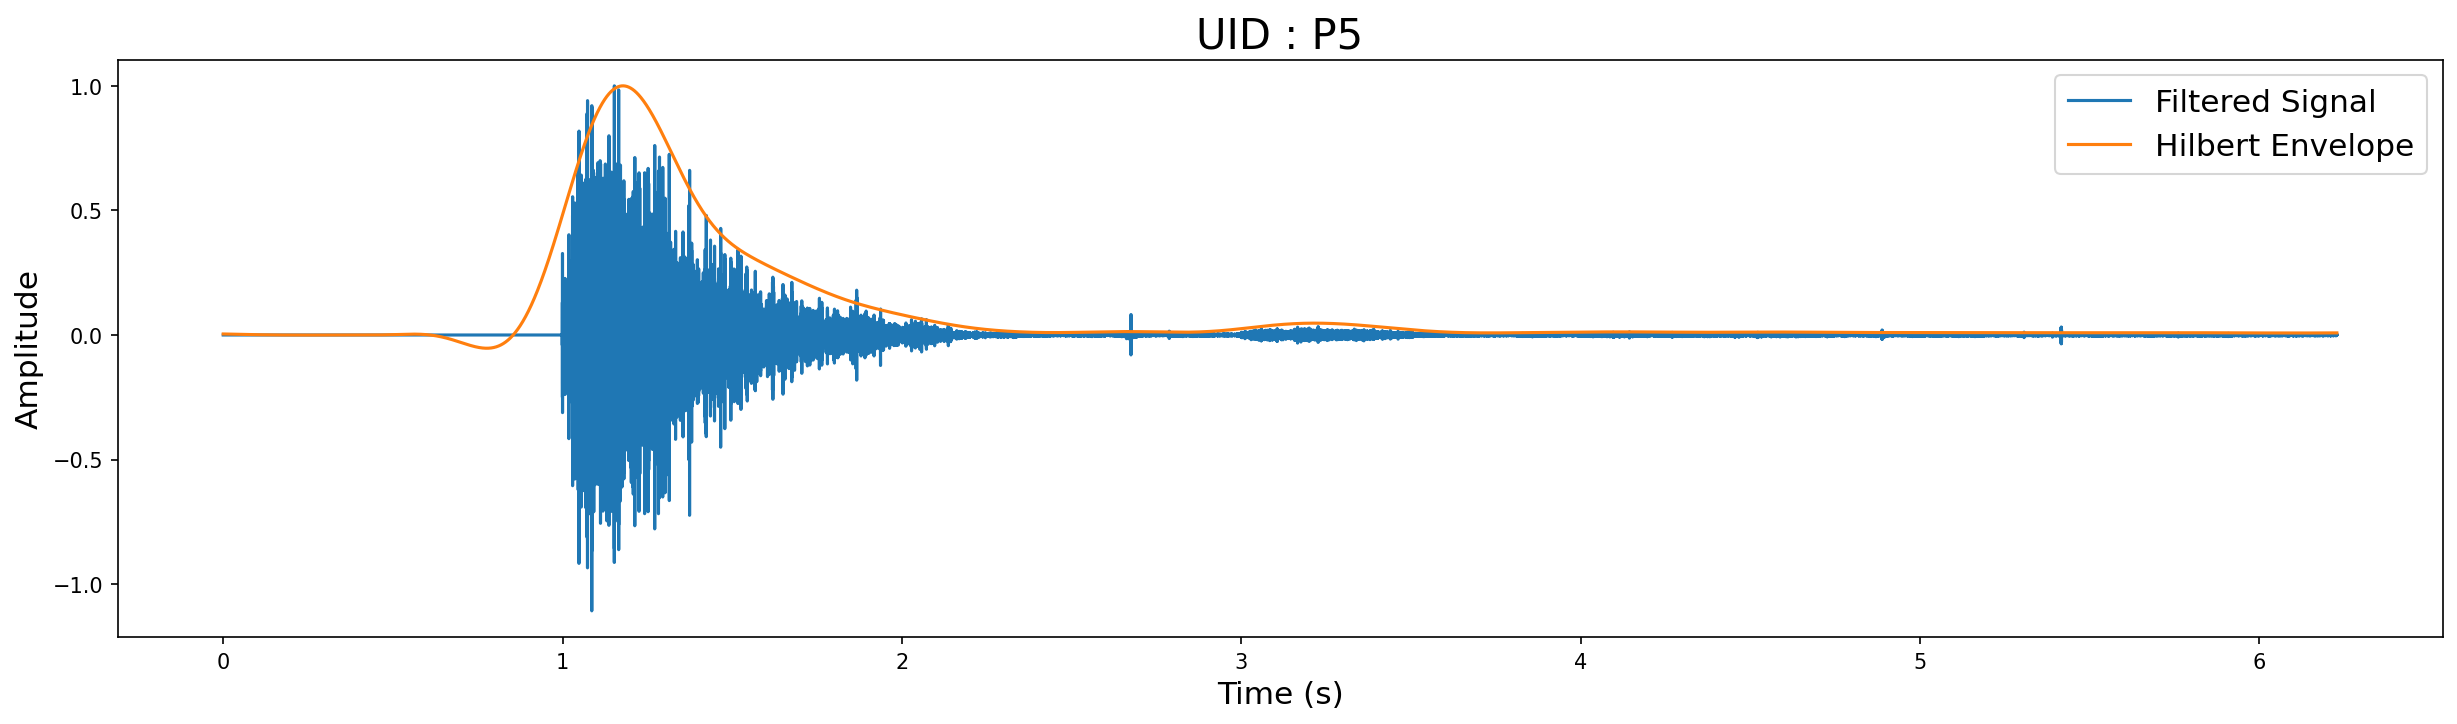

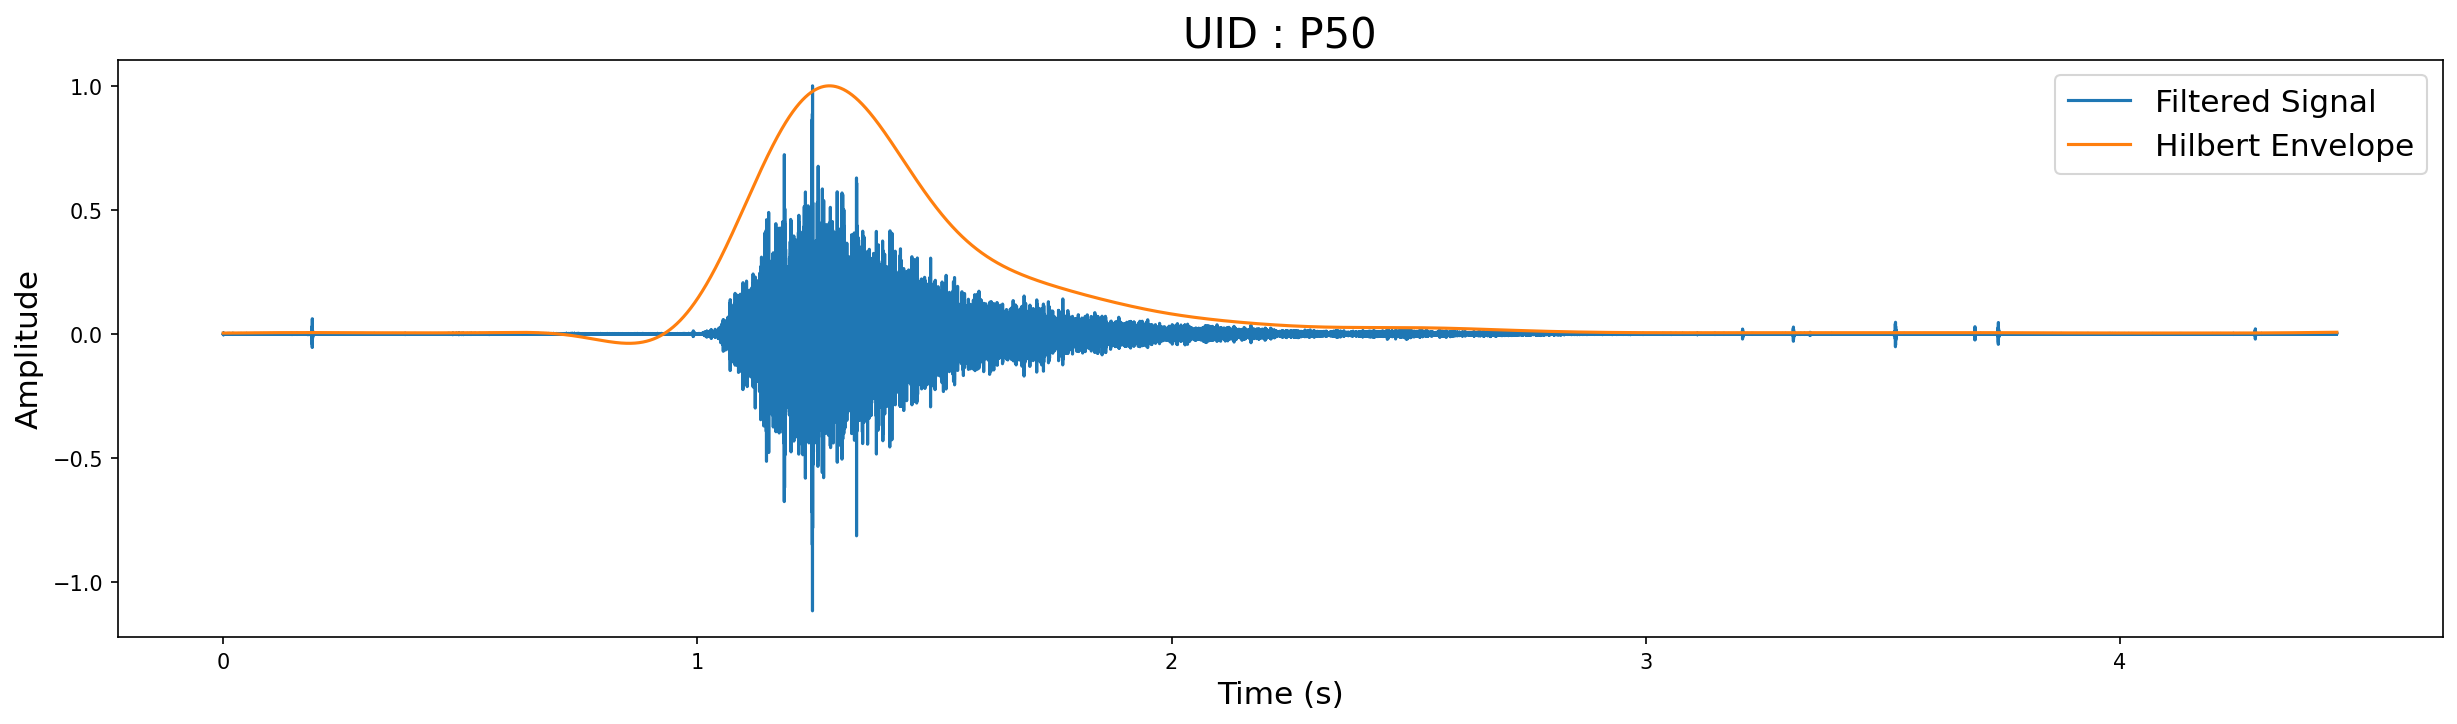

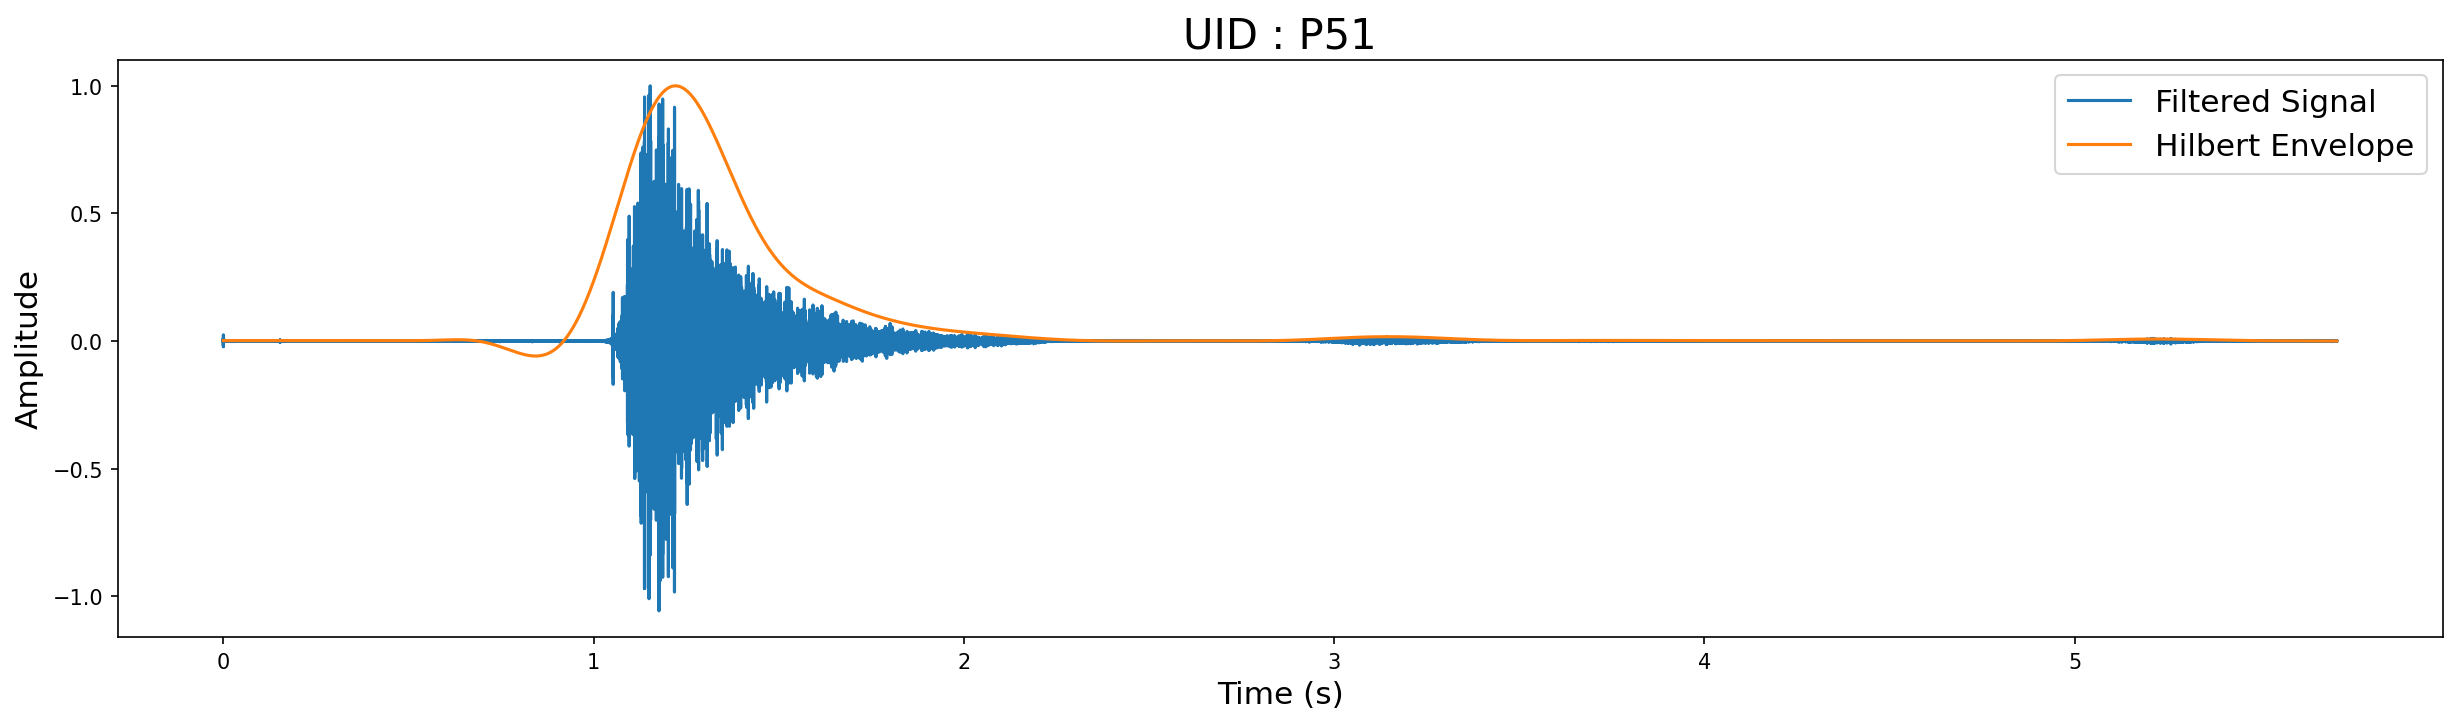

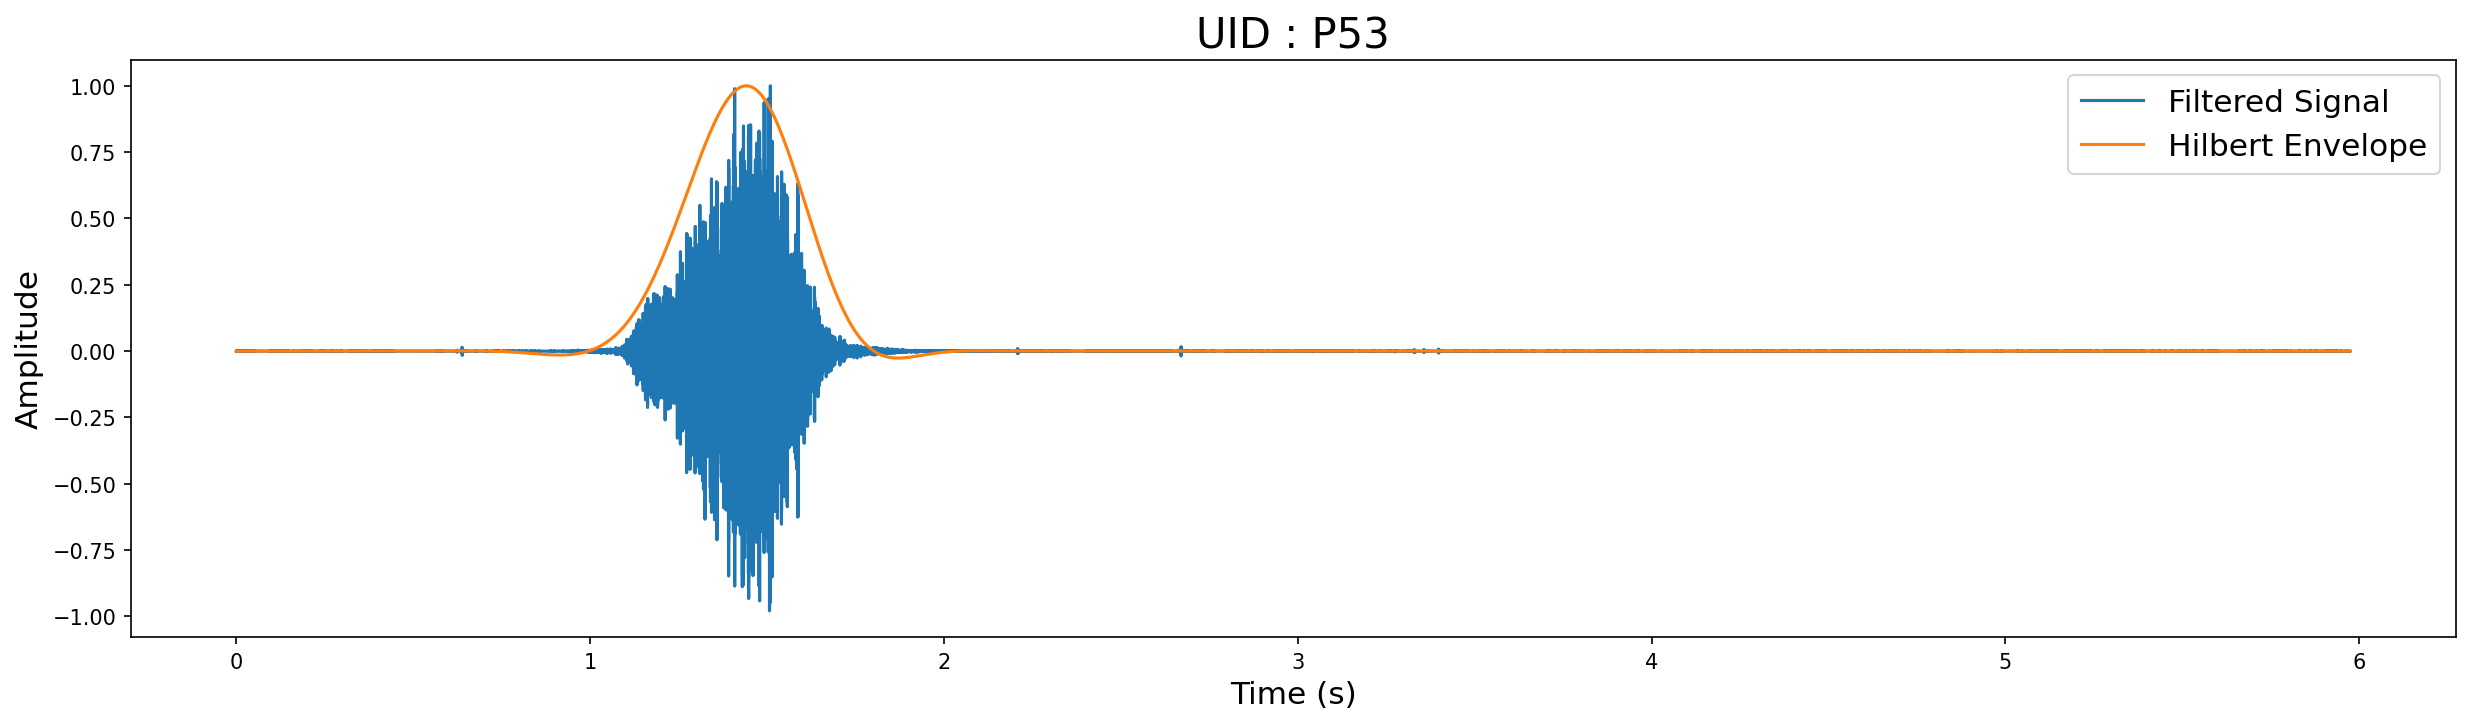

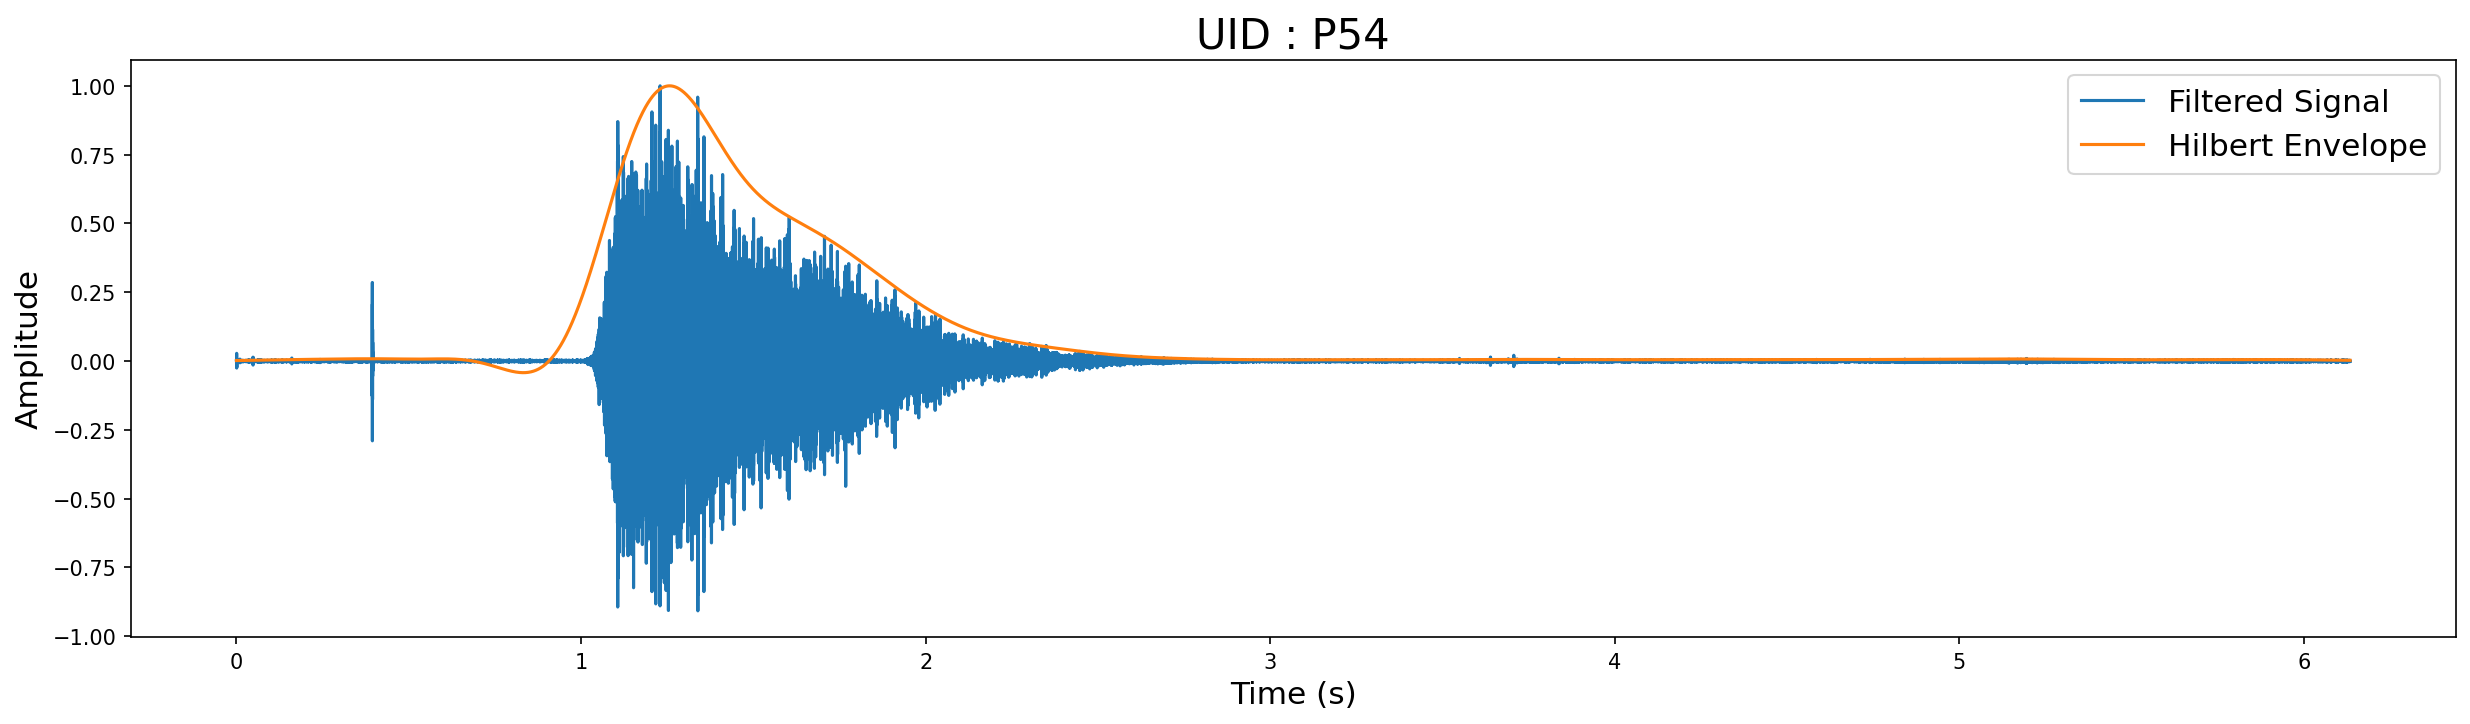

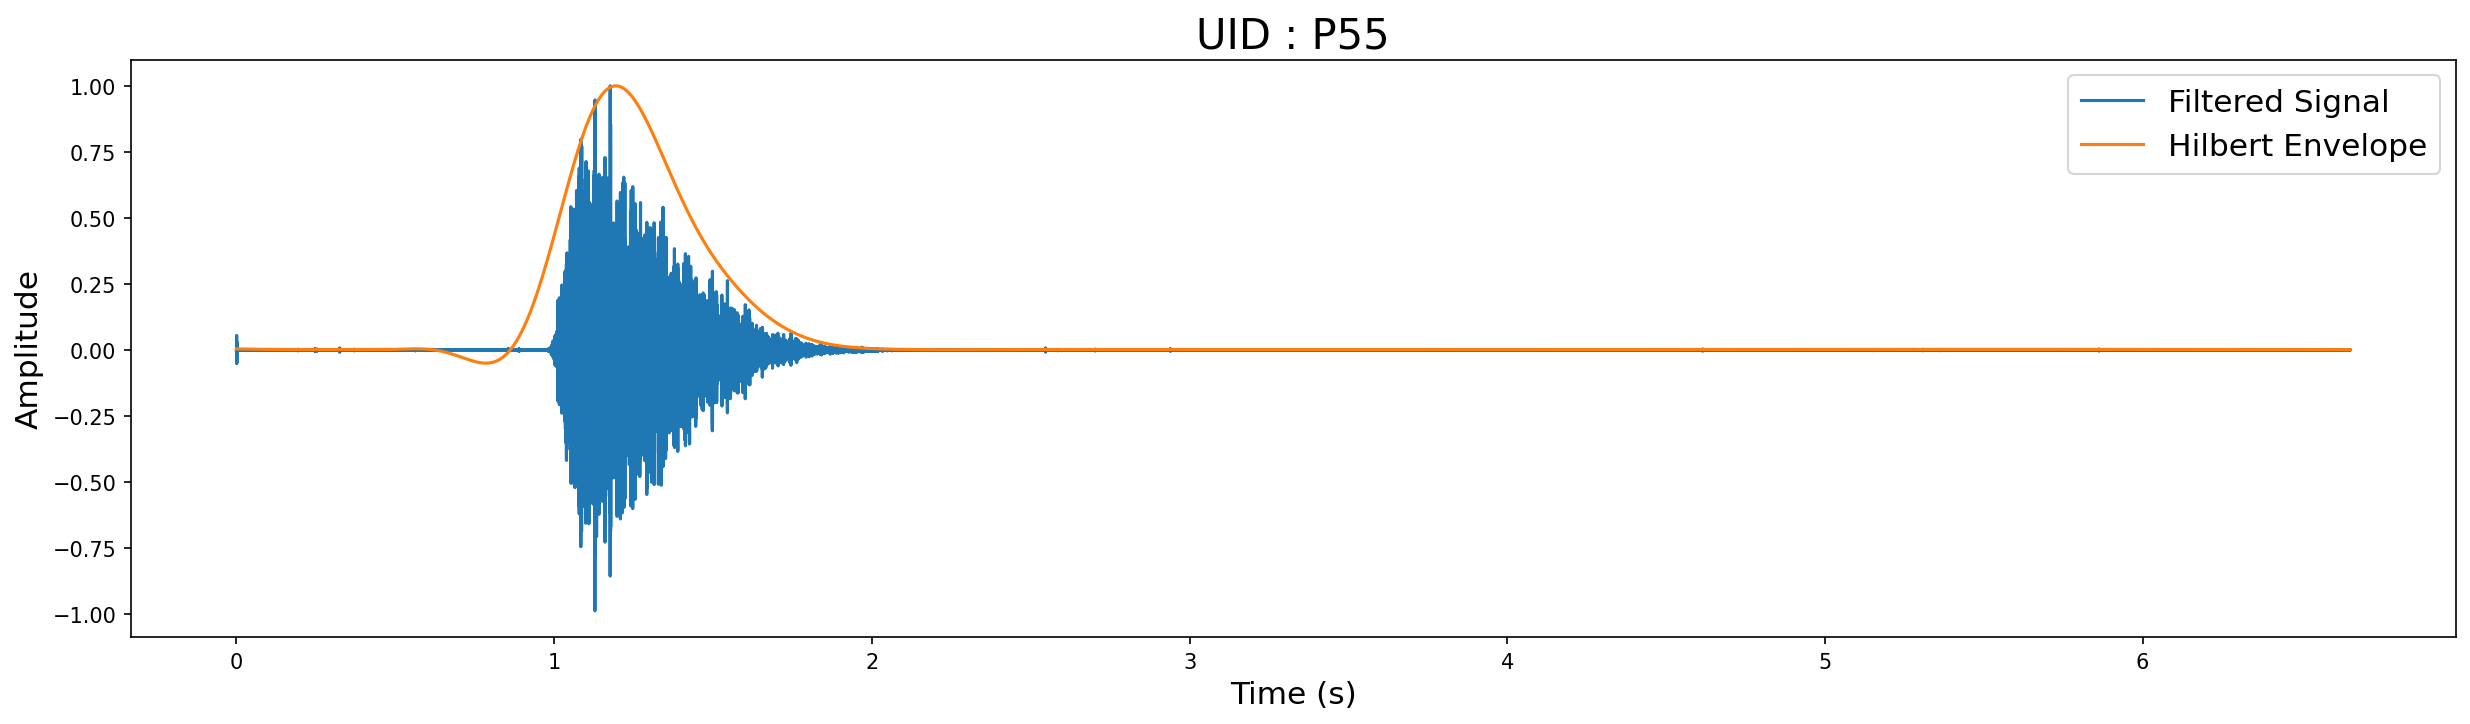

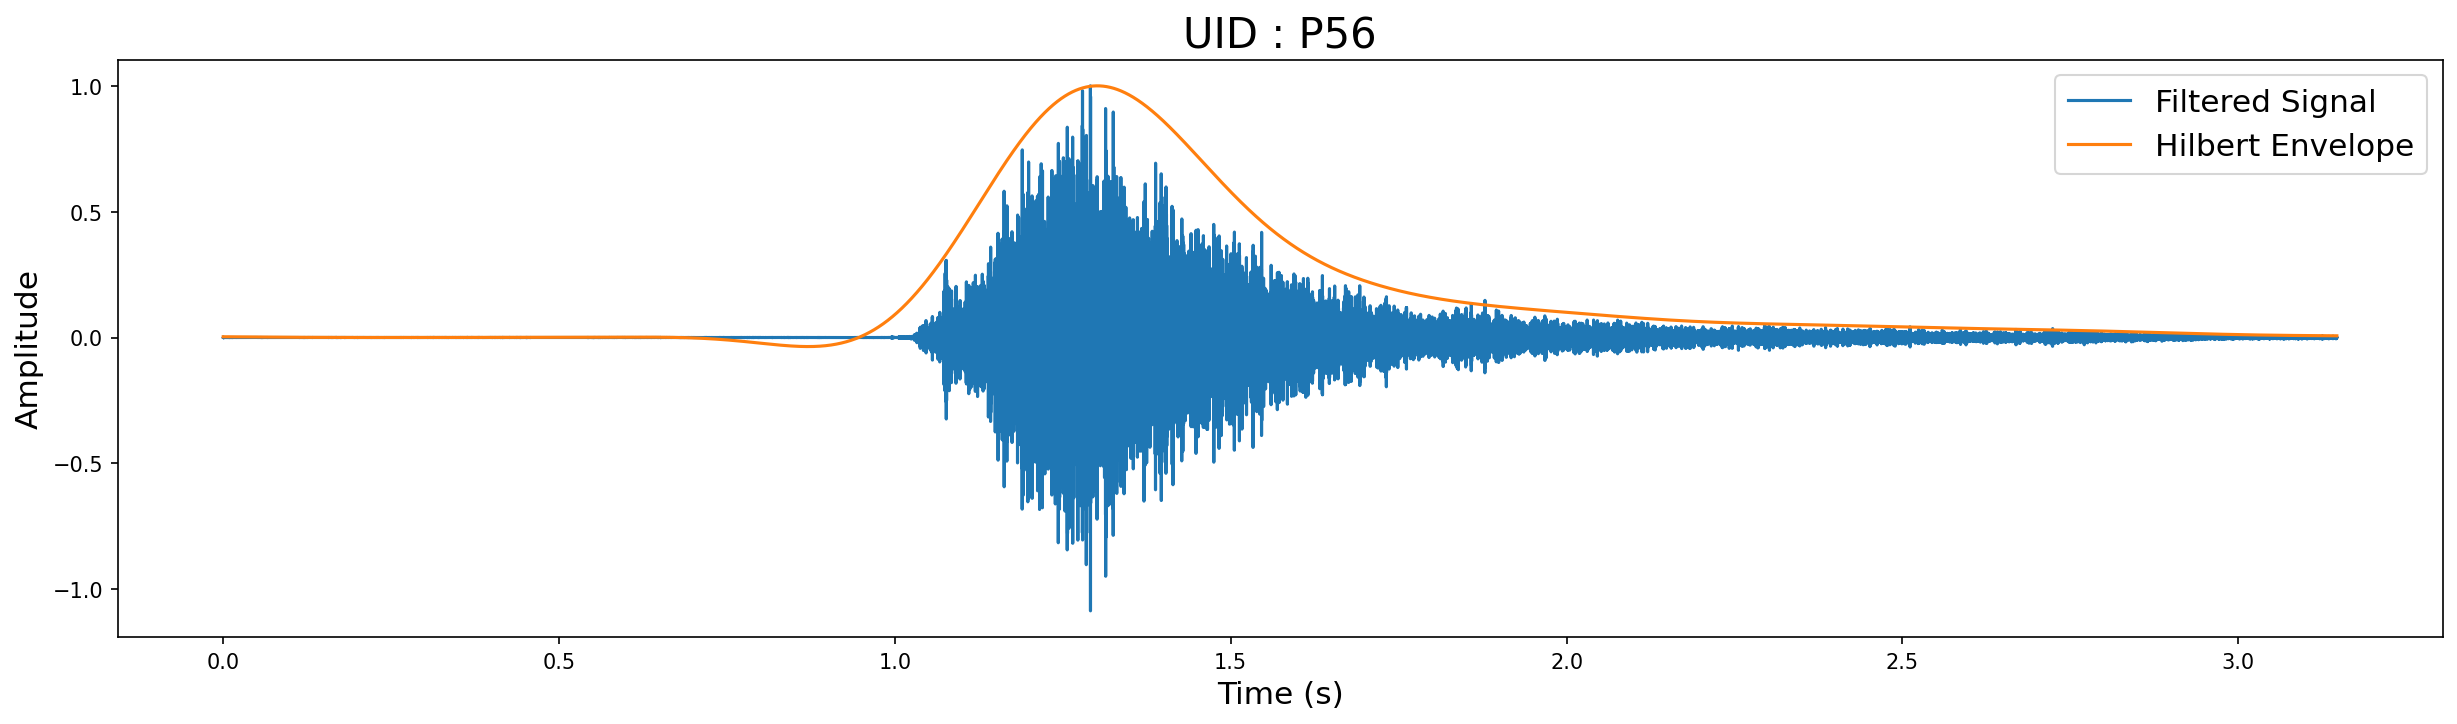

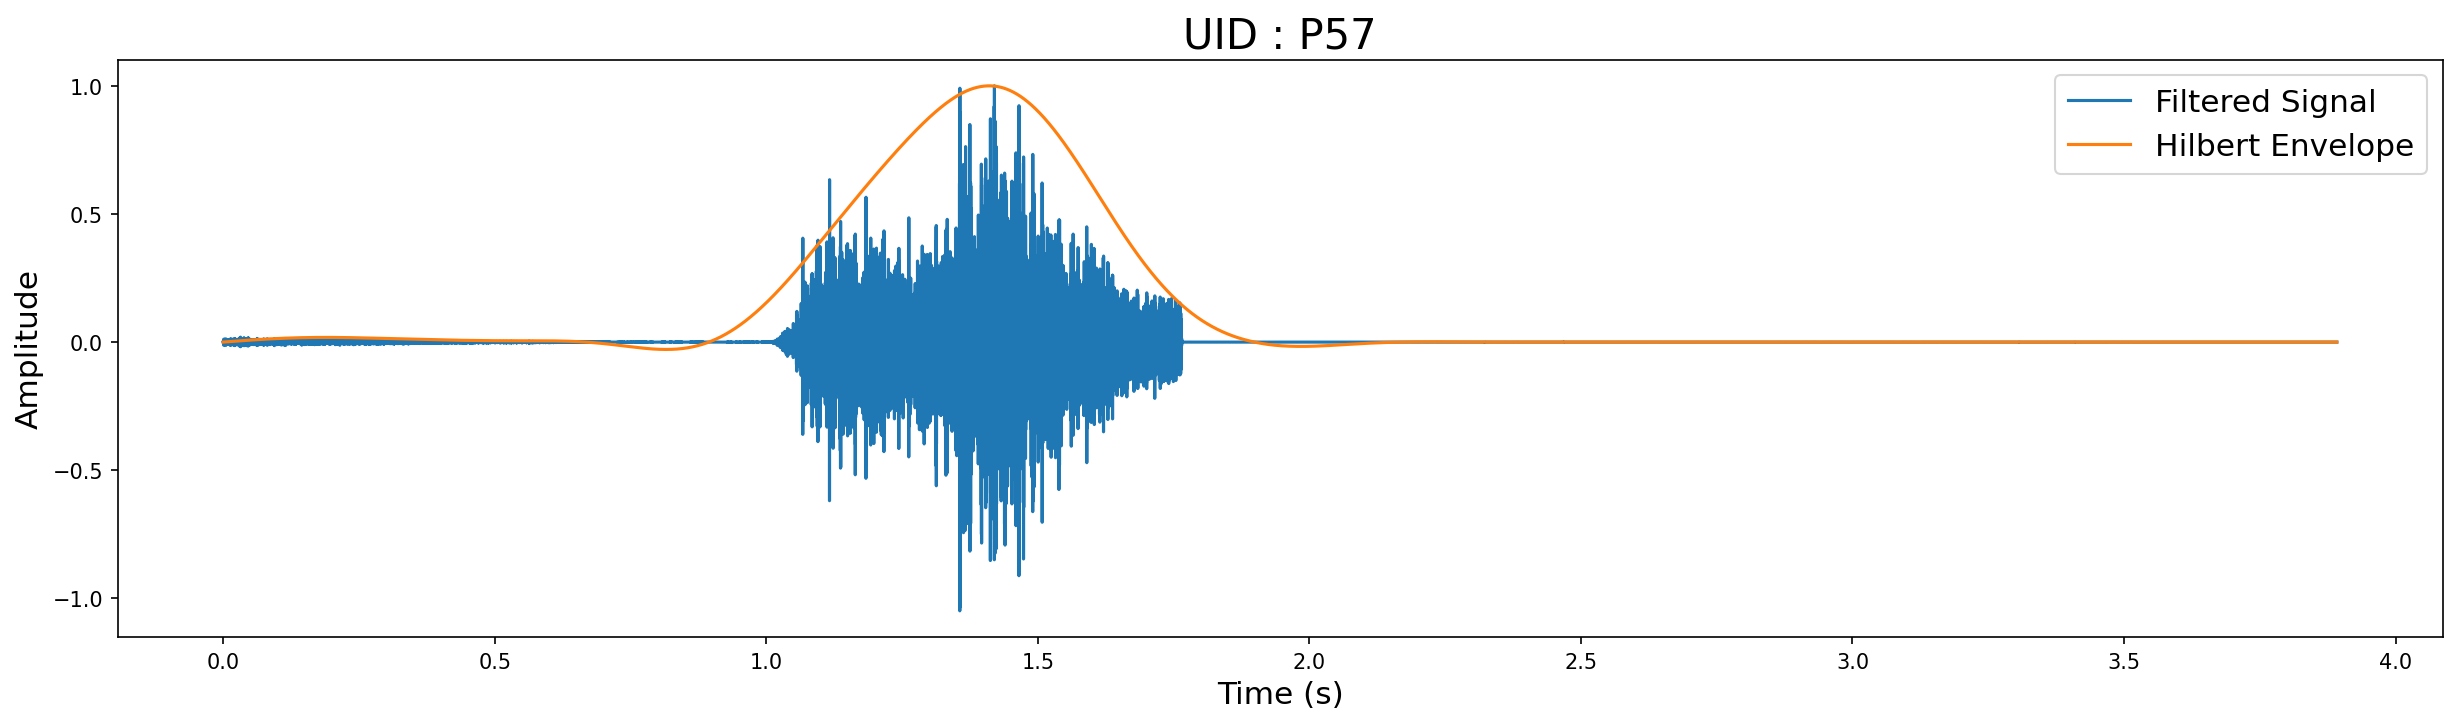

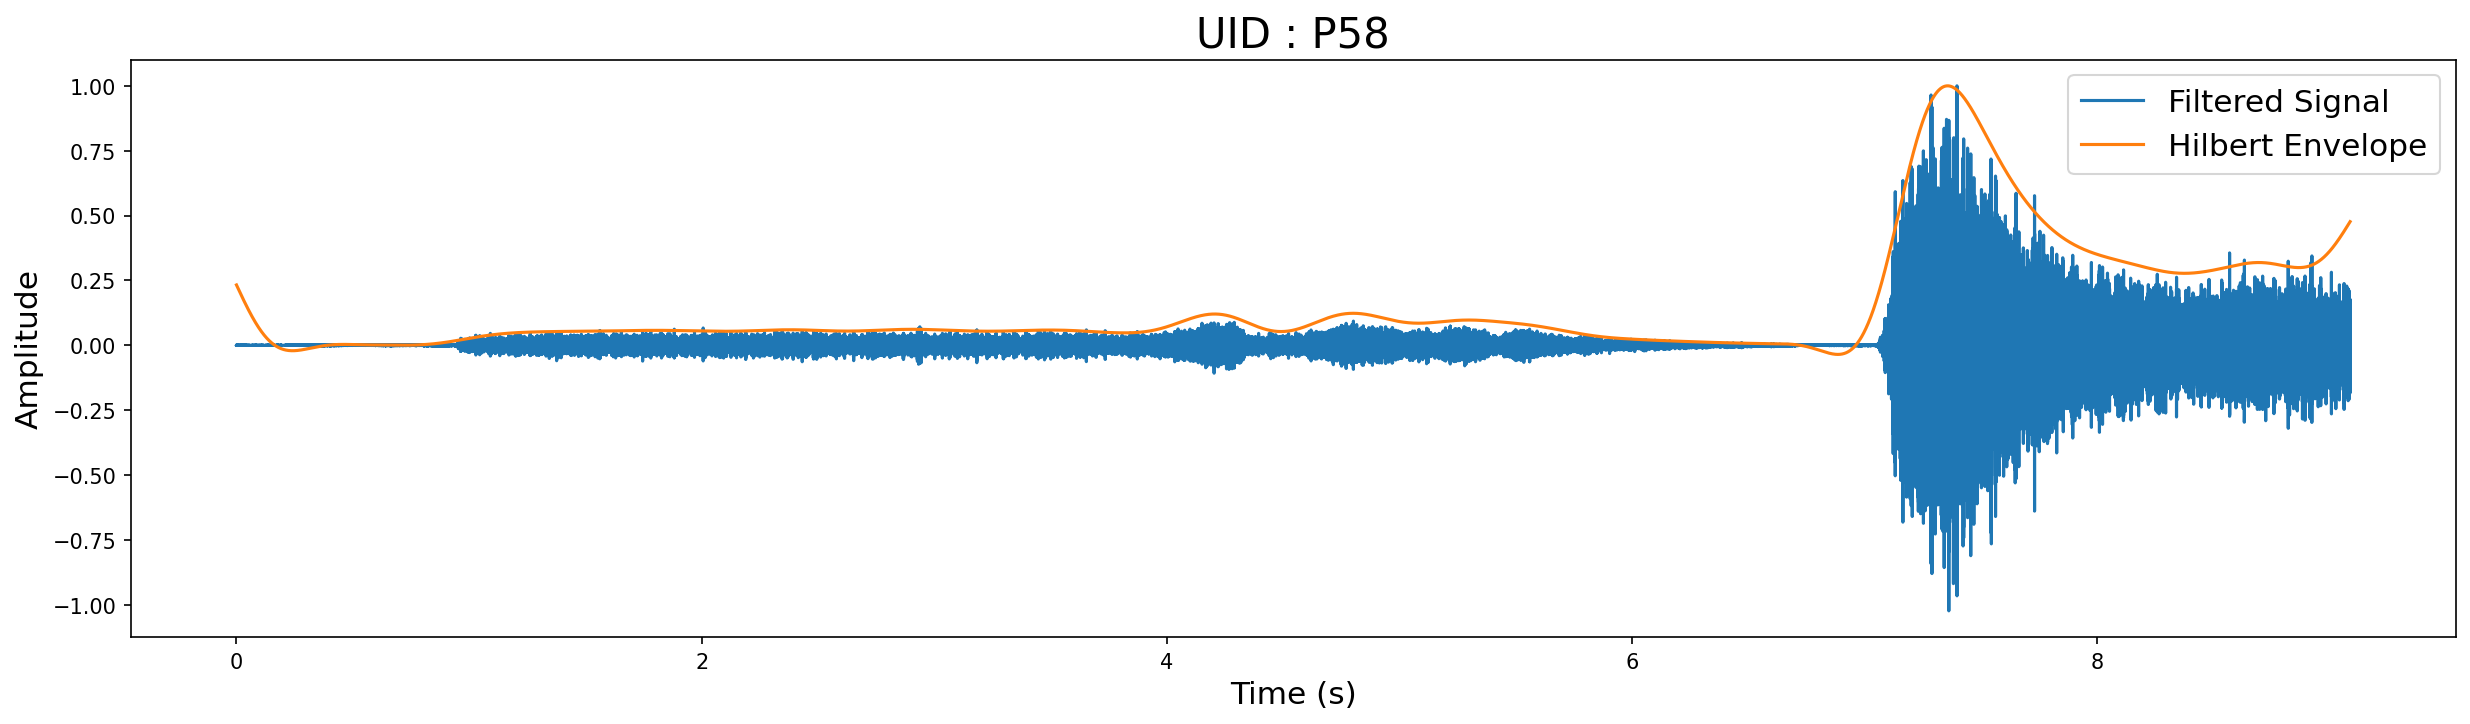

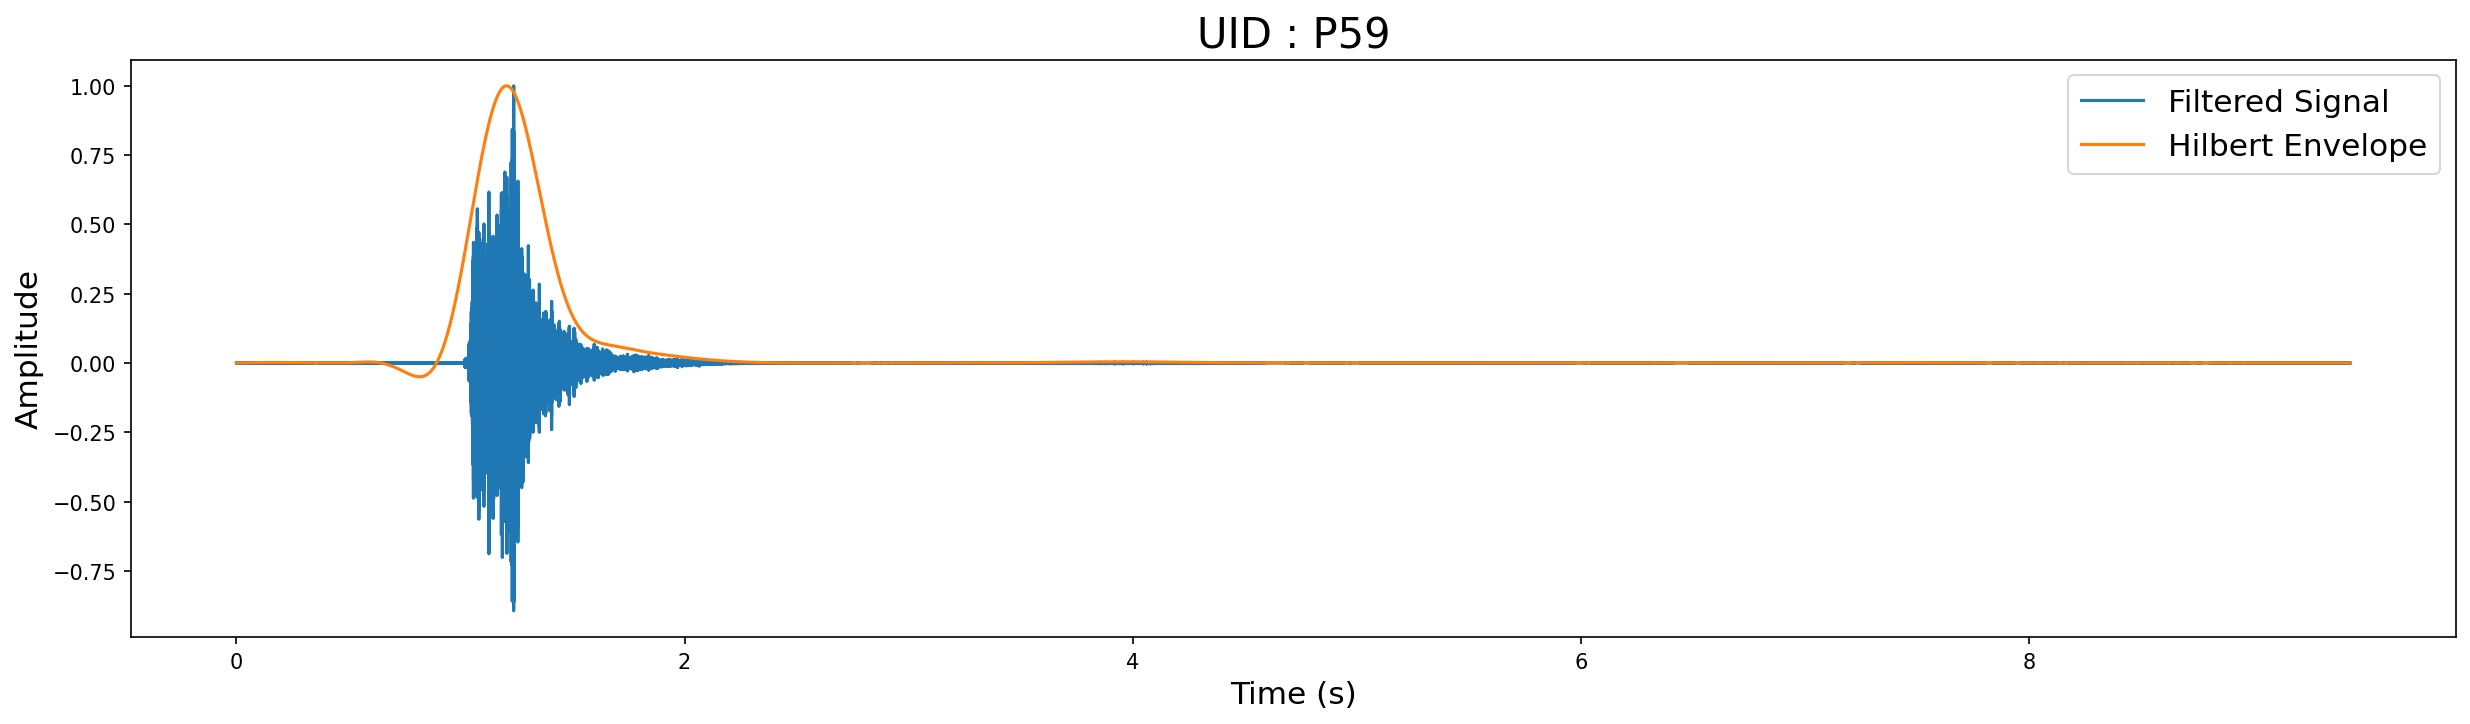

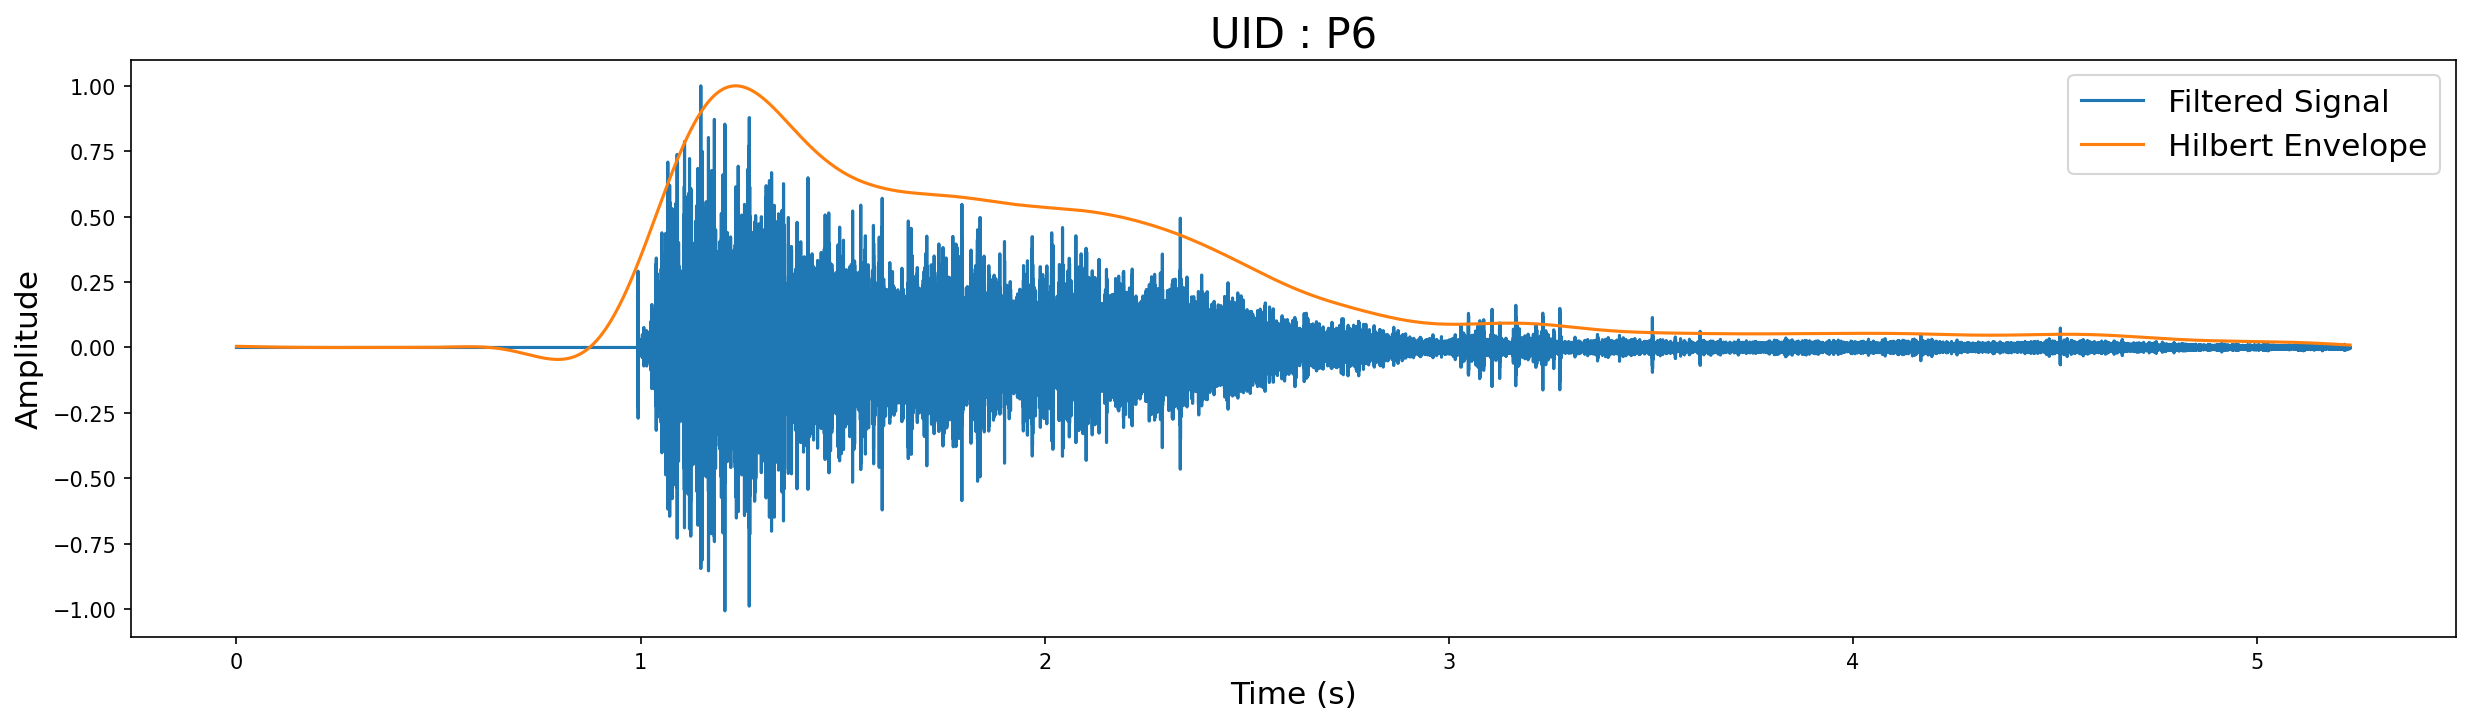

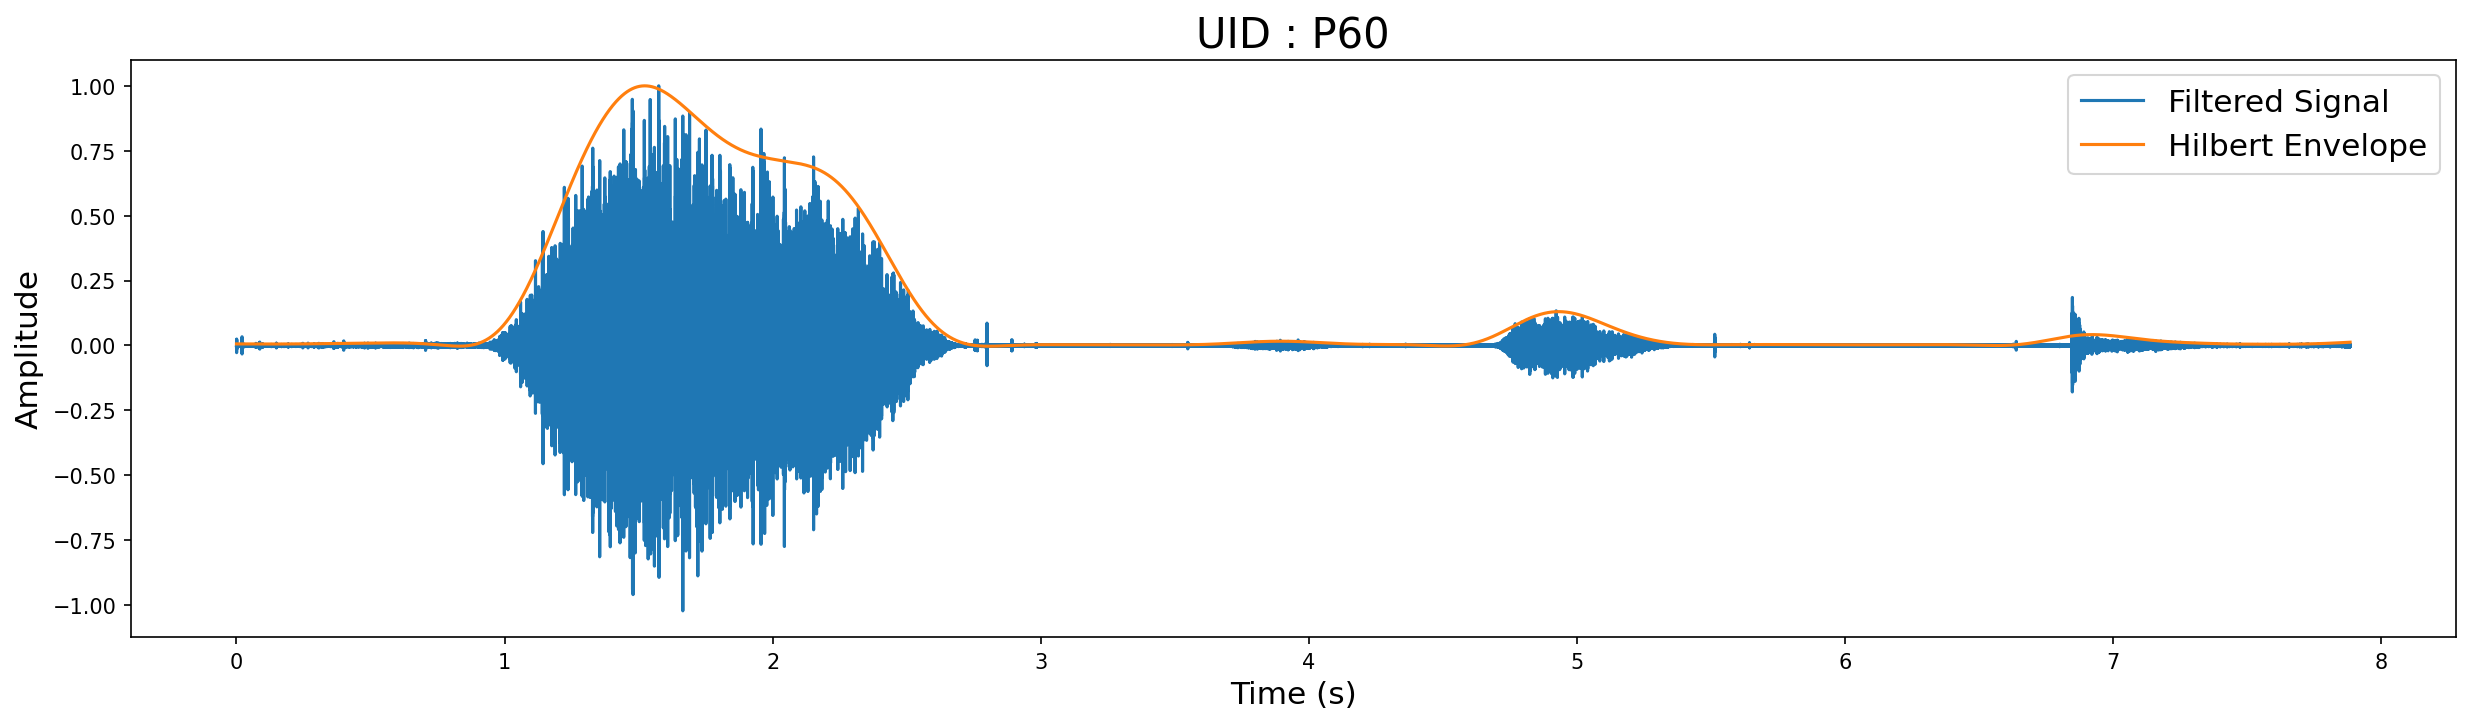

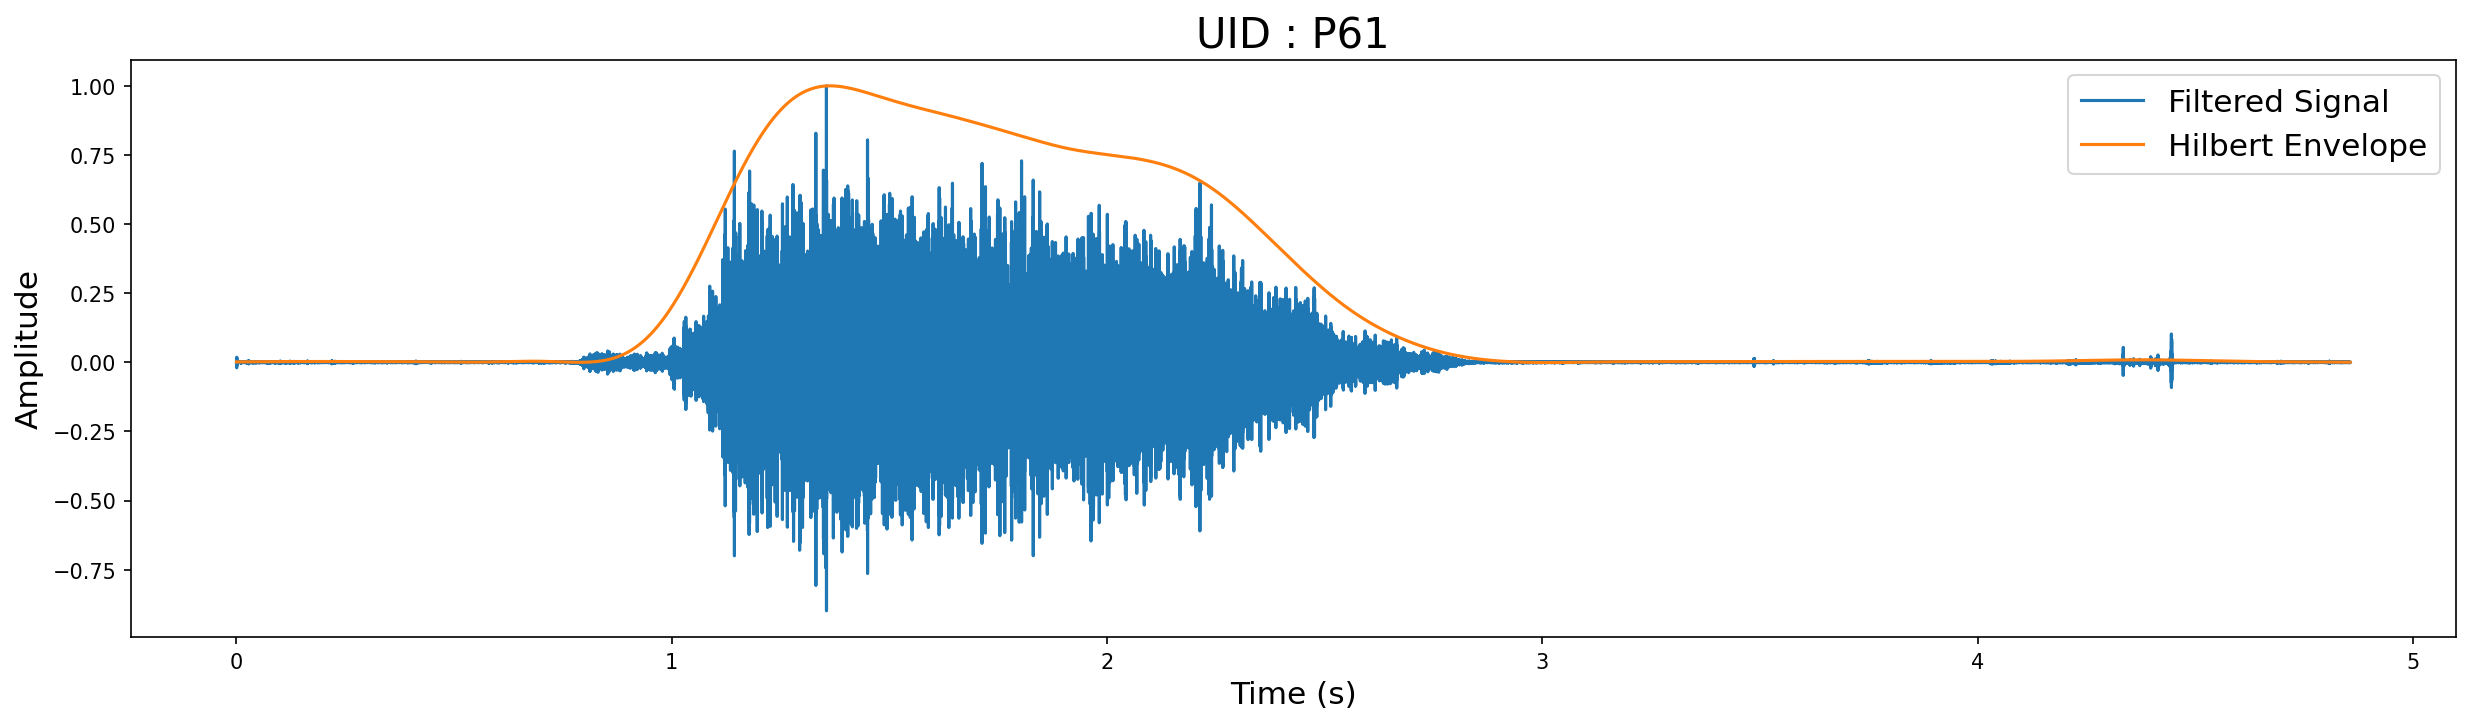

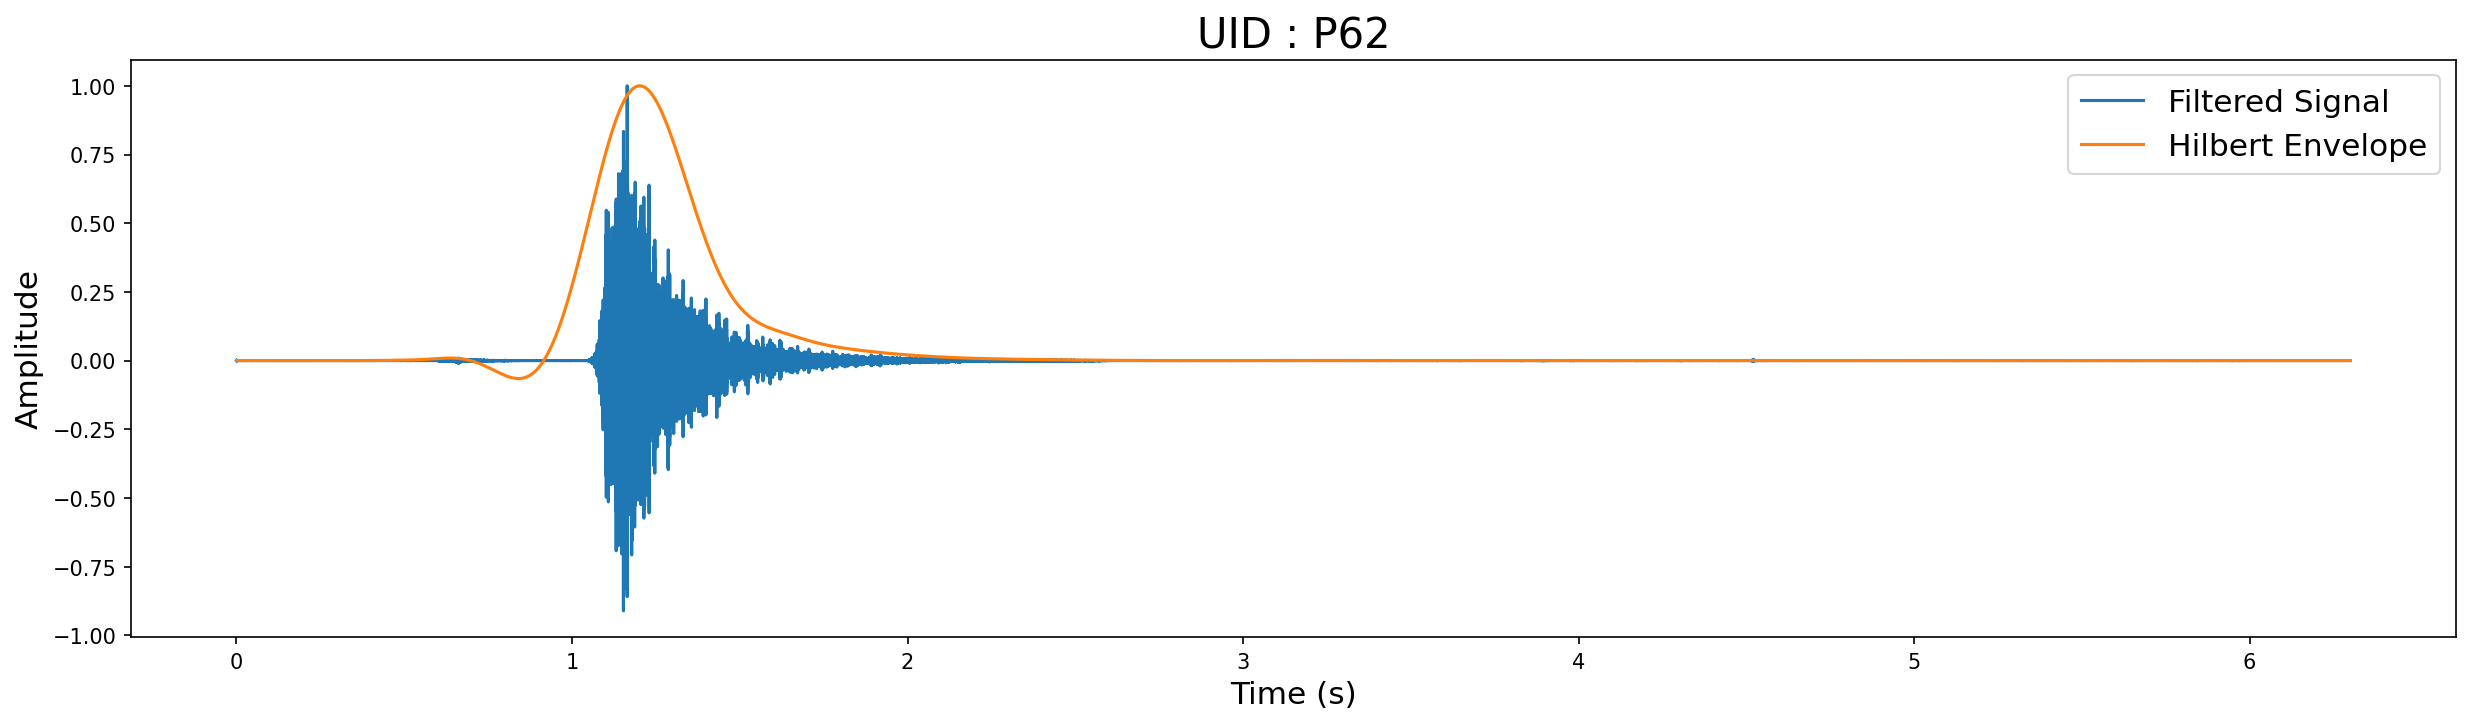

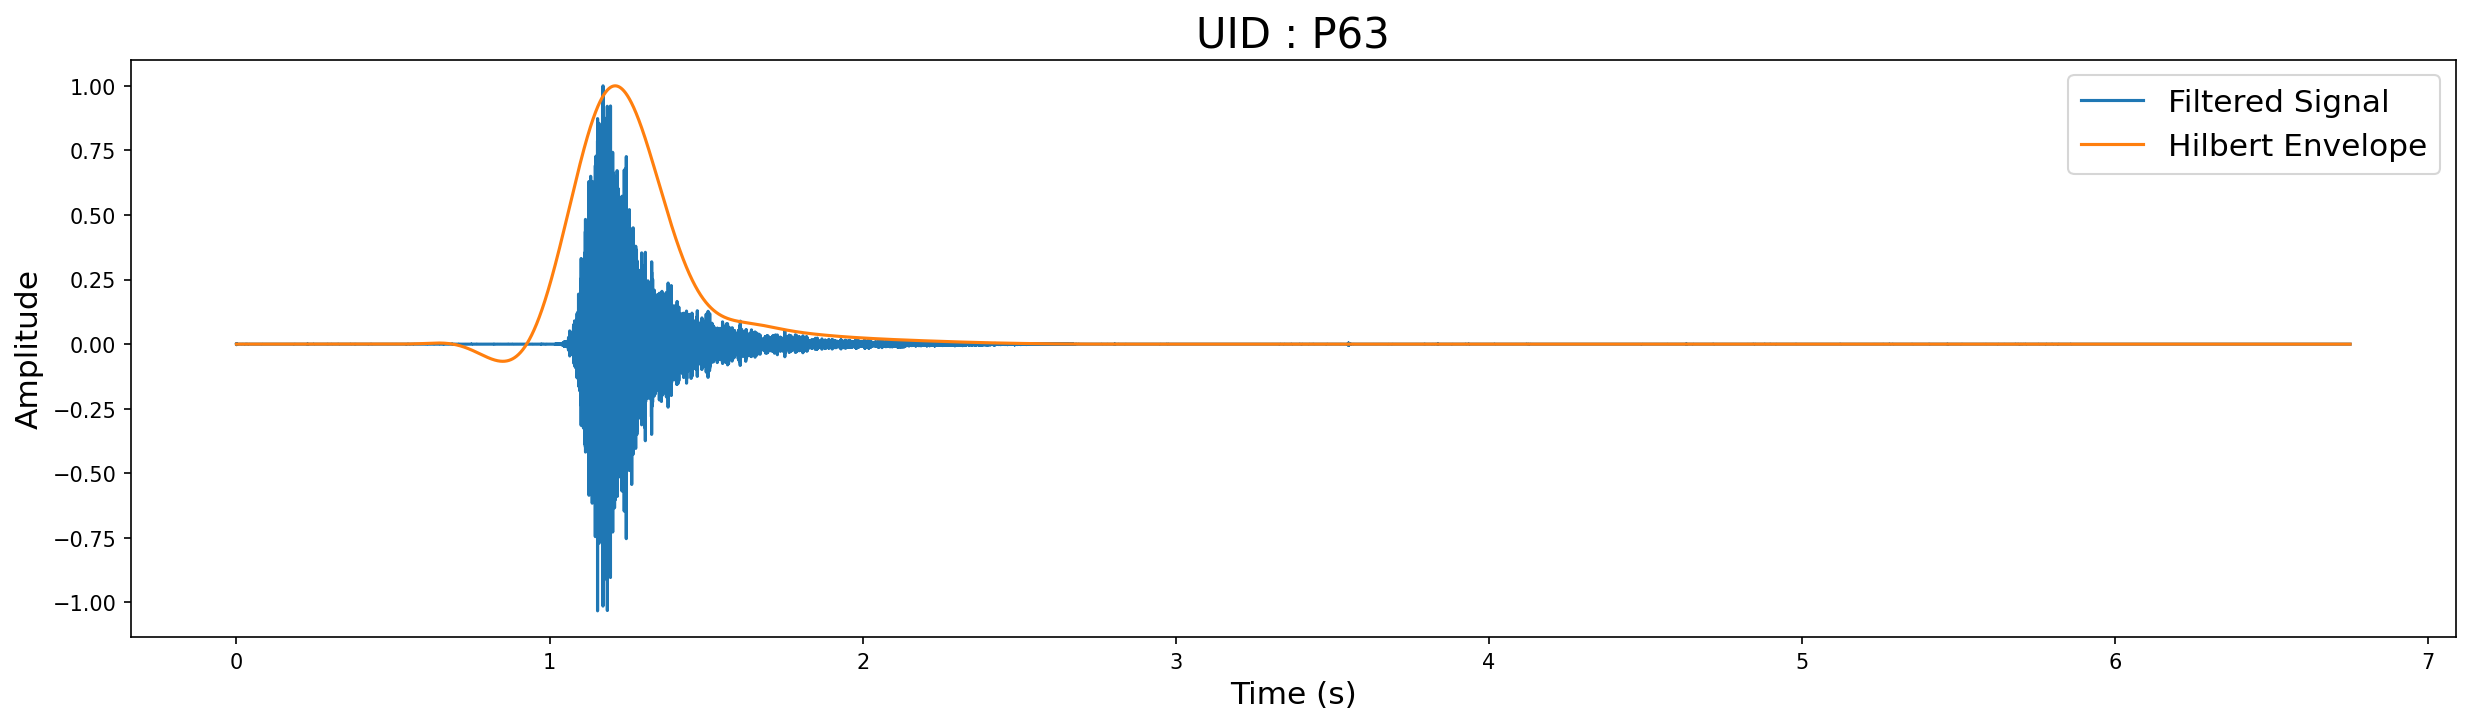

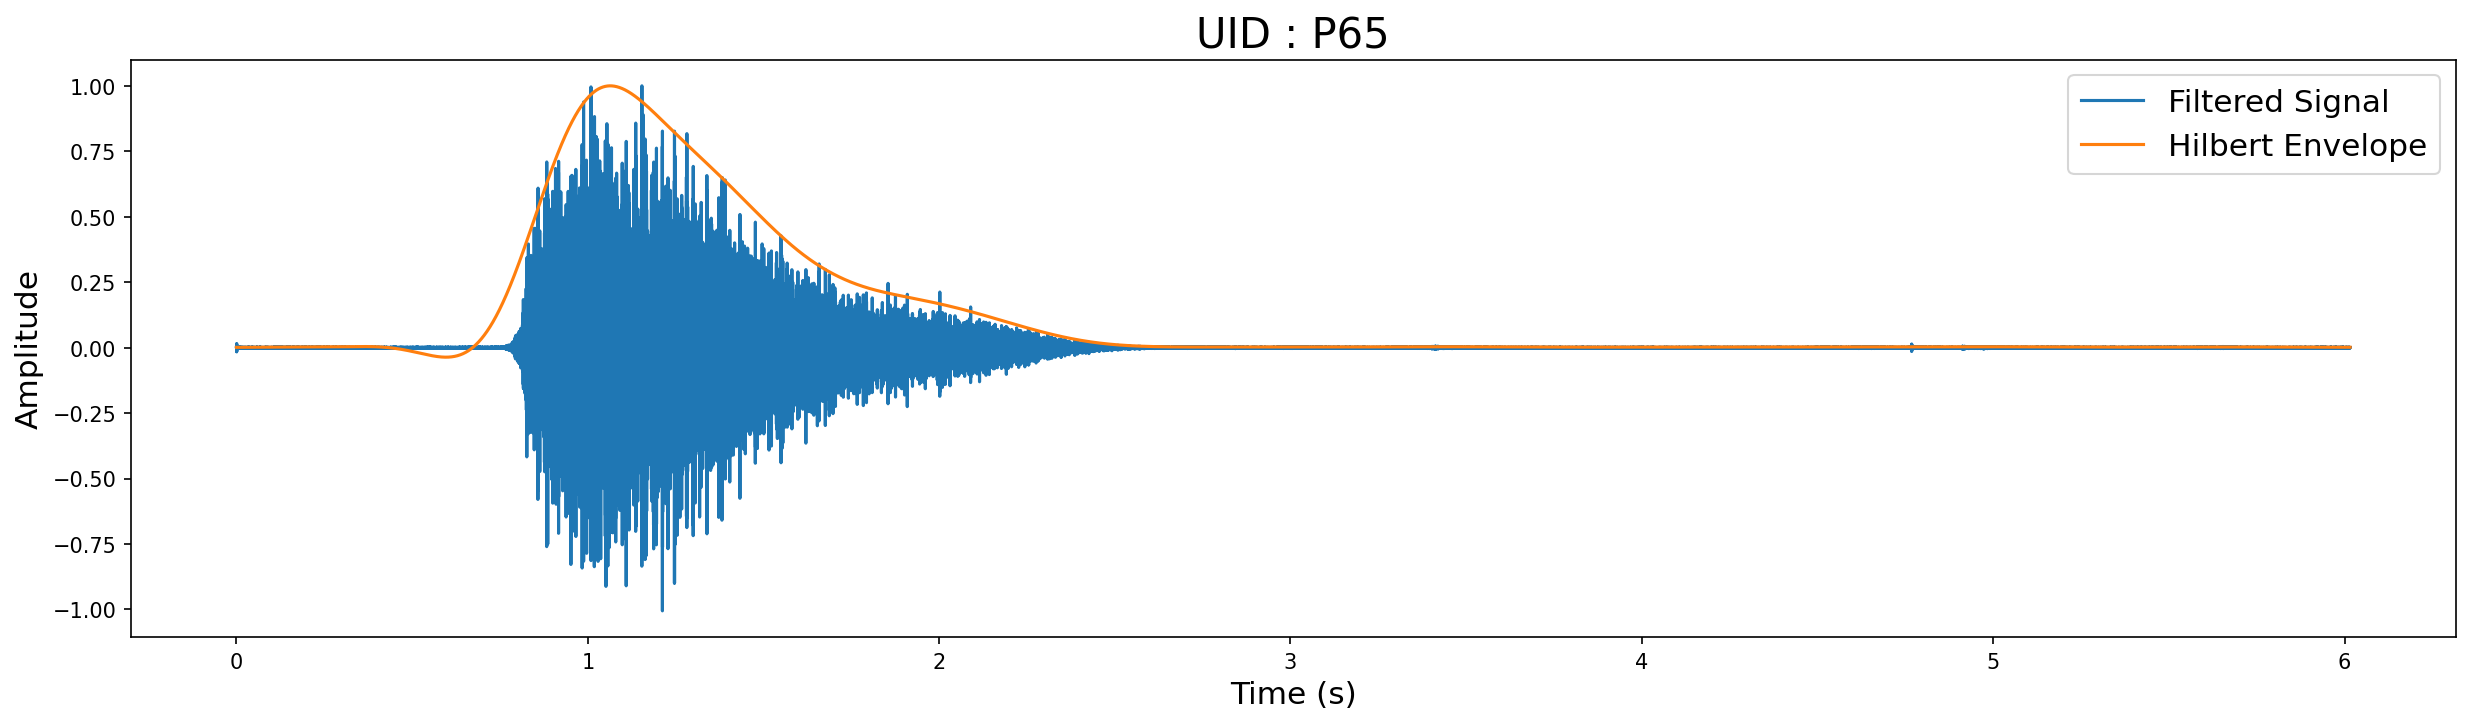

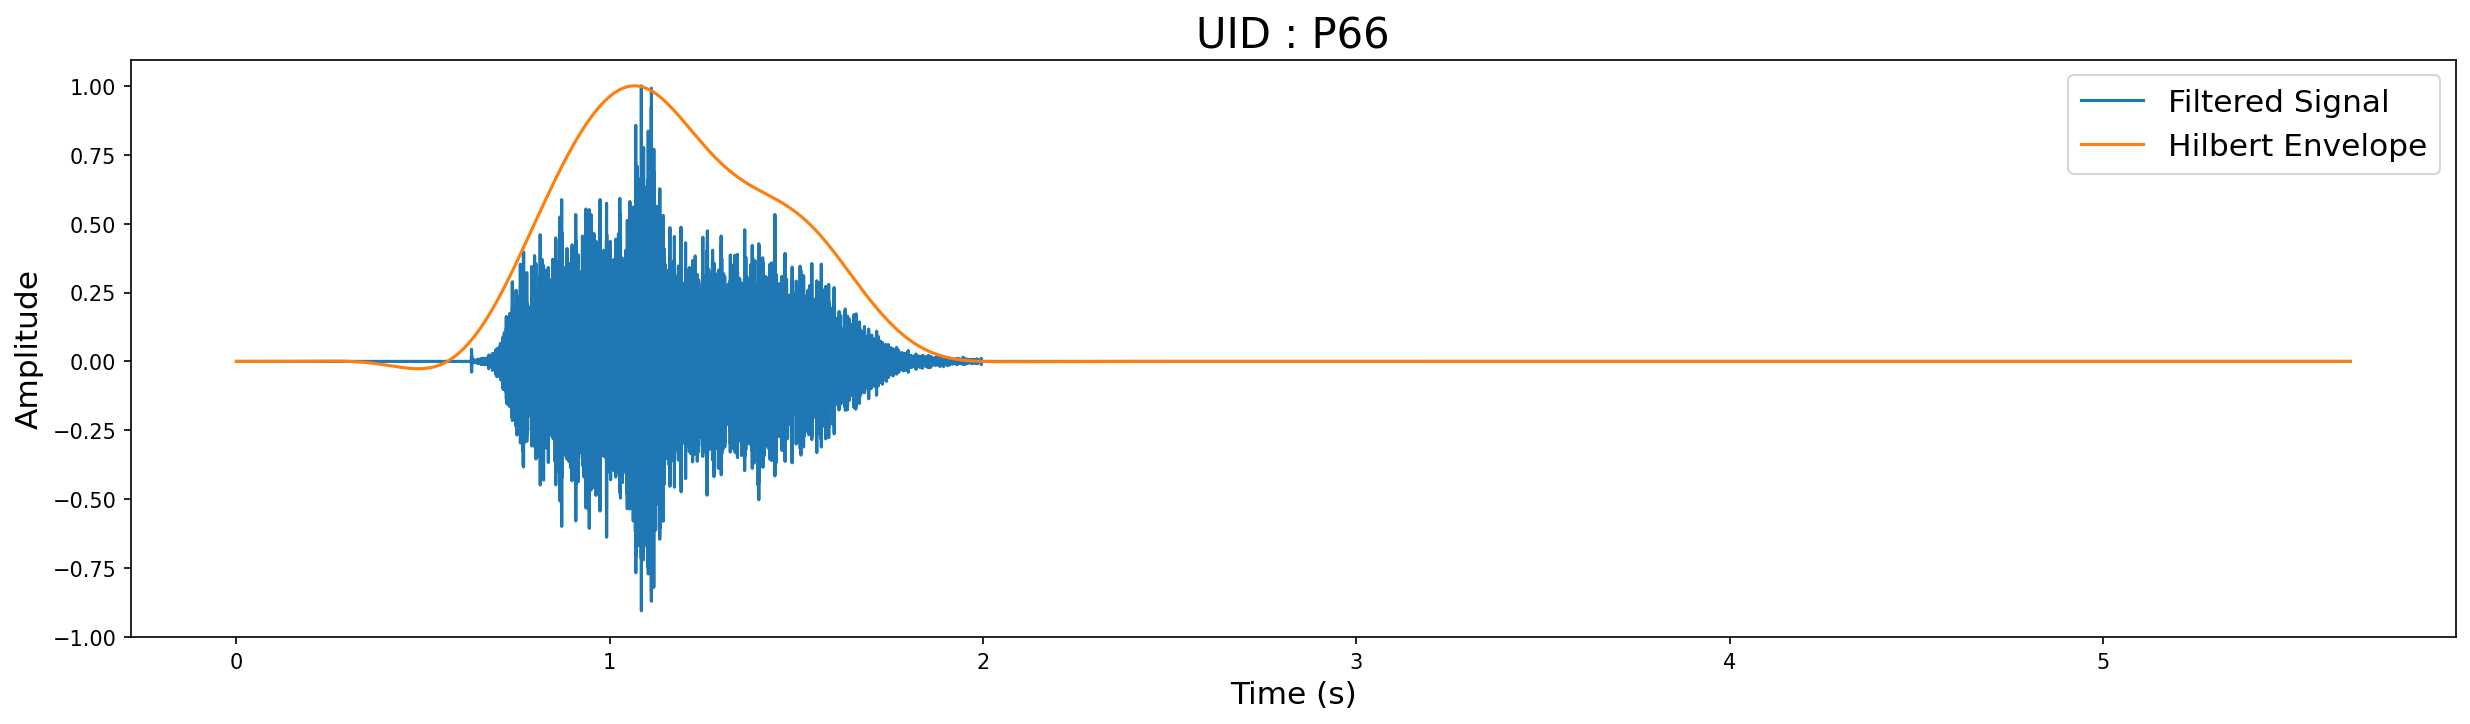

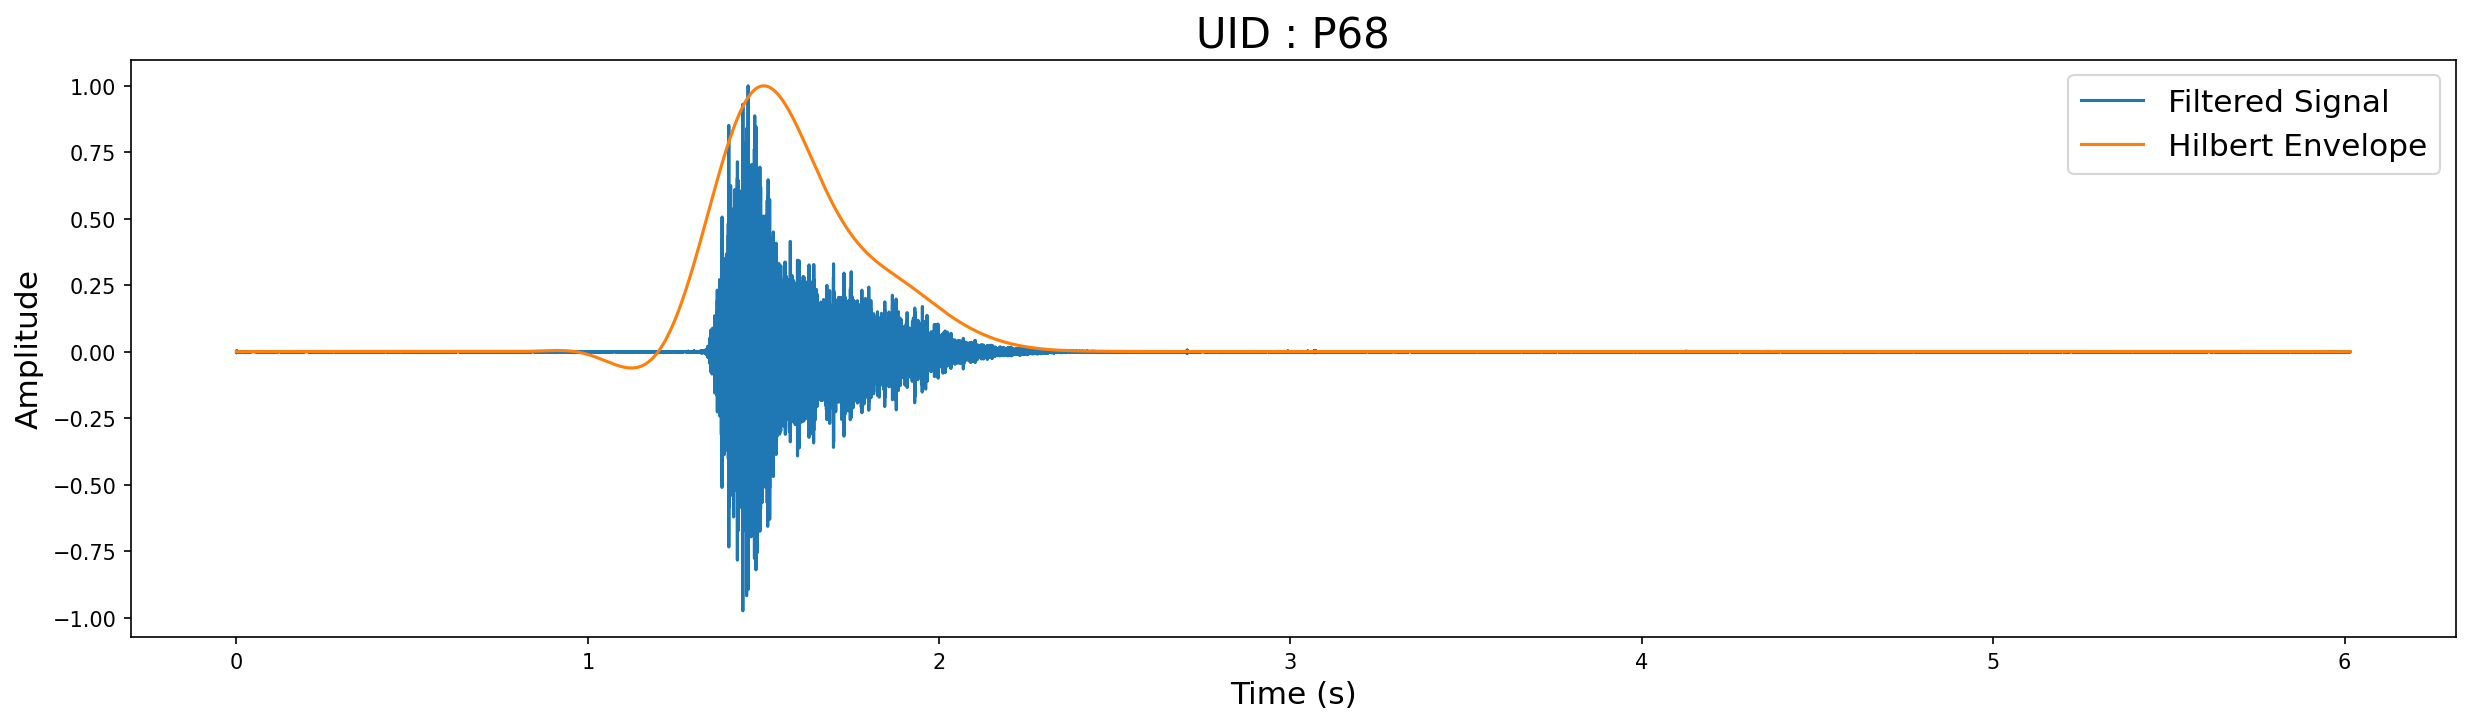

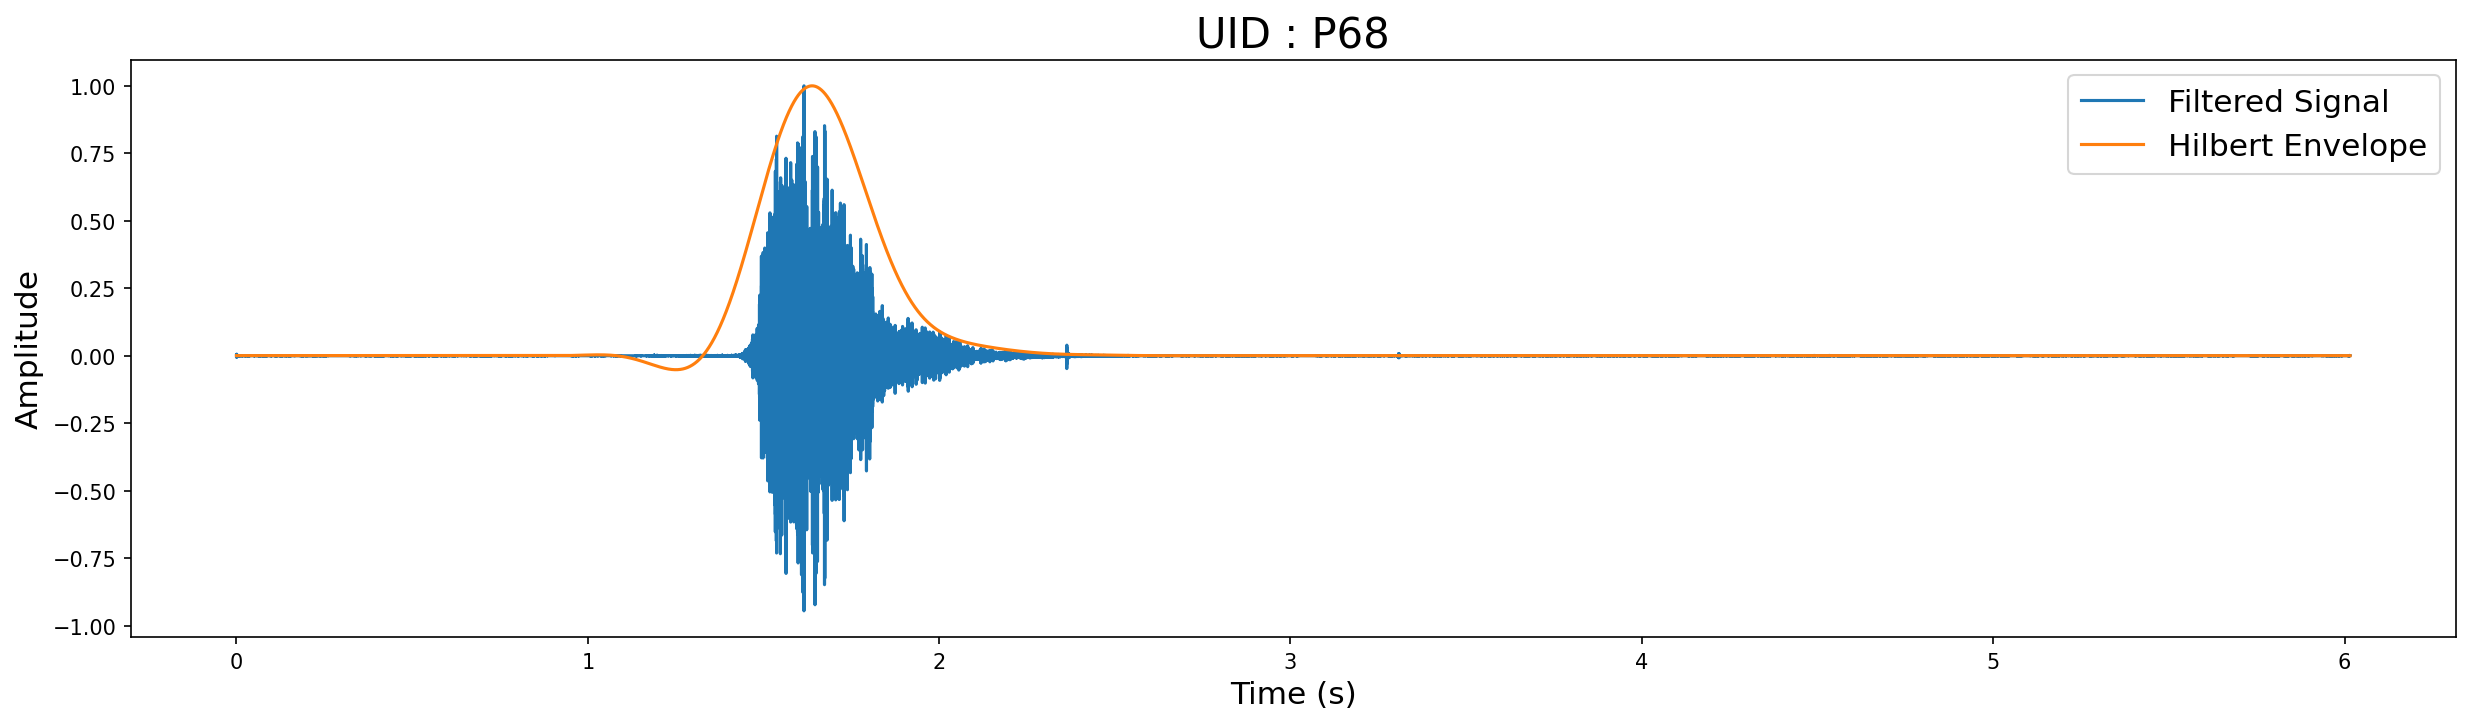

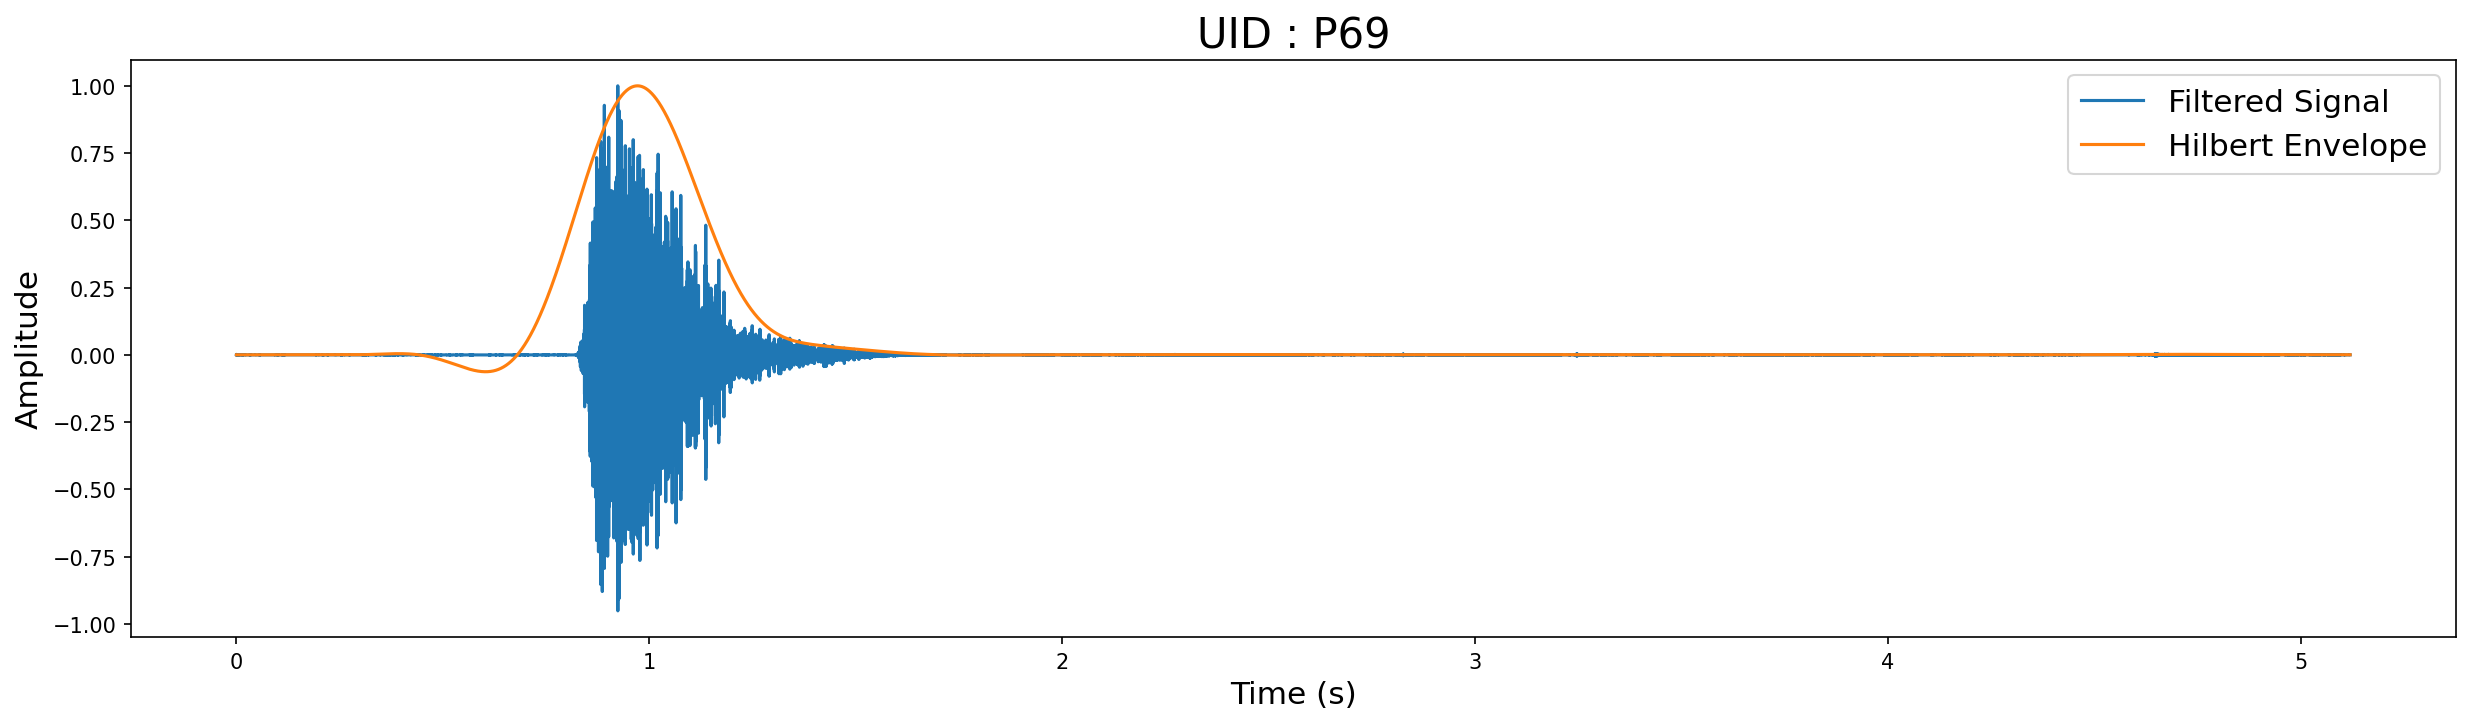

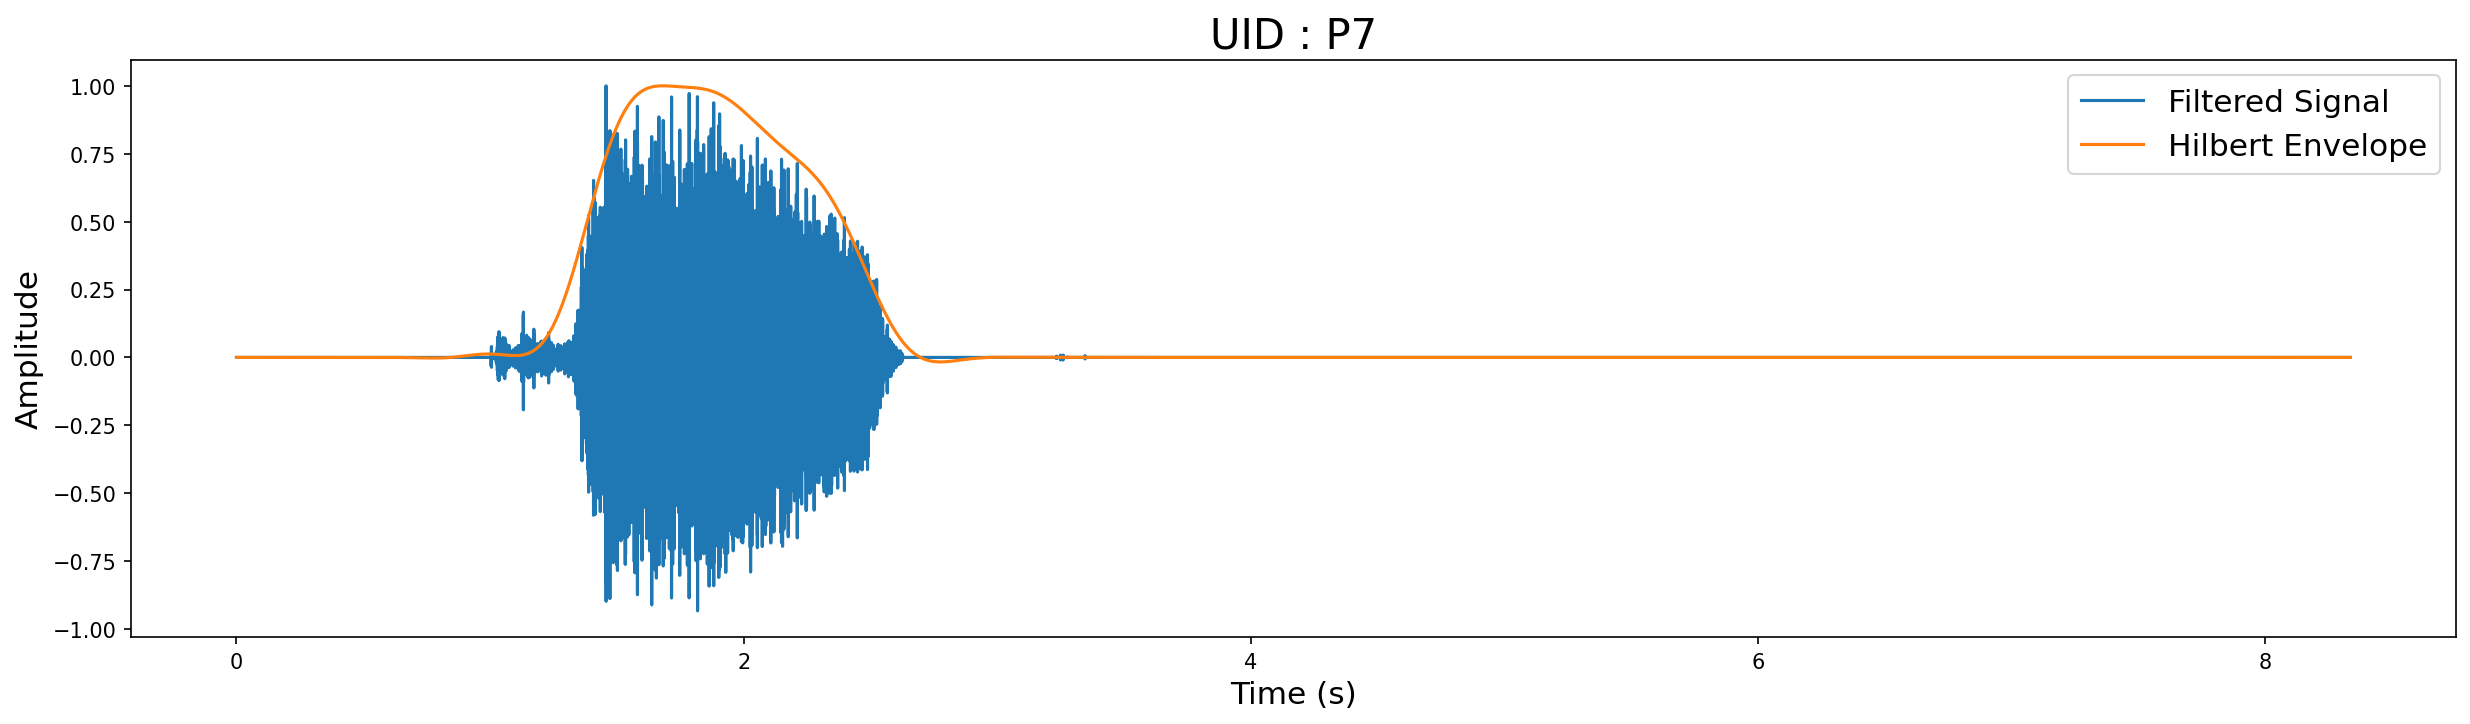

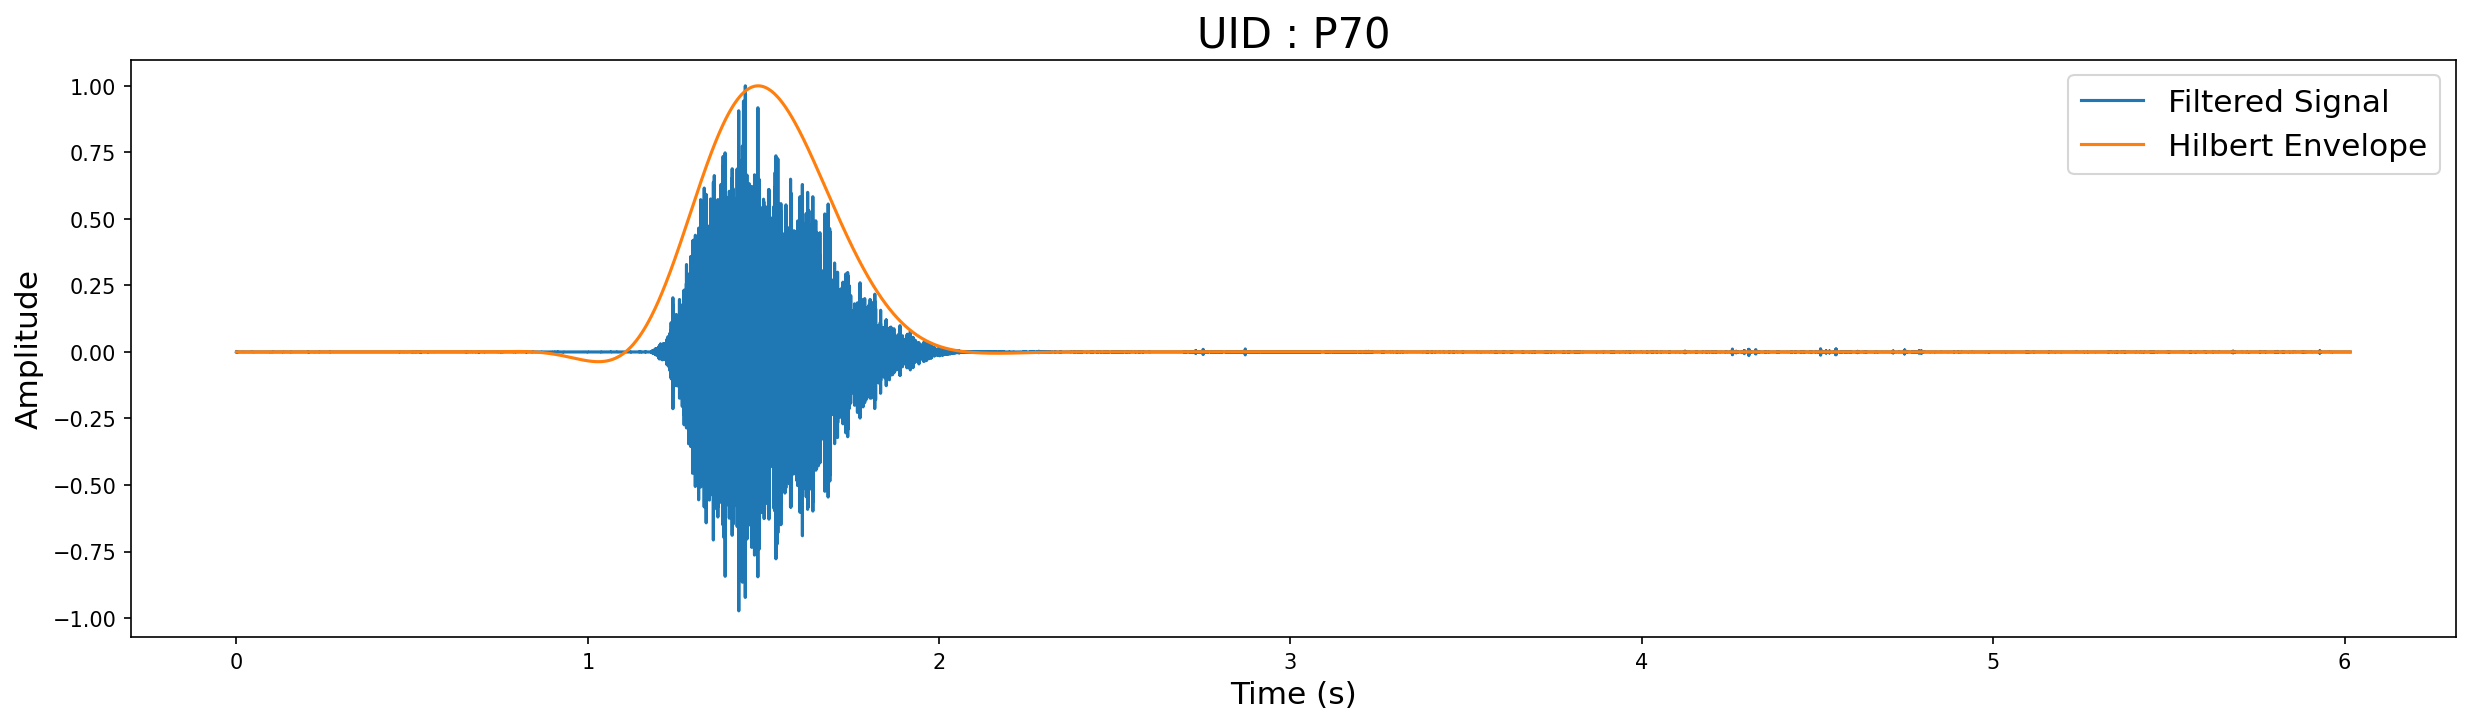

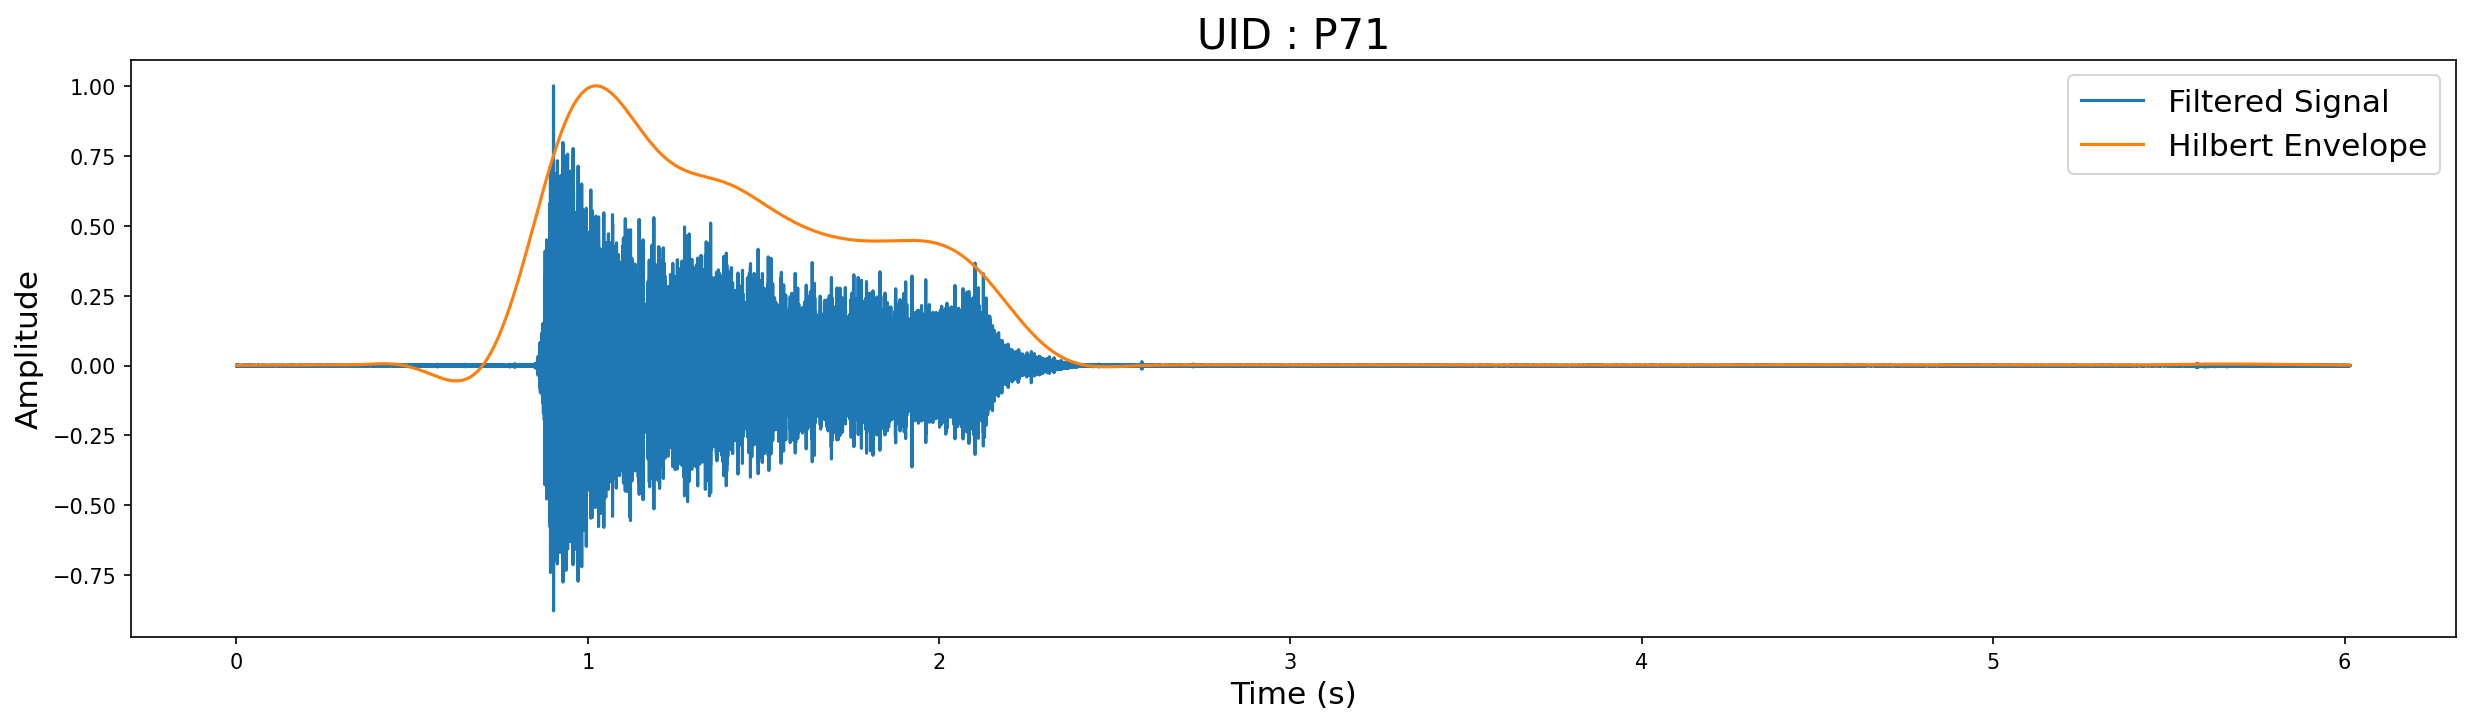

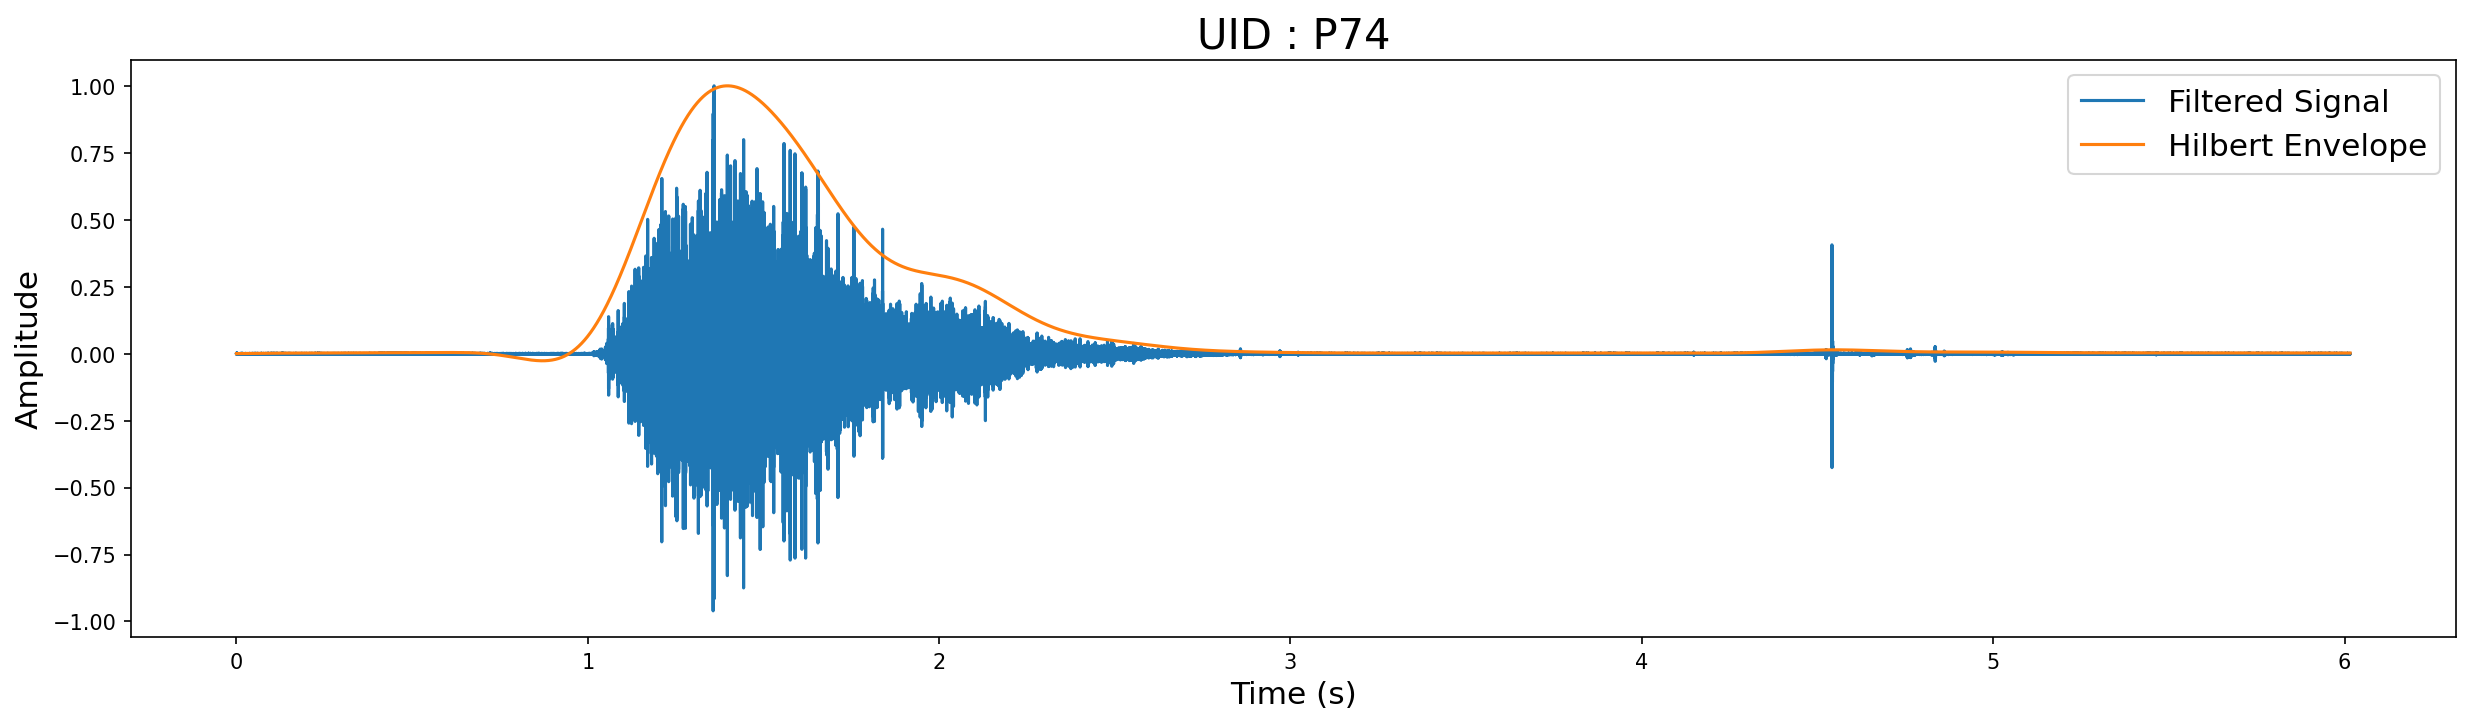

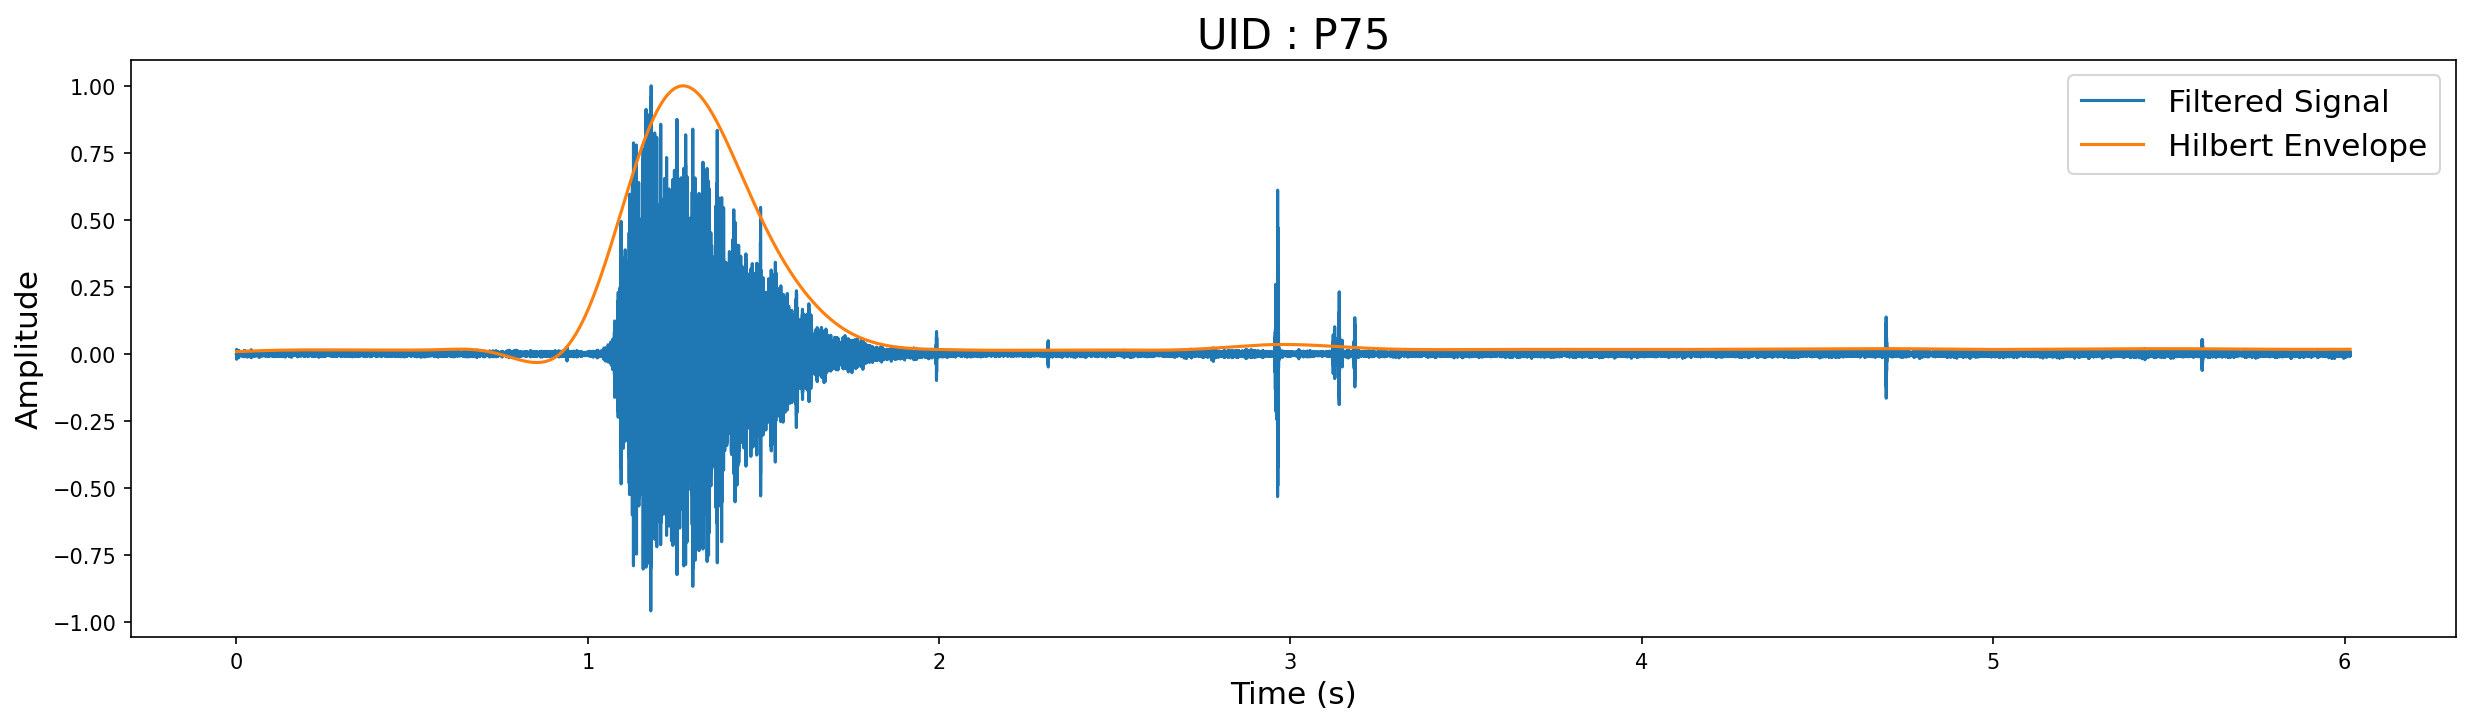

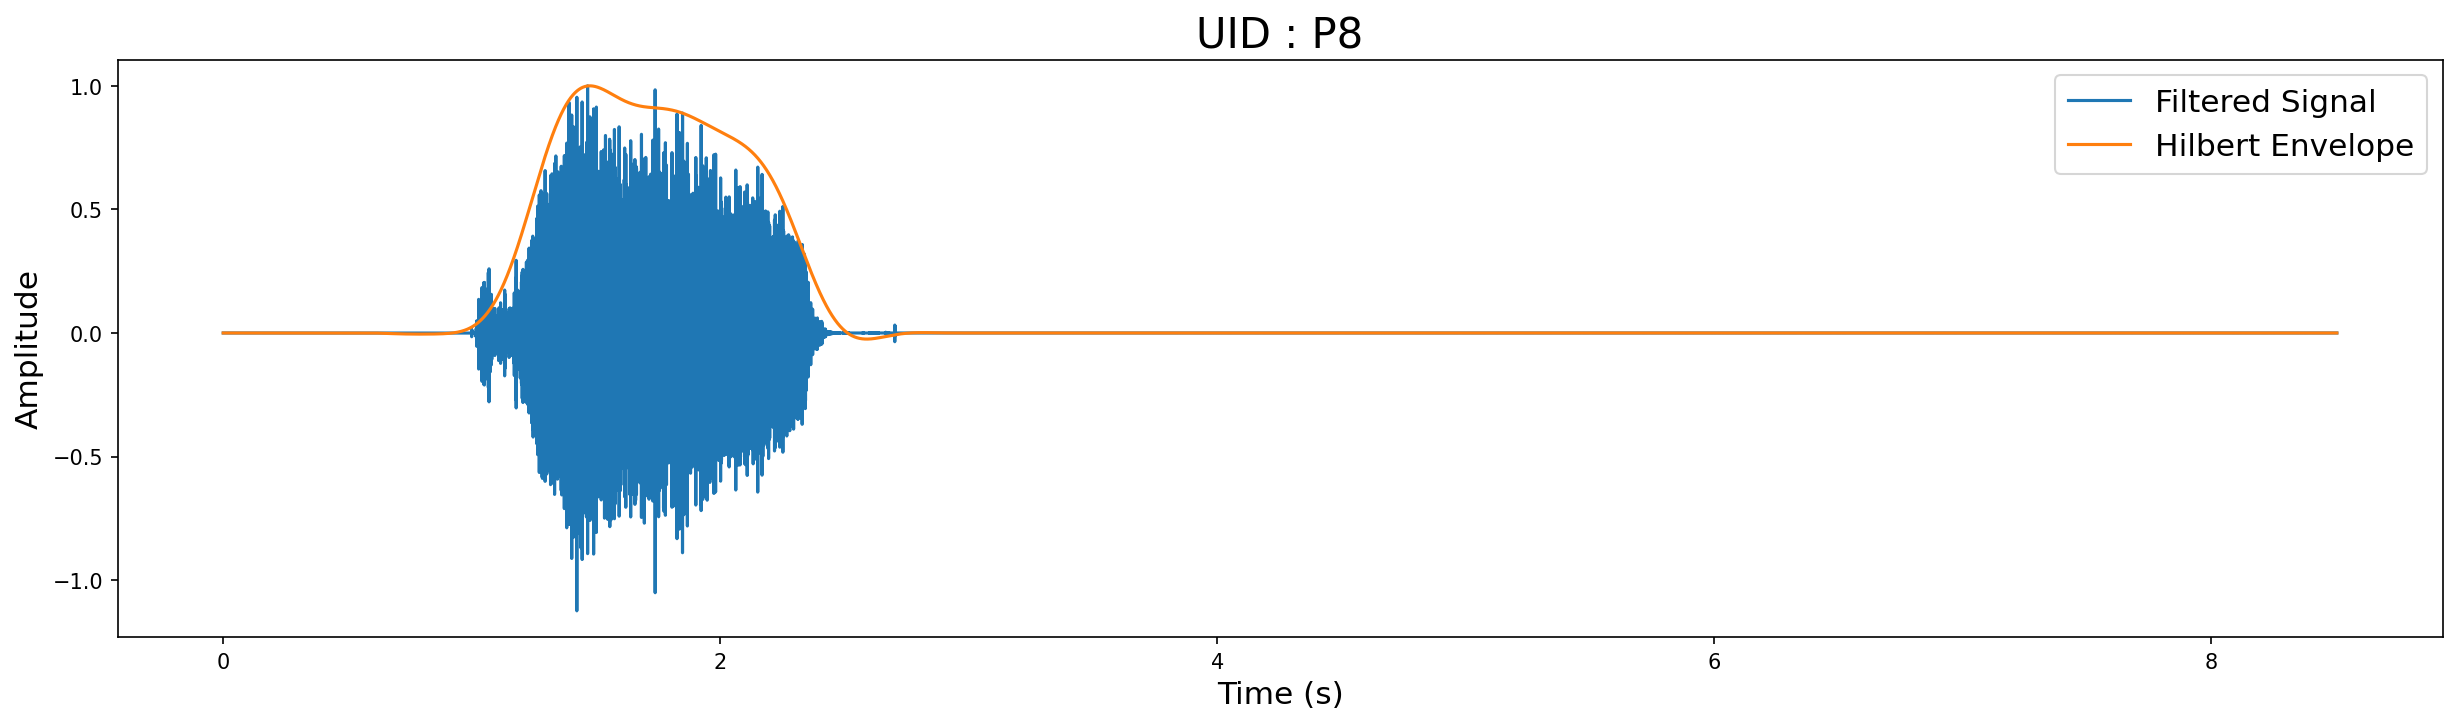

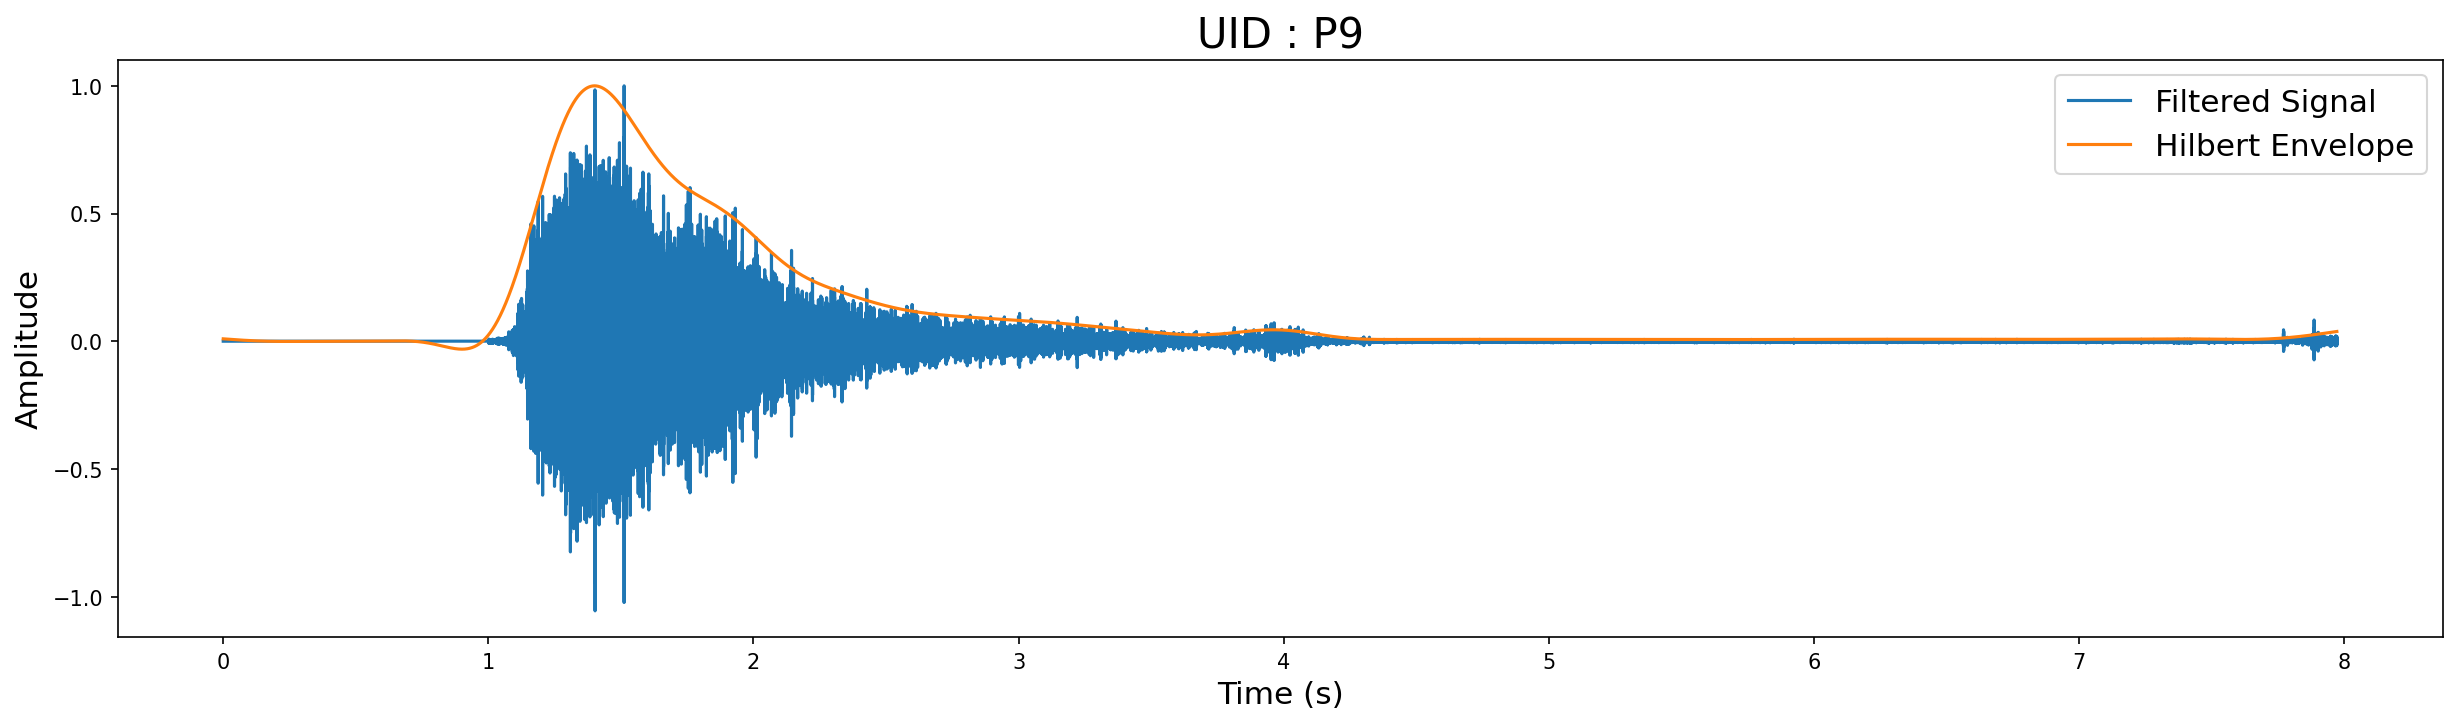

In [5]:
directory = '../2.Data/SpiroMask_Audio_Samples/'    # Path to the folder containing the audio files

cutoff_low = 3000         # desired cutoff frequency of the filter, Hz
cutoff_high = 5000       # desired cutoff frequency of the filter, Hz
order = 5               # desired order of the filter

ripple_db = 10.0        # stop band attenuation
fL_hz = 10              # 

# Looping through all the files in the directory
for filename in os.listdir(directory):

    # Path to the file
    f = os.path.join(directory, filename)
    
    # checking if it is a file
    if os.path.isfile(f) :

        # Load Audio File
        x , sr = librosa.load(f,sr=16000)

        # Band pass filtering
        x_filt = butter_bandpass_filter(x,cutoff_low,cutoff_high,sr,order)
        
        # Creating Envelope
        envelope_hat_filt = create_envelope(x_filt,sr,fL_hz,ripple_db)

        t = np.arange(0,len(envelope_hat_filt))/sr
        
        # Plotting the results
        plt.figure(figsize=(20, 5),dpi=150)
        plt.plot(t,x_filt/max(x_filt),label='Filtered Signal')
        plt.plot(t,envelope_hat_filt/max(envelope_hat_filt),label='Hilbert Envelope')
        plt.title("UID : {}".format(filename.split('.')[0]),fontsize=20)
        plt.ylabel('Amplitude',fontsize=15)
        plt.xlabel('Time (s)',fontsize=15)
        plt.legend(loc="upper right",fontsize=15)
        plt.show()